**BILO BAGE BILIYAN DA KI KAREGI BAGE BAGE BILIYAN DA KI KAREGI**
<BR>ANS: *** *********

In [1]:
import numpy as np # linear algebra
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cardio-train/cardio_train.csv


**Add all imports here**
**DEKH LENA SAARE IMPORTS SAARE YAHAN DAALNE HAIN VVVVVVVVVVVVVIMP**

In [2]:
!pip install scikeras
from sklearnex import patch_sklearn
patch_sklearn()
import numpy as np
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from kmodes.kmodes import KModes
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import tensorflow as tf
from tensorflow import keras
from tensorflow import keras
from keras import activations
from keras import backend
from keras import callbacks
from keras import layers
from keras import losses
from keras import models
from keras import utils
from keras import optimizers
from scikeras.wrappers import KerasClassifier

  Obtaining dependency information for scikeras from https://files.pythonhosted.org/packages/5d/fa/9c1967952e7889d698f10ba8b6af79dfaa2e05178d97a79fbd9d1b44e589/scikeras-0.12.0-py3-none-any.whl.metadata


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


# **Loading the dataset**

In [3]:
data = pd.read_csv("/kaggle/input/cardio-train/cardio_train.csv")
data.drop("id",axis=1,inplace=True)
display(data)

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0      18393       2     168    62.0    110     80            1     1      0   
1      20228       1     156    85.0    140     90            3     1      0   
2      18857       1     165    64.0    130     70            3     1      0   
3      17623       2     169    82.0    150    100            1     1      0   
4      17474       1     156    56.0    100     60            1     1      0   
...      ...     ...     ...     ...    ...    ...          ...   ...    ...   
69995  19240       2     168    76.0    120     80            1     1      1   
69996  22601       1     158   126.0    140     90            2     2      0   
69997  19066       2     183   105.0    180     90            3     1      0   
69998  22431       1     163    72.0    135     80            1     2      0   
69999  20540       1     170    72.0    120     80            2     1      0   

       alco  active  PP         MAP  cardio  
0         0       1  30   90.000000       0  
1         0       1  50  106.666667       1  
2         0       0  60   90.000000       1  
3         0       1  50  116.666667       1  
4         0       0  40   73.333333       0  
...     ...     ...  ..         ...     ...  
69995     0       1  40   93.333333       0  
69996     0       1  50  106.666667       1  
69997     1       0  90  120.000000       1  
69998     0       0  55   98.333333       1  
69999     0       1  40   93.333333       0  

[70000 rows x 14 columns]

In [4]:
features=["ap_hi","ap_lo","PP","MAP"]
for i in features:
  data = data.drop(data[data[i]<0].index)
  data = data.drop(data[data[i]>500].index)
print(data.shape)

(68727, 14)


# **Exploratory Data Analysis**

**Class-Imbalance Checking**

Text(0.5, 1.0, 'Distribution of people with and without CVD')

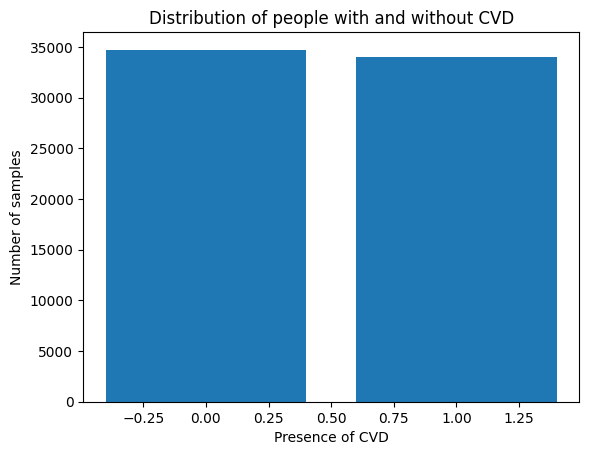

In [5]:
y = data["cardio"]
unique_labels,counts = np.unique(y,return_counts=True)

plt.bar(unique_labels,counts)
plt.xlabel("Presence of CVD")
plt.ylabel('Number of samples')
plt.title("Distribution of people with and without CVD")

**Multi-variate Analysis**

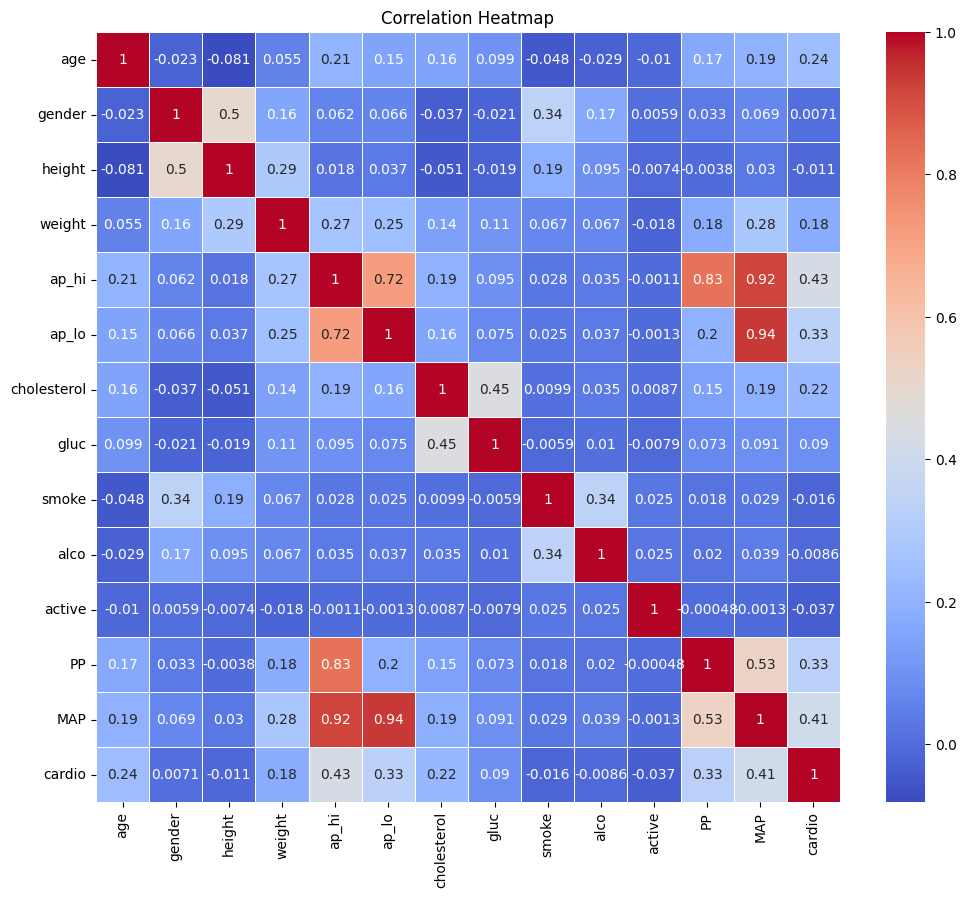

In [6]:
# Corelation HeatMap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


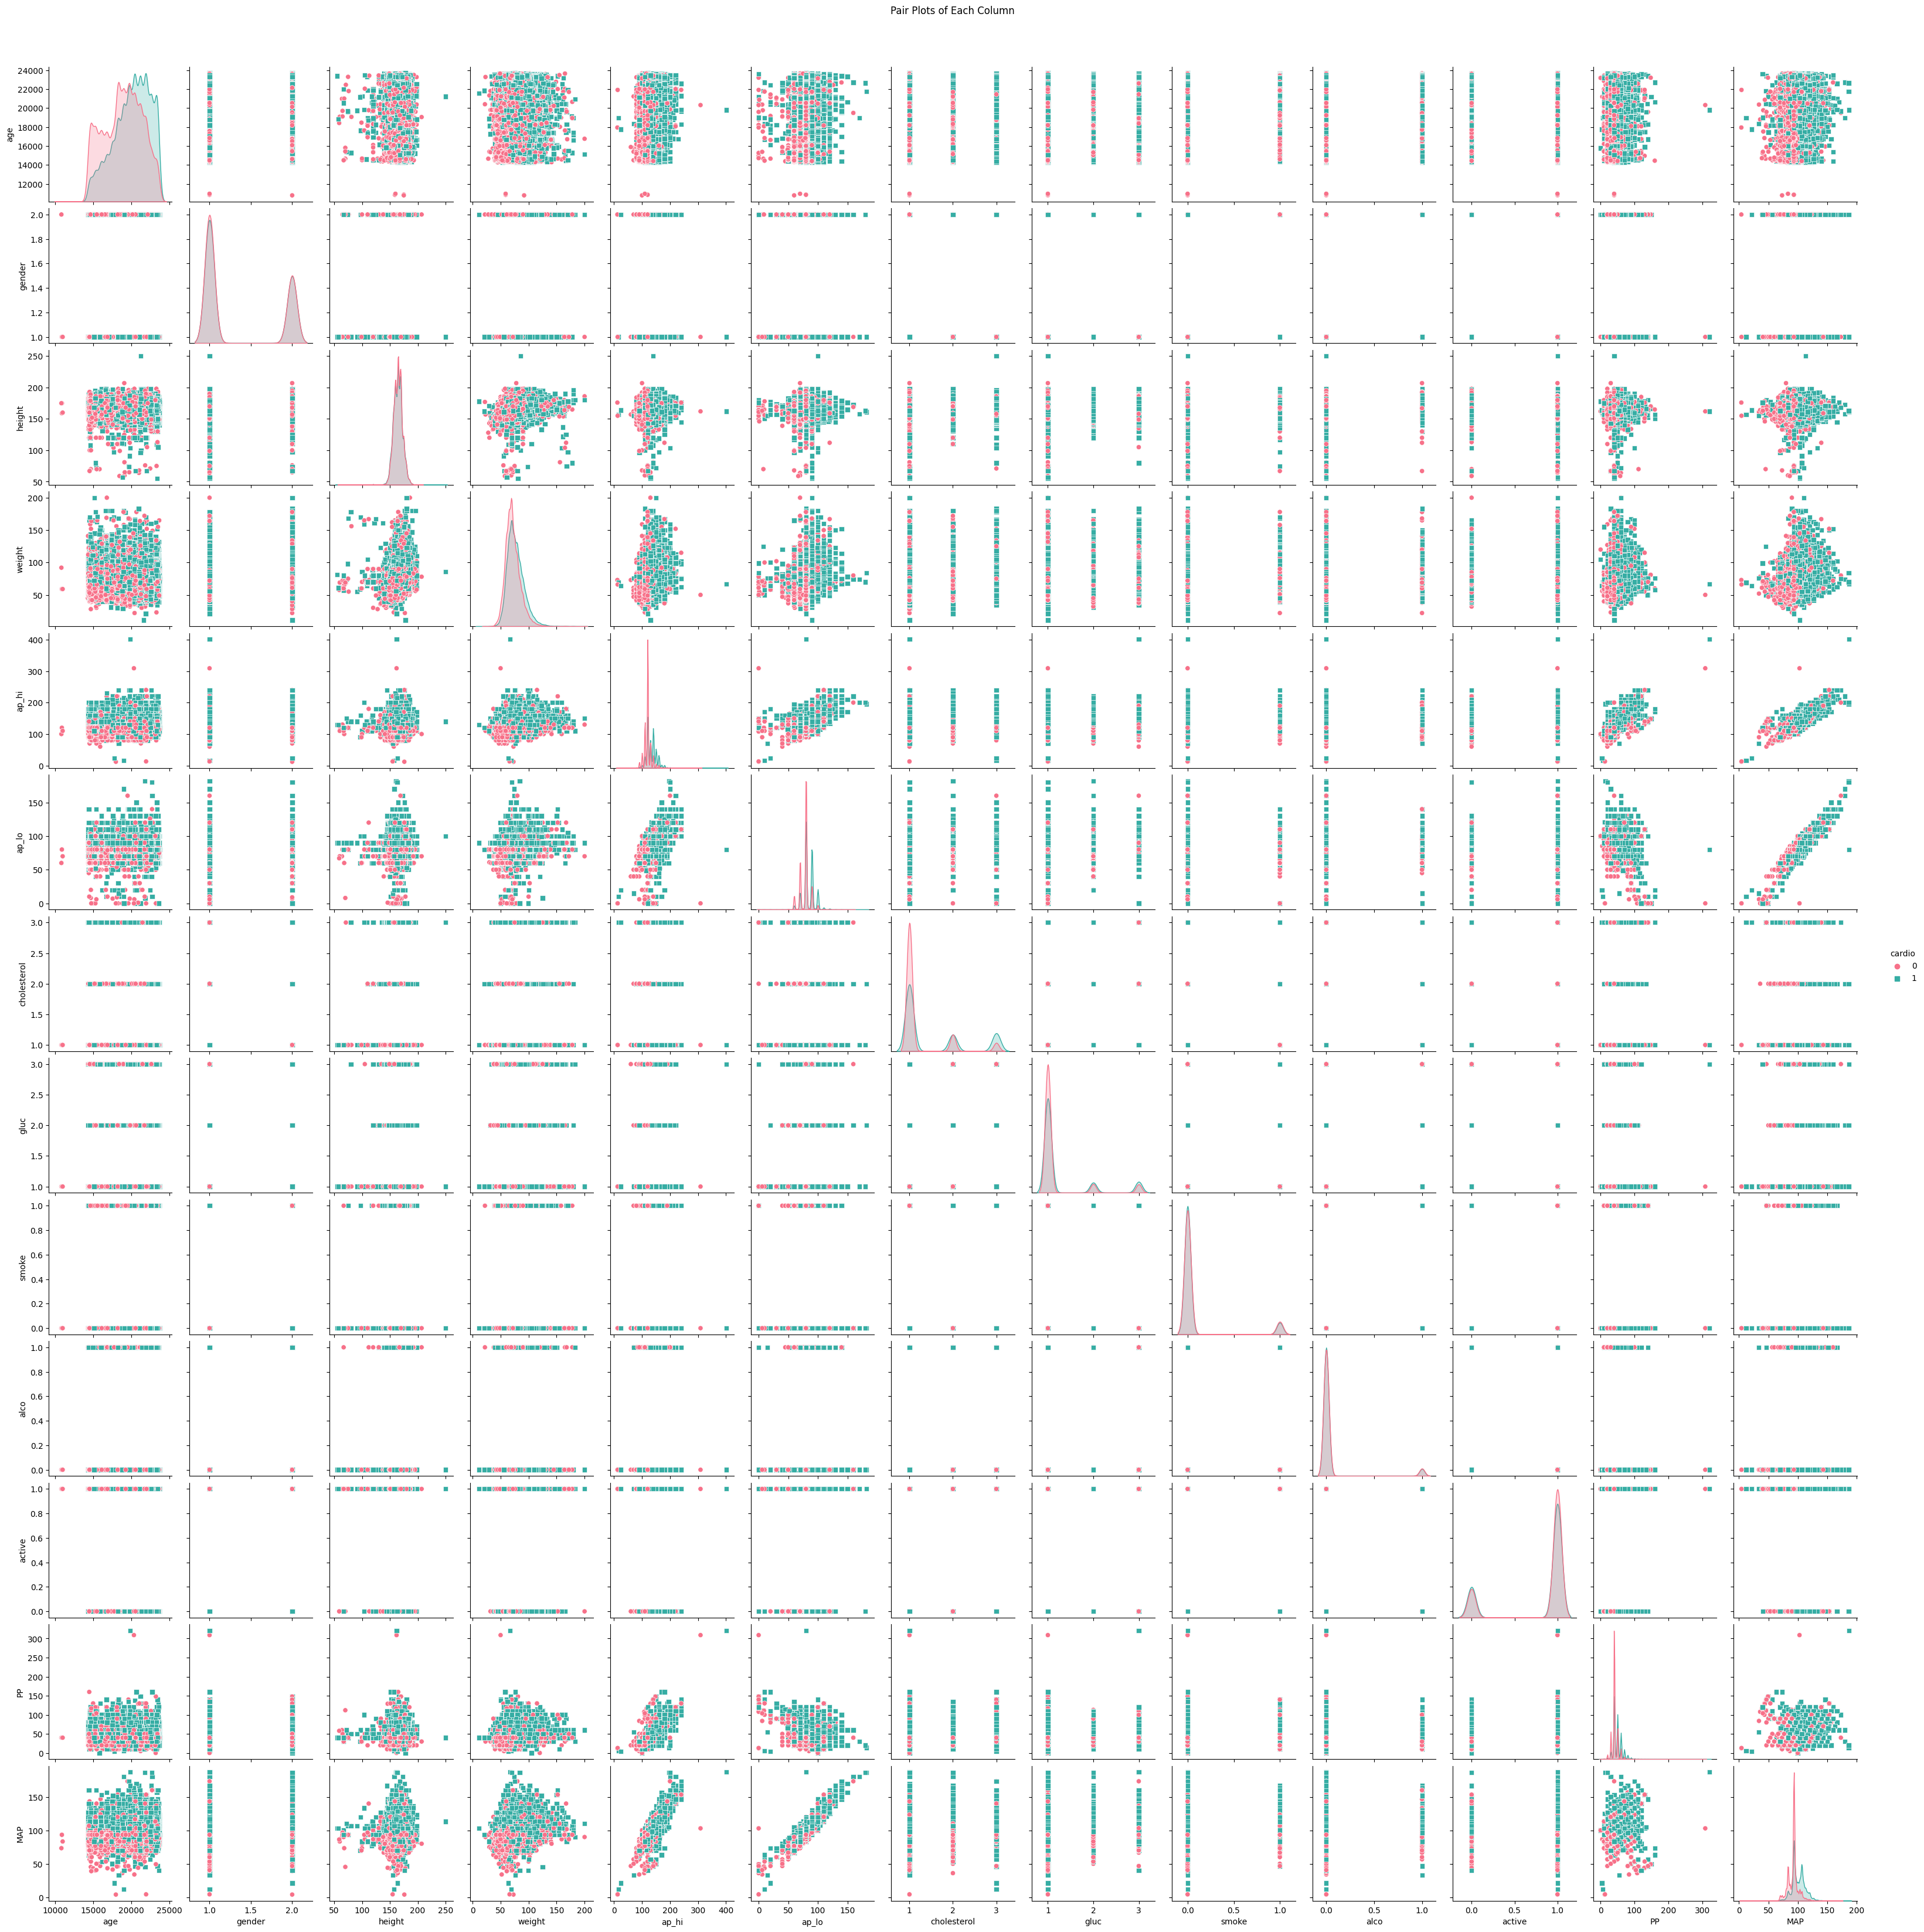

In [7]:
sns.pairplot(data, diag_kind='kde', hue='cardio', palette='husl', markers=['o', 's'])
plt.suptitle("Pair Plots of Each Column", y=1.02)
plt.show()

**Uni-Variate Analysis**

Box-Plots

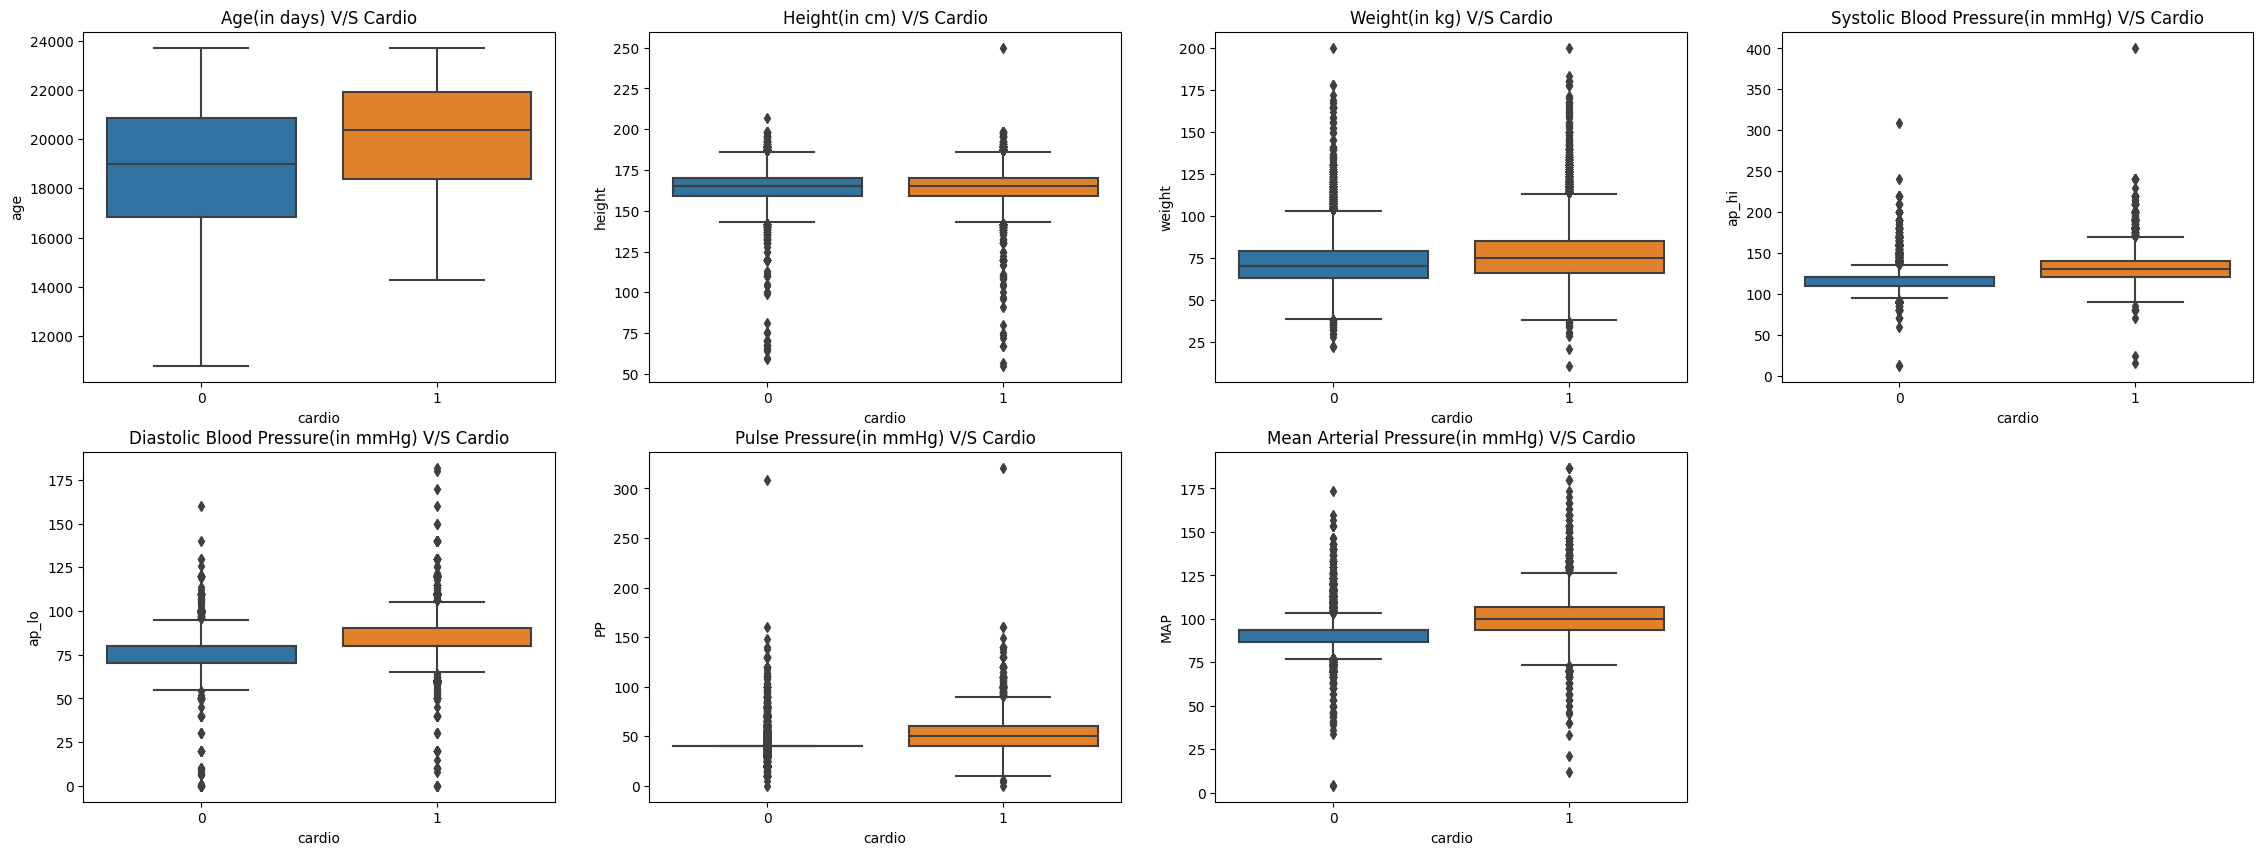

In [8]:
fig, axes = plt.subplots(2, 4, figsize=(28, 10))
sns.boxplot(ax=axes[0,0],x="cardio",y="age",data=data)
sns.boxplot(ax=axes[0,1],x="cardio",y="height",data=data)
sns.boxplot(ax=axes[0,2],x="cardio",y="weight",data=data)
sns.boxplot(ax=axes[0,3],x="cardio",y="ap_hi",data=data)
sns.boxplot(ax=axes[1,0],x="cardio",y="ap_lo",data=data)
sns.boxplot(ax=axes[1,1],x="cardio",y="PP",data=data)
sns.boxplot(ax=axes[1,2],x="cardio",y="MAP",data=data)
axes[0,0].set_title("Age(in days) V/S Cardio")
axes[0,1].set_title("Height(in cm) V/S Cardio")
axes[0,2].set_title("Weight(in kg) V/S Cardio")
axes[0,3].set_title("Systolic Blood Pressure(in mmHg) V/S Cardio")
axes[1,0].set_title("Diastolic Blood Pressure(in mmHg) V/S Cardio")
axes[1,1].set_title("Pulse Pressure(in mmHg) V/S Cardio")
axes[1,2].set_title("Mean Arterial Pressure(in mmHg) V/S Cardio")
fig.delaxes(axes[1,3])
plt.show()

### **Histograms**

**Combined Histograms for the report**

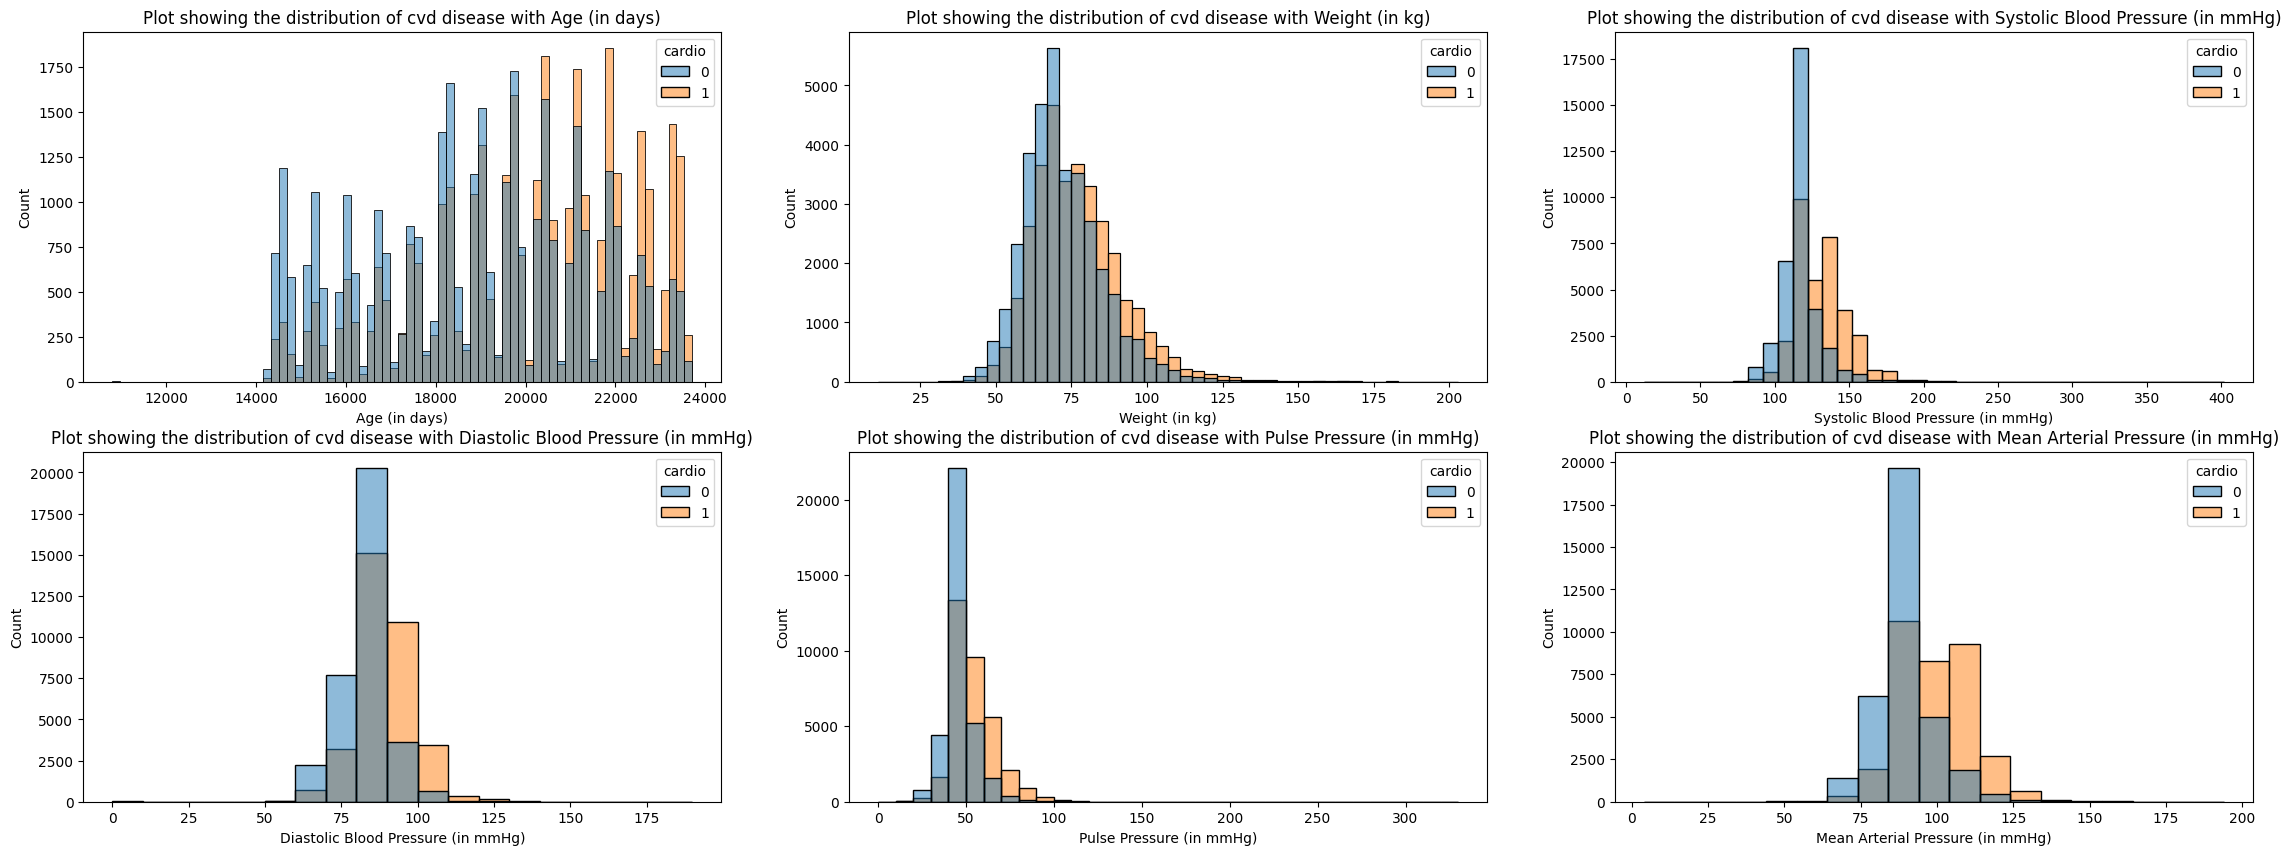

<Figure size 640x480 with 0 Axes>

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(28, 10))
sns.histplot(ax=axes[0,0],x="age",hue="cardio",data=data)
axes[0,0].set_xlabel("Age (in days)")
axes[0,0].set_title("Plot showing the distribution of cvd disease with Age (in days)")
sns.histplot(ax=axes[0,1],x="weight",hue="cardio",data=data,binwidth=4.0)
axes[0,1].set_xlabel("Weight (in kg)")
axes[0,1].set_title("Plot showing the distribution of cvd disease with Weight (in kg)")
sns.histplot(ax=axes[0,2],x="ap_hi",hue="cardio",data=data,binwidth=10.0)
axes[0,2].set_xlabel("Systolic Blood Pressure (in mmHg)")
axes[0,2].set_title("Plot showing the distribution of cvd disease with Systolic Blood Pressure (in mmHg)")
sns.histplot(ax=axes[1,0],x="ap_lo",hue="cardio",data=data,binwidth=10.0)
axes[1,0].set_xlabel("Diastolic Blood Pressure (in mmHg)")
axes[1,0].set_title("Plot showing the distribution of cvd disease with Diastolic Blood Pressure (in mmHg)")
sns.histplot(ax=axes[1,1],x="PP",hue="cardio",data=data,binwidth=10.0)
axes[1,1].set_xlabel("Pulse Pressure (in mmHg)")
axes[1,1].set_title("Plot showing the distribution of cvd disease with Pulse Pressure (in mmHg)")
sns.histplot(ax=axes[1,2],x="MAP",hue="cardio",data=data,binwidth=10.0)
axes[1,2].set_xlabel("Mean Arterial Pressure (in mmHg)")
axes[1,2].set_title("Plot showing the distribution of cvd disease with Mean Arterial Pressure (in mmHg)")
plt.figure(dpi=100)
plt.show()

Histogram showing relative frequencies of the people with and without CVD,in different age brackets.

<Figure size 640x480 with 0 Axes>

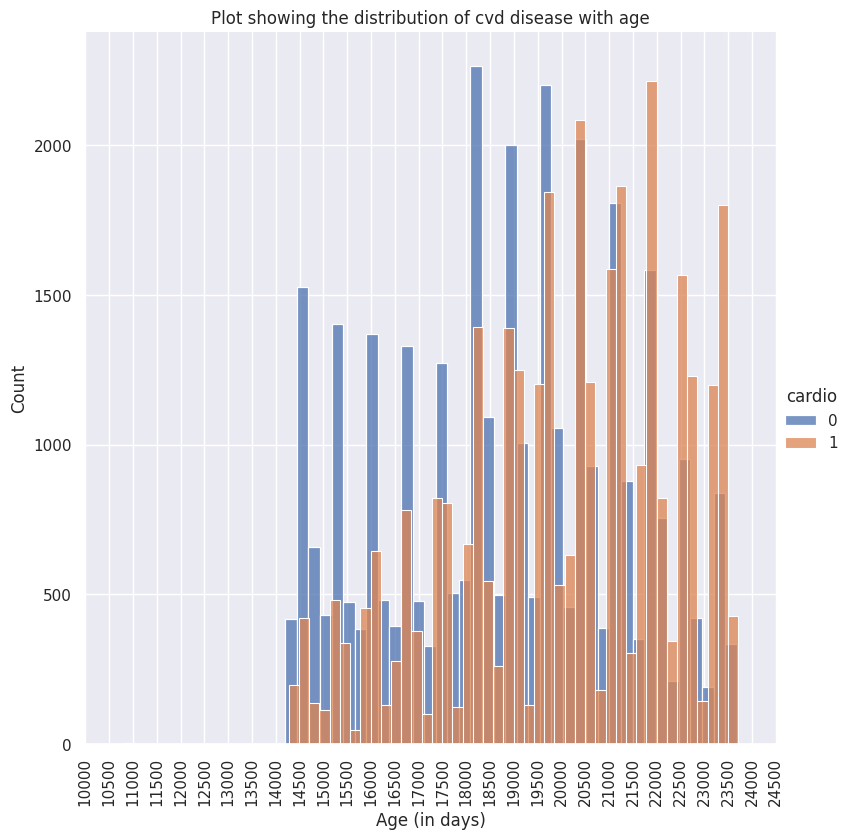

In [10]:
sns.set(font_scale=1.0)
plt.figure(dpi=100)
sns.FacetGrid(data,hue="cardio",height=8).map(sns.histplot,'age').add_legend()
plt.title("Plot showing the distribution of cvd disease with age")
plt.xticks(rotation=90)
plt.xticks(np.arange(10000,25000,500))
plt.xlabel("Age (in days)")
plt.show()

Histogram showing relative frequencies of the people with and without CVD,in different height brackets.

<Figure size 640x480 with 0 Axes>

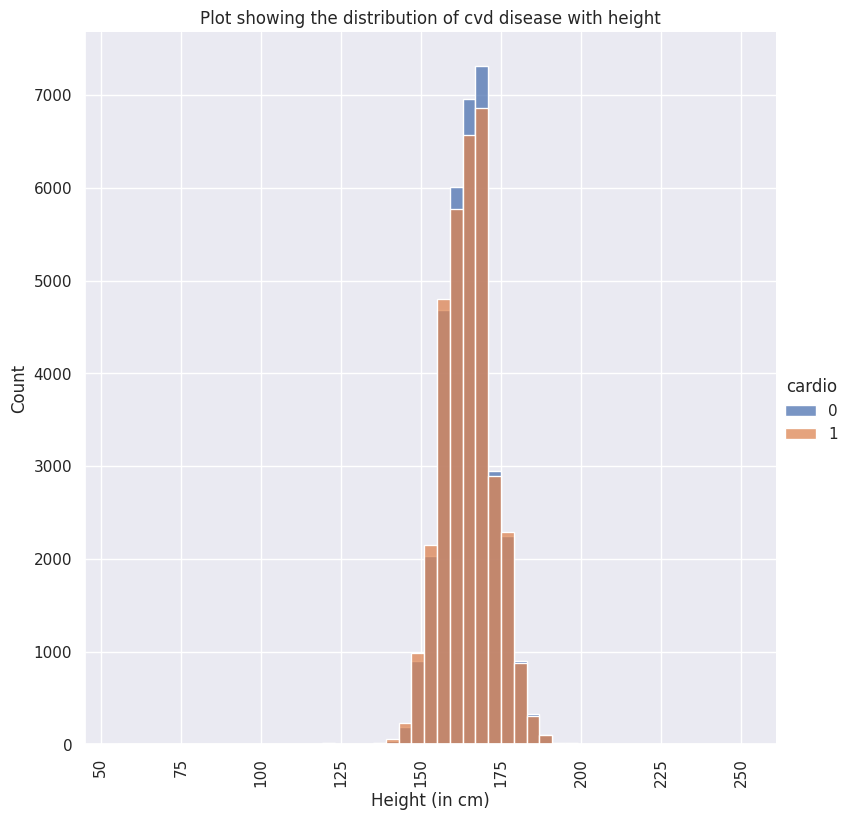

In [11]:
sns.set(font_scale=1.0)
plt.figure(dpi=100)
sns.FacetGrid(data,hue="cardio",height=8).map(sns.histplot,'height',binwidth=4.0).add_legend()
plt.title("Plot showing the distribution of cvd disease with height")
plt.xticks(rotation=90)
plt.xlabel("Height (in cm)")
plt.show()

Histogram showing relative frequencies of the people with and without CVD,in different weight brackets.

<Figure size 640x480 with 0 Axes>

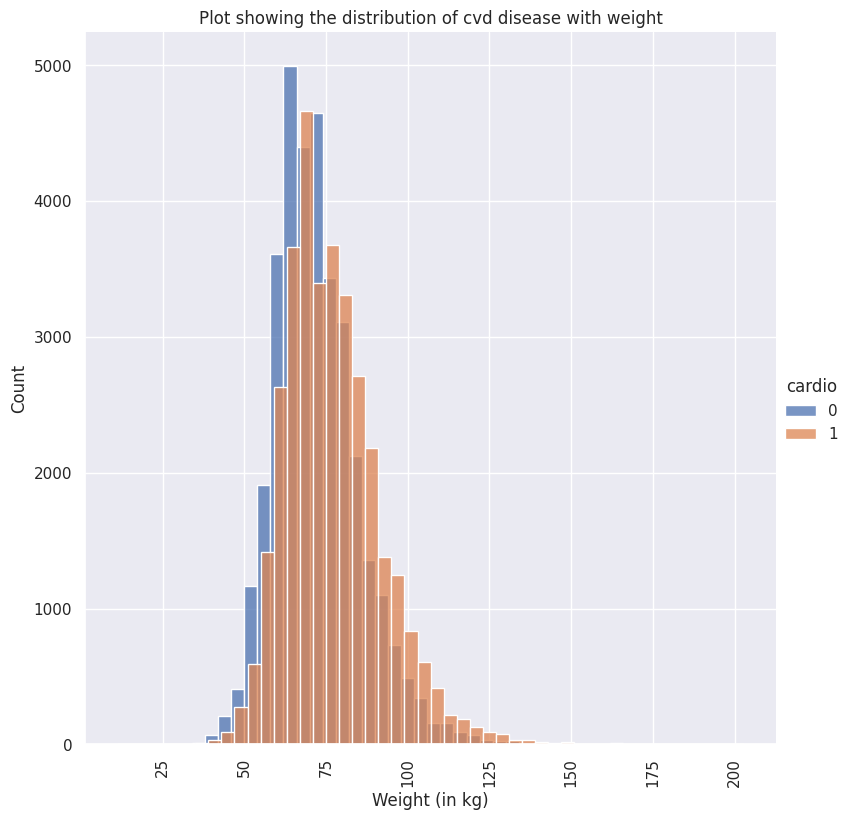

In [12]:
sns.set(font_scale=1.0)
plt.figure(dpi=100)
sns.FacetGrid(data,hue="cardio",height=8).map(sns.histplot,'weight',binwidth=4.0).add_legend()
plt.title("Plot showing the distribution of cvd disease with weight")
plt.xticks(rotation=90)
plt.xlabel("Weight (in kg)")
plt.show()

Histogram showing relative frequencies of the people with and without CVD,in different systolic blood pressure brackets.


<Figure size 640x480 with 0 Axes>

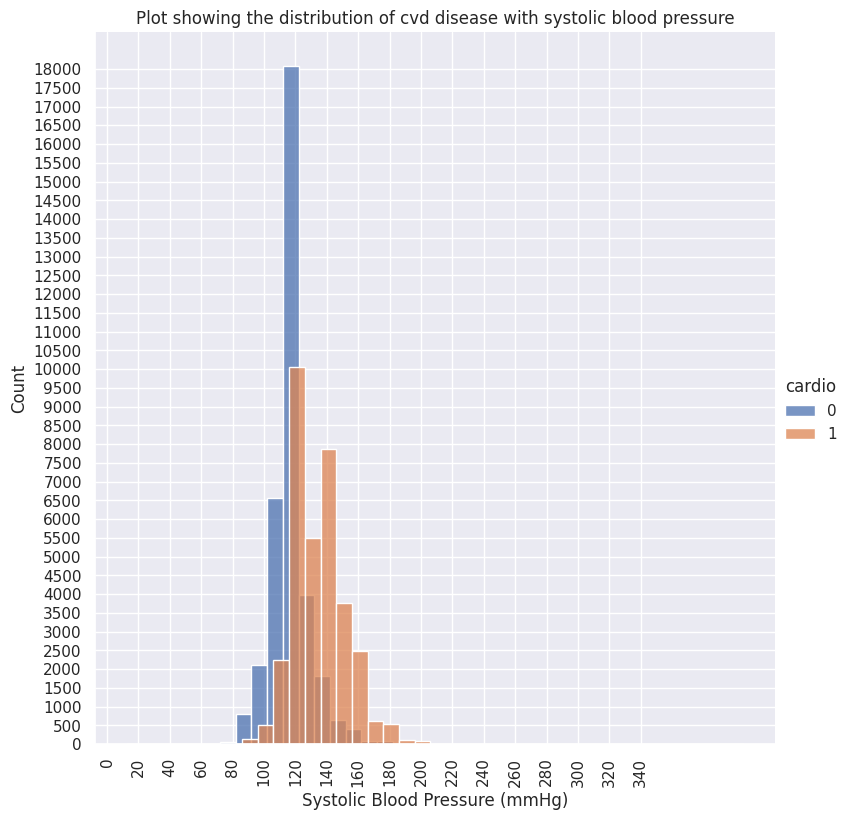

In [13]:
sns.set(font_scale=1.0)
plt.figure(dpi=100)
sns.FacetGrid(data,hue="cardio",height=8).map(sns.histplot,'ap_hi',binwidth=10.0).add_legend()
plt.title("Plot showing the distribution of cvd disease with systolic blood pressure")
plt.xticks(rotation=90)
plt.xticks(np.arange(0,350,20))
plt.yticks(np.arange(0,18500,500))
plt.xlabel("Systolic Blood Pressure (mmHg)")
plt.show()

Histogram showing relative frequencies of the people with and without CVD,in different diastolic blood pressure brackets.


<Figure size 640x480 with 0 Axes>

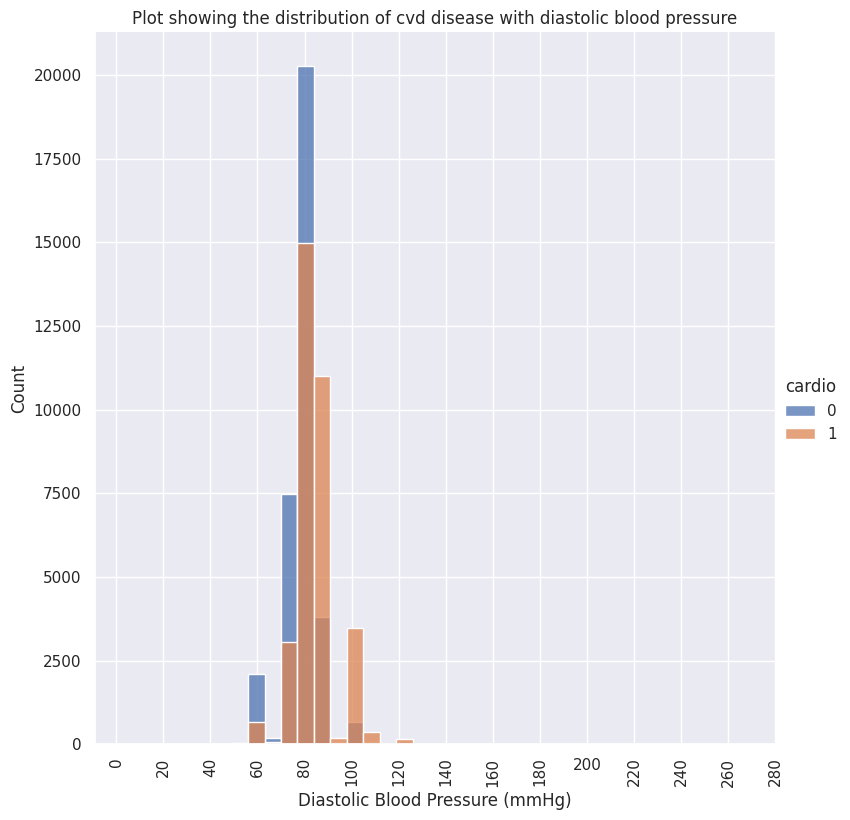

In [14]:
sns.set(font_scale=1.0)
plt.figure(dpi=100)
sns.FacetGrid(data,hue="cardio",height=8).map(sns.histplot,'ap_lo',binwidth=7.0).add_legend()
plt.title("Plot showing the distribution of cvd disease with diastolic blood pressure")
plt.xticks(rotation=90)
plt.xticks(np.arange(0,300,20))
# plt.yticks(np.arange(0,18500,500))
plt.xlabel("Diastolic Blood Pressure (mmHg)")
plt.show()

Histogram showing relative frequencies of the people with and without CVD,in different ranges of Pulse Pressure

<Figure size 640x480 with 0 Axes>

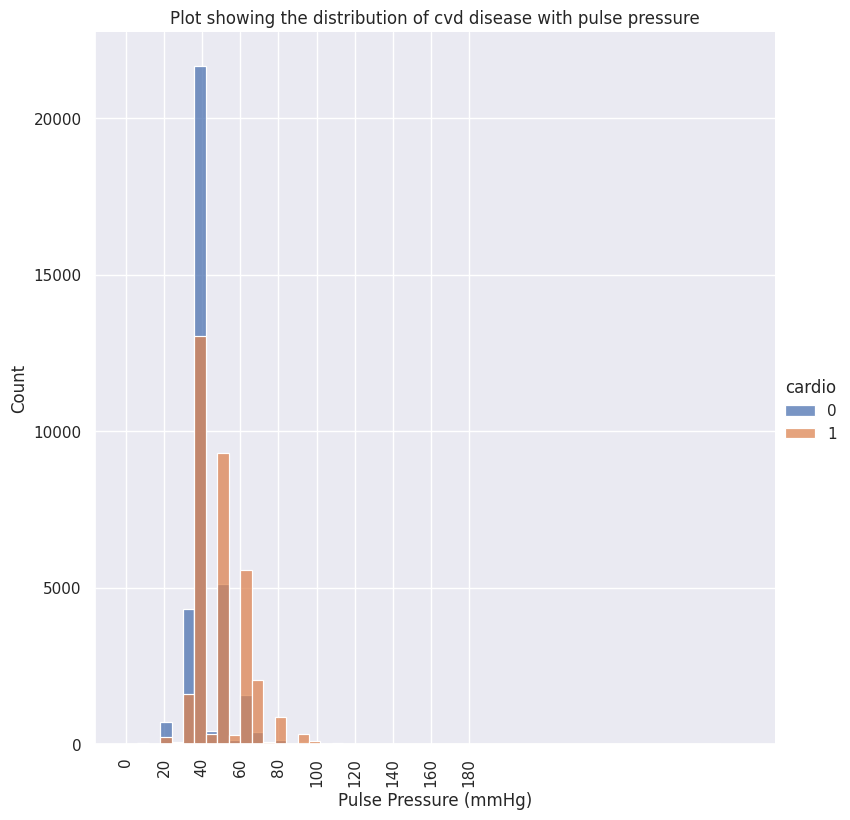

In [15]:
sns.set(font_scale=1.0)
plt.figure(dpi=100)
sns.FacetGrid(data,hue="cardio",height=8).map(sns.histplot,'PP',binwidth=6.0).add_legend()
plt.title("Plot showing the distribution of cvd disease with pulse pressure")
plt.xticks(rotation=90)
plt.xticks(np.arange(0,200,20))
plt.xlabel("Pulse Pressure (mmHg)")
plt.show()

Histogram showing relative frequencies of the people with and without CVD,in different ranges of Mean Arterial Pressure (MAP)

<Figure size 640x480 with 0 Axes>

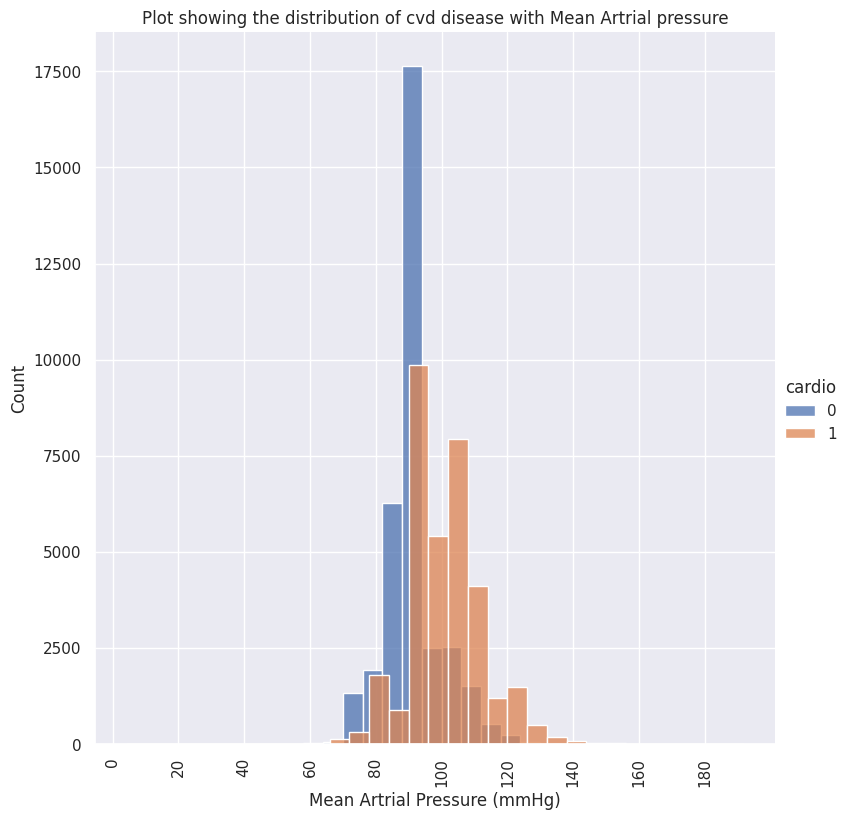

In [16]:
sns.set(font_scale=1.0)
plt.figure(dpi=100)
sns.FacetGrid(data,hue="cardio",height=8).map(sns.histplot,'MAP',binwidth=6.0).add_legend()
plt.title("Plot showing the distribution of cvd disease with Mean Artrial pressure")
plt.xticks(rotation=90)
plt.xticks(np.arange(0,200,20))
plt.xlabel("Mean Artrial Pressure (mmHg)")
plt.show()

### **Pie-Charts**

**Combined Pie-Charts for Report**

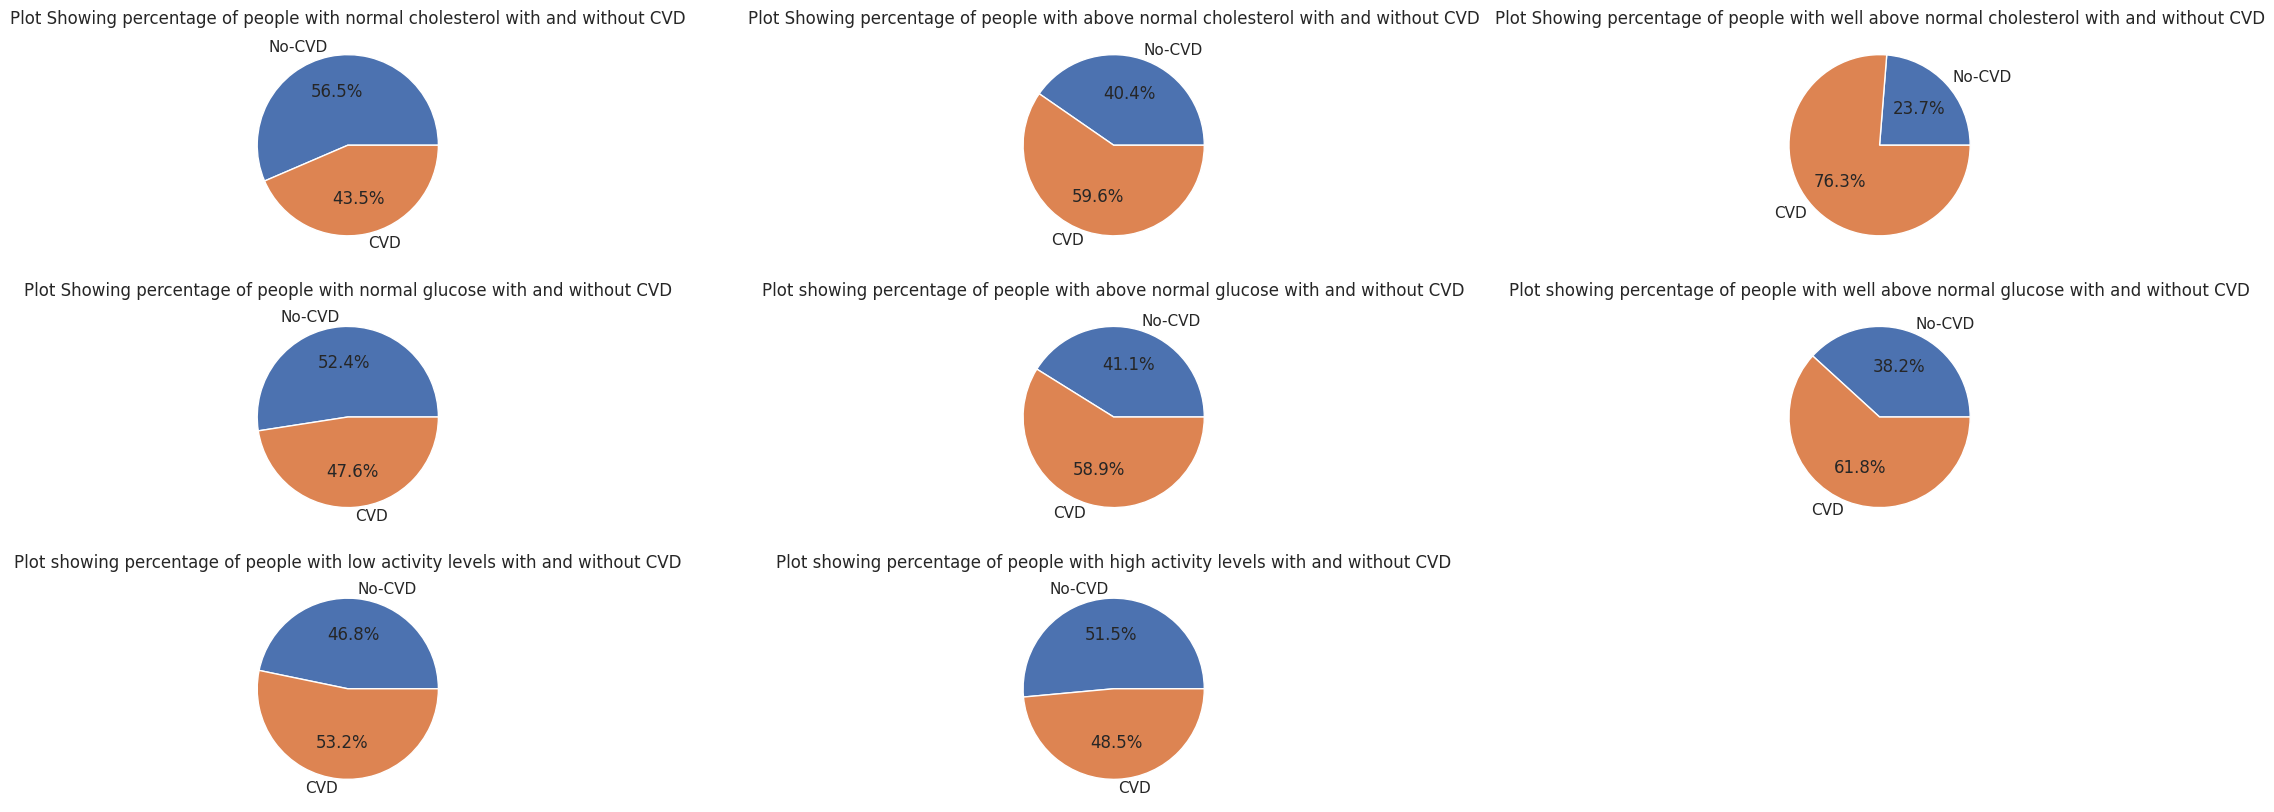

In [17]:
CVD=["No-CVD","CVD"]

count_no_cvd_cholesterol_normal = [len(data[(data['cardio'] == 0) & (data['cholesterol'] == 1)]),len(data[(data['cardio'] == 1) & (data['cholesterol'] == 1)])]
count_no_cvd_cholesterol_above_normal = [len(data[(data['cardio'] == 0) & (data['cholesterol'] == 2)]),len(data[(data['cardio'] == 1) & (data['cholesterol'] == 2)])]
count_no_cvd_cholesterol_well_above_normal = [len(data[(data['cardio'] == 0) & (data['cholesterol'] ==3)]),len(data[(data['cardio'] == 1) & (data['cholesterol'] == 3)])]

count_no_cvd_glucose_normal = [len(data[(data['cardio'] == 0) & (data['gluc'] == 1)]),len(data[(data['cardio'] == 1) & (data['gluc'] == 1)])]
count_no_cvd_glucose_above_normal = [len(data[(data['cardio'] == 0) & (data['gluc'] == 2)]),len(data[(data['cardio'] == 1) & (data['gluc'] == 2)])]
count_no_cvd_glucose_well_above_normal = [len(data[(data['cardio'] == 0) & (data['gluc'] == 3)]),len(data[(data['cardio'] == 1) & (data['gluc'] == 3)])]


count_no_cvd_less_activity = [len(data[(data['cardio'] == 0) & (data['active'] == 0)]),len(data[(data['cardio'] == 1) & (data['active'] == 0)])]
count_no_cvd_high_activity = [len(data[(data['cardio'] == 0) & (data['active'] == 1)]),len(data[(data['cardio'] == 1) & (data['active'] == 1)])]


fig, axes = plt.subplots(3, 3, figsize=(28, 10))
axes[0,0].pie(count_no_cvd_cholesterol_normal,labels=CVD,autopct='%1.1f%%')
axes[0,0].set_title("Plot Showing percentage of people with normal cholesterol with and without CVD")
axes[0,1].pie(count_no_cvd_cholesterol_above_normal,labels=CVD,autopct='%1.1f%%')
axes[0,1].set_title("Plot Showing percentage of people with above normal cholesterol with and without CVD")
axes[0,2].pie(count_no_cvd_cholesterol_well_above_normal,labels=CVD,autopct='%1.1f%%')
axes[0,2].set_title("Plot Showing percentage of people with well above normal cholesterol with and without CVD")
axes[1,0].pie(count_no_cvd_glucose_normal,labels=CVD,autopct='%1.1f%%')
axes[1,0].set_title("Plot Showing percentage of people with normal glucose with and without CVD")
axes[1,1].pie(count_no_cvd_glucose_above_normal,labels=CVD,autopct='%1.1f%%')
axes[1,1].set_title("Plot showing percentage of people with above normal glucose with and without CVD")
axes[1,2].pie(count_no_cvd_glucose_well_above_normal,labels=CVD,autopct='%1.1f%%')
axes[1,2].set_title("Plot showing percentage of people with well above normal glucose with and without CVD")
axes[2,0].pie(count_no_cvd_less_activity,labels=CVD,autopct='%1.1f%%')
axes[2,0].set_title("Plot showing percentage of people with low activity levels with and without CVD")
axes[2,1].pie(count_no_cvd_high_activity,labels=CVD,autopct='%1.1f%%')
axes[2,1].set_title("Plot showing percentage of people with high activity levels with and without CVD")
fig.delaxes(axes[2,2])
plt.show()

# *Gender*

Pie-Chart percenatges of female with and without CVD

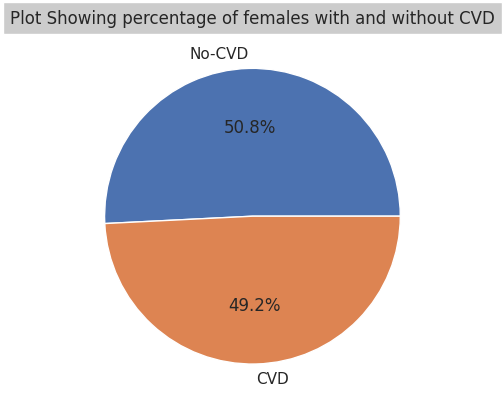

In [18]:
CVD=["No-CVD","CVD"]
count_no_cvd = [len(data[(data['cardio'] == 0) & (data['gender'] == 1)]),len(data[(data['cardio'] == 1) & (data['gender'] == 1)])]
plt.pie(count_no_cvd,labels=CVD,autopct='%1.1f%%')
plt.title("Plot Showing percentage of females with and without CVD",bbox={'facecolor':'0.8', 'pad':5})
plt.show()


Plot Showing percentage of males with and without CVD

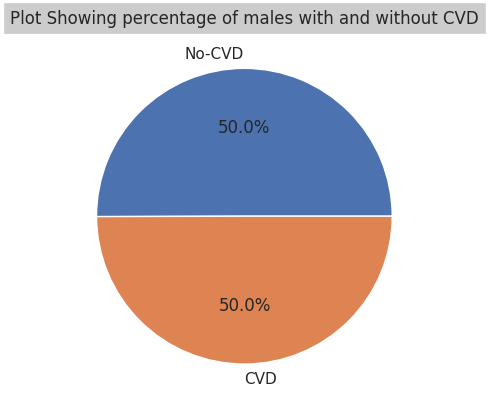

In [19]:
CVD=["No-CVD","CVD"]
count_no_cvd = [len(data[(data['cardio'] == 0) & (data['gender'] == 2)]),len(data[(data['cardio'] == 1) & (data['gender'] == 2)])]
plt.pie(count_no_cvd,labels=CVD,autopct='%1.1f%%')
plt.title("Plot Showing percentage of males with and without CVD",bbox={'facecolor':'0.8', 'pad':5})
plt.show()


# *Cholestrol*

% age of people with normal cholestrol,having CVD or not having CVD

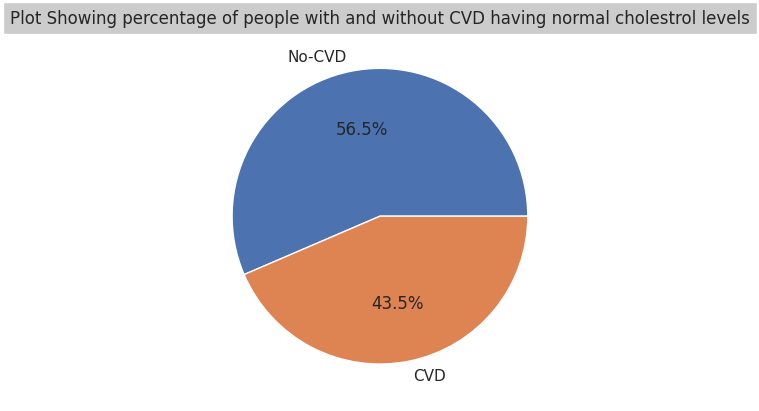

In [20]:
CVD=["No-CVD","CVD"]
count_no_cvd = [len(data[(data['cardio'] == 0) & (data['cholesterol'] == 1)]),len(data[(data['cardio'] == 1) & (data['cholesterol'] == 1)])]
plt.pie(count_no_cvd,labels=CVD,autopct='%1.1f%%')
plt.title("Plot Showing percentage of people with and without CVD having normal cholestrol levels",bbox={'facecolor':'0.8', 'pad':5})
plt.show()

% age of people with above-normal cholestrol,having CVD or not having CVD

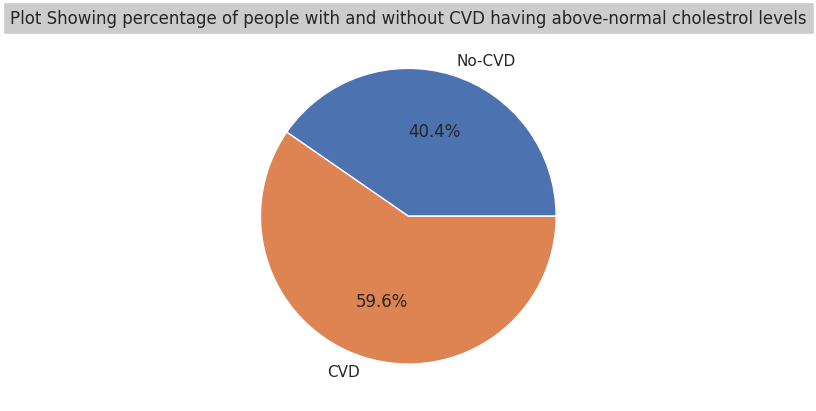

In [21]:
CVD=["No-CVD","CVD"]
count_no_cvd = [len(data[(data['cardio'] == 0) & (data['cholesterol'] == 2)]),len(data[(data['cardio'] == 1) & (data['cholesterol'] == 2)])]
plt.pie(count_no_cvd,labels=CVD,autopct='%1.1f%%')
plt.title("Plot Showing percentage of people with and without CVD having above-normal cholestrol levels",bbox={'facecolor':'0.8', 'pad':5})
plt.show()

% age of people with well-above-normal cholestrol,having CVD or not having CVD

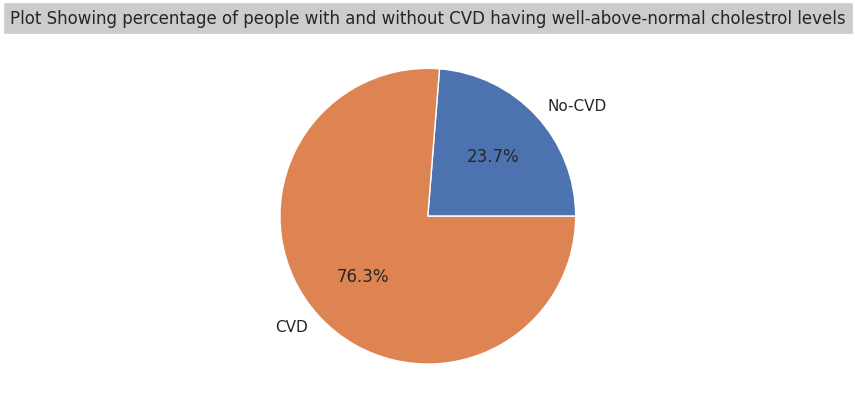

In [22]:
CVD=["No-CVD","CVD"]
count_no_cvd = [len(data[(data['cardio'] == 0) & (data['cholesterol'] == 3)]),len(data[(data['cardio'] == 1) & (data['cholesterol'] == 3)])]
plt.pie(count_no_cvd,labels=CVD,autopct='%1.1f%%')
plt.title("Plot Showing percentage of people with and without CVD having well-above-normal cholestrol levels",bbox={'facecolor':'0.8', 'pad':5})
plt.show()

# *Glucose*

% age of people with normal glucose,having CVD or not having CVD

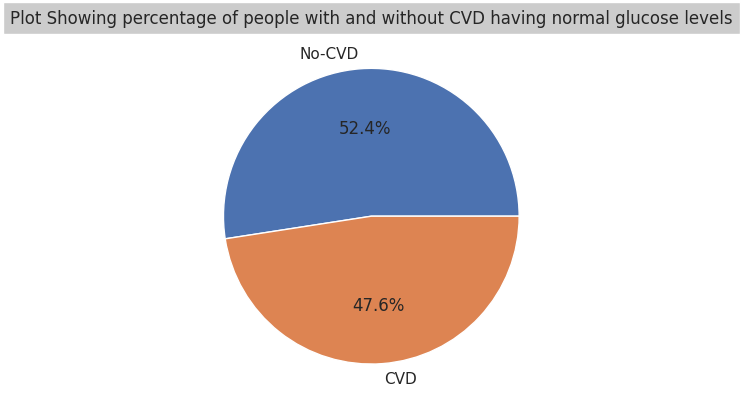

In [23]:
CVD=["No-CVD","CVD"]
count_no_cvd = [len(data[(data['cardio'] == 0) & (data['gluc'] == 1)]),len(data[(data['cardio'] == 1) & (data['gluc'] == 1)])]
plt.pie(count_no_cvd,labels=CVD,autopct='%1.1f%%')
plt.title("Plot Showing percentage of people with and without CVD having normal glucose levels",bbox={'facecolor':'0.8', 'pad':5})
plt.show()

% age of people with above-normal glucose,having CVD or not having CVD

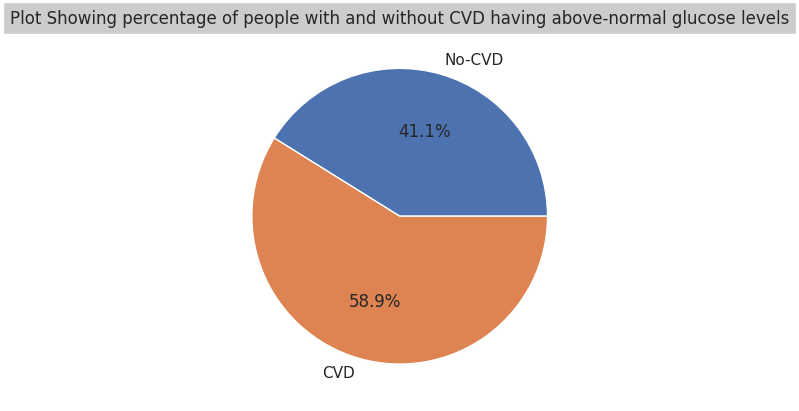

In [24]:
CVD=["No-CVD","CVD"]
count_no_cvd = [len(data[(data['cardio'] == 0) & (data['gluc'] == 2)]),len(data[(data['cardio'] == 1) & (data['gluc'] == 2)])]
plt.pie(count_no_cvd,labels=CVD,autopct='%1.1f%%')
plt.title("Plot Showing percentage of people with and without CVD having above-normal glucose levels",bbox={'facecolor':'0.8', 'pad':5})
plt.show()

% age of people with well-above-normal glucose,having CVD or not having CVD

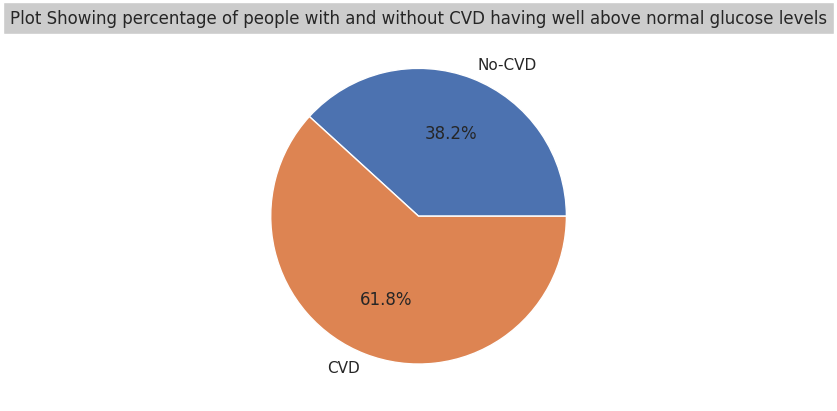

In [25]:
CVD=["No-CVD","CVD"]
count_no_cvd = [len(data[(data['cardio'] == 0) & (data['gluc'] == 3)]),len(data[(data['cardio'] == 1) & (data['gluc'] == 3)])]
plt.pie(count_no_cvd,labels=CVD,autopct='%1.1f%%')
plt.title("Plot Showing percentage of people with and without CVD having well above normal glucose levels",bbox={'facecolor':'0.8', 'pad':5})
plt.show()

# *Life-Style*

% age of people with lazy lifestyle,having CVD or not having CVD

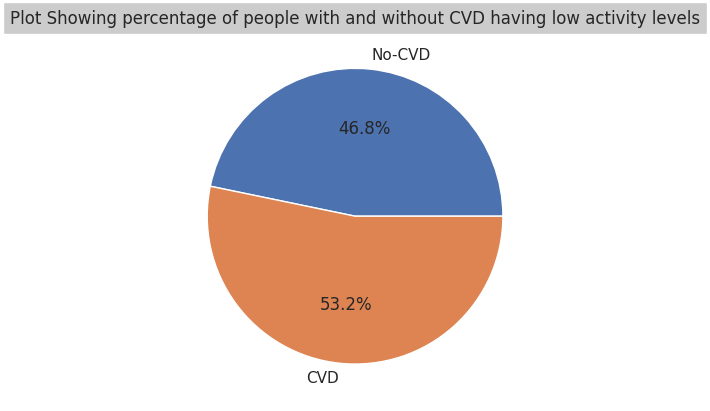

In [26]:
CVD=["No-CVD","CVD"]
count_no_cvd = [len(data[(data['cardio'] == 0) & (data['active'] == 0)]),len(data[(data['cardio'] == 1) & (data['active'] == 0)])]
plt.pie(count_no_cvd,labels=CVD,autopct='%1.1f%%')
plt.title("Plot Showing percentage of people with and without CVD having low activity levels",bbox={'facecolor':'0.8', 'pad':5})
plt.show()

% age of people with active lifestyle,having CVD or not having CVD

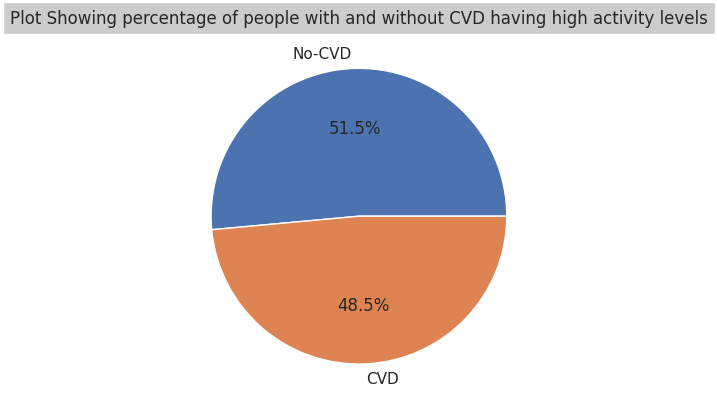

In [27]:
CVD=["No-CVD","CVD"]
count_no_cvd = [len(data[(data['cardio'] == 0) & (data['active'] == 1)]),len(data[(data['cardio'] == 1) & (data['active'] == 1)])]
plt.pie(count_no_cvd,labels=CVD,autopct='%1.1f%%')
plt.title("Plot Showing percentage of people with and without CVD having high activity levels",bbox={'facecolor':'0.8', 'pad':5})
plt.show()

# **Analysis of the dataset**

**People with  no CVD**

In [28]:
mask_0 = (data['cardio']==0)


print("People with no CVD")

# Various Factors for patients without CVD
age_max_no_cvd =  float(data.loc[mask_0,['age']].max())
age_min_no_cvd = float(data.loc[mask_0,['age']].min())
age_mean_no_cvd = float(data.loc[mask_0,['age']].mean())
age_median_no_cvd = float(data.loc[mask_0,['age']].median())

weight_max_no_cvd =  float(data.loc[mask_0,['weight']].max())
weight_min_no_cvd = float(data.loc[mask_0,['weight']].min())
weight_mean_no_cvd = float(data.loc[mask_0,['weight']].mean())
weight_median_no_cvd = float(data.loc[mask_0,['weight']].median())


sys_max_no_cvd =  float(data.loc[mask_0,['ap_hi']].max())
sys_min_no_cvd = float(data.loc[mask_0,['ap_hi']].min())
sys_mean_no_cvd = float(data.loc[mask_0,['ap_hi']].mean())
sys_median_no_cvd = float(data.loc[mask_0,['ap_hi']].median())


dys_max_no_cvd =  float(data.loc[mask_0,['ap_lo']].max())
dys_min_no_cvd = float(data.loc[mask_0,['ap_lo']].min())
dys_mean_no_cvd = float(data.loc[mask_0,['ap_lo']].mean())
dys_median_no_cvd = float(data.loc[mask_0,['ap_lo']].median())



pp_max_no_cvd =  float(data.loc[mask_0,['PP']].max())
pp_min_no_cvd = float(data.loc[mask_0,['PP']].min())
pp_mean_no_cvd = float(data.loc[mask_0,['PP']].mean())
pp_median_no_cvd = float(data.loc[mask_0,['PP']].median())



map_max_no_cvd =  float(data.loc[mask_0,['MAP']].max())
map_min_no_cvd = float(data.loc[mask_0,['MAP']].min())
map_mean_no_cvd = float(data.loc[mask_0,['MAP']].mean())
map_median_no_cvd = float(data.loc[mask_0,['MAP']].median())



data_no_cvd  =       [ ['Age',age_max_no_cvd,age_min_no_cvd,age_mean_no_cvd,age_median_no_cvd],
                       ['Weight',weight_max_no_cvd,weight_min_no_cvd,weight_mean_no_cvd,weight_median_no_cvd],
                       ['Systolic BP (ap_hi)',sys_max_no_cvd,sys_min_no_cvd,sys_mean_no_cvd,sys_median_no_cvd],
                       ['Dystolic BP(ap_lo)',dys_max_no_cvd,dys_min_no_cvd,dys_mean_no_cvd,dys_median_no_cvd],
                       ['Pulse Pressure (PP)',pp_max_no_cvd,pp_min_no_cvd,pp_mean_no_cvd,pp_median_no_cvd],
                       ['Mean Arterial Pressure (MAP)',map_max_no_cvd,map_min_no_cvd,map_mean_no_cvd,map_median_no_cvd]
                     ]



analysis_df_no_cvd = pd.DataFrame(data_no_cvd,columns = ['Parameter','Max','Min','Mean','Median'])
analysis_df_no_cvd

People with no CVD


/tmp/ipykernel_19/3879207497.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  age_max_no_cvd =  float(data.loc[mask_0,['age']].max())
/tmp/ipykernel_19/3879207497.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  age_min_no_cvd = float(data.loc[mask_0,['age']].min())
/tmp/ipykernel_19/3879207497.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  age_mean_no_cvd = float(data.loc[mask_0,['age']].mean())
/tmp/ipykernel_19/3879207497.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  age_median_no_cvd = float(data.loc[mask_0,['age']].median())
/tmp/ipykernel_19/3879207497.py:12: FutureWarning:

Parameter           Max      Min          Mean  \
0                           Age  23678.000000  10798.0  18879.829969   
1                        Weight    200.000000     22.0     71.568767   
2           Systolic BP (ap_hi)    309.000000     12.0    119.603645   
3            Dystolic BP(ap_lo)    160.000000      0.0     78.068790   
4           Pulse Pressure (PP)    309.000000      0.0     41.534856   
5  Mean Arterial Pressure (MAP)    173.333333      4.0     91.913742   

         Median  
0  19005.000000  
1     70.000000  
2    120.000000  
3     80.000000  
4     40.000000  
5     93.333333

**People with CVD**

In [29]:
mask_1 = (data['cardio']==1)


print("People with CVD")
# Various Factors for patients with CVD
age_max_cvd =  float(data.loc[mask_1,['age']].max())
age_min_cvd = float(data.loc[mask_1,['age']].min())
age_mean_cvd = float(data.loc[mask_1,['age']].mean())
age_median_cvd = float(data.loc[mask_1,['age']].median())

weight_max_cvd =  float(data.loc[mask_1,['weight']].max())
weight_min_cvd = float(data.loc[mask_1,['weight']].min())
weight_mean_cvd = float(data.loc[mask_1,['weight']].mean())
weight_median_cvd = float(data.loc[mask_1,['weight']].median())


sys_max_cvd =  float(data.loc[mask_1,['ap_hi']].max())
sys_min_cvd = float(data.loc[mask_1,['ap_hi']].min())
sys_mean_cvd = float(data.loc[mask_1,['ap_hi']].mean())
sys_median_cvd = float(data.loc[mask_1,['ap_hi']].median())


dys_max_cvd =  float(data.loc[mask_1,['ap_lo']].max())
dys_min_cvd = float(data.loc[mask_1,['ap_lo']].min())
dys_mean_cvd = float(data.loc[mask_1,['ap_lo']].mean())
dys_median_cvd = float(data.loc[mask_1,['ap_lo']].median())



pp_max_cvd =  float(data.loc[mask_1,['PP']].max())
pp_min_cvd = float(data.loc[mask_1,['PP']].min())
pp_mean_cvd = float(data.loc[mask_1,['PP']].mean())
pp_median_cvd = float(data.loc[mask_1,['PP']].median())



map_max_cvd =  float(data.loc[mask_1,['MAP']].max())
map_min_cvd = float(data.loc[mask_1,['MAP']].min())
map_mean_cvd = float(data.loc[mask_1,['MAP']].mean())
map_median_cvd = float(data.loc[mask_1,['MAP']].median())



data_cvd  =       [ ['Age',age_max_cvd,age_min_cvd,age_mean_cvd,age_median_cvd],
                       ['Weight',weight_max_cvd,weight_min_cvd,weight_mean_cvd,weight_median_cvd],
                       ['Systolic BP (ap_hi)',sys_max_cvd,sys_min_cvd,sys_mean_cvd,sys_median_cvd],
                       ['Dystolic BP(ap_lo)',dys_max_cvd,dys_min_cvd,dys_mean_cvd,dys_median_cvd],
                       ['Pulse Pressure (PP)',pp_max_cvd,pp_min_cvd,pp_mean_cvd,pp_median_cvd],
                       ['Mean Arterial Pressure (MAP)',map_max_cvd,map_min_cvd,map_mean_cvd,map_median_cvd]
                     ]



analysis_df_cvd = pd.DataFrame(data_cvd,columns = ['Parameter','Max','Min','Mean','Median'])
analysis_df_cvd

People with CVD


/tmp/ipykernel_19/2604475855.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  age_max_cvd =  float(data.loc[mask_1,['age']].max())
/tmp/ipykernel_19/2604475855.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  age_min_cvd = float(data.loc[mask_1,['age']].min())
/tmp/ipykernel_19/2604475855.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  age_mean_cvd = float(data.loc[mask_1,['age']].mean())
/tmp/ipykernel_19/2604475855.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  age_median_cvd = float(data.loc[mask_1,['age']].median())
/tmp/ipykernel_19/2604475855.py:11: FutureWarning: Calling floa

Parameter      Max      Min          Mean   Median
0                           Age  23713.0  14275.0  20061.317136  20387.5
1                        Weight    200.0     11.0     76.720184     75.0
2           Systolic BP (ap_hi)    401.0     16.0    133.895023    130.0
3            Dystolic BP(ap_lo)    182.0      0.0     84.510442     80.0
4           Pulse Pressure (PP)    321.0      0.0     49.384581     50.0
5  Mean Arterial Pressure (MAP)    187.0     12.0    100.971969    100.0

# Feature Extraction

**Outlier Detction and Cleaning**

Z-Score

In [30]:


# Function for Z-score outlier detection
def zscore_outlier(x, lb, ub):
    zscore = ((x - x.mean()) / x.std()).copy()
    result_ = pd.Series([0] * len(x),index=x.index)
    result_[(zscore < lb) | (zscore > ub)] = 1
    return result_

def zscore_function(data):

  # Assuming 'data' is your DataFrame

  # PLOTTING A SCATTER PLOT AND HIGHLIGHTING THE OUTLIERS DETECTED BY Z-SCORE METHOD
  num_columns = len(data.columns)
  num_rows = (num_columns + 1) // 2  # Calculate the number of rows needed

  fig, ax = plt.subplots(num_rows, 2, figsize=(20, num_rows * 5))
  row = col = 0

  # Create a new DataFrame to store the filtered data
  filtered_data = data.copy()
  non_categorical_columns=['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'PP', 'MAP']
  for n, i in enumerate(non_categorical_columns):
      if (n % 2 == 0) and (n > 0):
          row += 1
          col = 0
      outliers = zscore_outlier(data[i], -2.75, 2.75)

      # Remove outliers from the DataFrame
      filtered_data[i] = np.where(outliers == 1, np.nan, data[i])

      if sum(outliers) == 0:
          sns.scatterplot(x=np.arange(len(data[i])), y=data[i], ax=ax[row, col], legend=False, color='green')
      else:
          sns.scatterplot(x=np.arange(len(data[i])), y=data[i], ax=ax[row, col], hue=outliers, palette=['green', 'red'])
      for x, y in zip(np.arange(len(data[i]))[outliers == 1], data[i][outliers == 1]):
          ax[row, col].text(x=x, y=y, s=y, fontsize=8)
      ax[row, col].set_ylabel("")
      ax[row, col].set_title(i)
      ax[row, col].xaxis.set_visible(False)
      if sum(outliers) > 0:
          ax[row, col].legend(ncol=2)
      col += 1

  # Remove unused subplots
  for r in range(row+1, num_rows):
      for c in range(2):
          ax[r, c].axis('off')

  plt.show()
  filtered_data = filtered_data.dropna()
  return filtered_data



LOF

In [31]:
data_lof = data.copy(deep=True)
lof = LocalOutlierFactor(n_neighbors=20,contamination=0.20)
outlier_scores = lof.fit_predict(data_lof)


data_lof["LOF_Score"] = outlier_scores
data_lof = data_lof[data_lof["LOF_Score"]>=0]
data_lof.drop(columns=['LOF_Score'],inplace=True)
display(data_lof)

INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.neighbors.NearestNeighbors.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.neighbors.NearestNeighbors.kneighbors: running accelerated version on CPU


age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
1      20228       1     156    85.0    140     90            3     1      0   
2      18857       1     165    64.0    130     70            3     1      0   
3      17623       2     169    82.0    150    100            1     1      0   
4      17474       1     156    56.0    100     60            1     1      0   
5      21914       1     151    67.0    120     80            2     2      0   
...      ...     ...     ...     ...    ...    ...          ...   ...    ...   
69993  19699       1     172    70.0    130     90            1     1      0   
69994  21074       1     165    80.0    150     80            1     1      0   
69995  19240       2     168    76.0    120     80            1     1      1   
69998  22431       1     163    72.0    135     80            1     2      0   
69999  20540       1     170    72.0    120     80            2     1      0   

       alco  active  PP         MAP  cardio  
1         0       1  50  106.666667       1  
2         0       0  60   90.000000       1  
3         0       1  50  116.666667       1  
4         0       0  40   73.333333       0  
5         0       0  40   93.333333       0  
...     ...     ...  ..         ...     ...  
69993     0       1  40  103.333333       1  
69994     0       1  70  103.333333       1  
69995     0       1  40   93.333333       0  
69998     0       0  55   98.333333       1  
69999     0       1  40   93.333333       0  

[54981 rows x 14 columns]

## **Models**

**Generic Codes**


*K-fold on PCA*

In [32]:
def find_optimal_pca_components(X_train,Y_train,model):
    n_components = list(range(1, X_train.shape[1] + 1))
    pca = PCA()
    pipeline = Pipeline([
        ('pca', PCA()),
        ('model', model)
    ])
    param_grid = {
        'pca__n_components': n_components,
    }

    grid_search = GridSearchCV(pipeline, param_grid,verbose=4,cv=5,n_jobs=-1)

    grid_search.fit(X_train, Y_train)

    print(f'Optimal number of components: {grid_search.best_params_["pca__n_components"]}')
    print(f'Cross-validation score: {grid_search.best_score_}')
    return (grid_search.best_params_["pca__n_components"],grid_search.best_score_)

*PCA*

In [33]:
def find_pca(X_train,X_test,Y_train,Y_test,model):
  pca = PCA()
  pca.n_components=find_optimal_pca_components(X_train,Y_train,model)[0]
  pca.fit(X_train)
  X_train_pca = pca.transform(X_train)
  X_test_pca = pca.transform(X_test)
  return (X_train_pca,X_test_pca,Y_train,Y_test)

*One_hot_encoding*

In [34]:
def one_hot_encoding(data):
  data2 = data.copy(deep=True)
  categorical_columns = ['gender','cholesterol','gluc','smoke','alco','active']
  data2 = pd.get_dummies(data, columns=categorical_columns,drop_first=True)
  temp=data2.pop('cardio')
  data2['cardio']=temp
  return data2

*K-fold on Logistic Regression*

In [35]:
def logistic_grid_search(x_train,y_train):
    model = LogisticRegression(penalty='l2',n_jobs=-1)
    param_grid = {
    'C': [0.01, 0.1, 1, 10,100],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    }
    grid_search = GridSearchCV(model,param_grid, cv=5, scoring='accuracy',n_jobs=-1,verbose=3)
    grid_search.fit(x_train, y_train)

    optimal_c = grid_search.best_params_["C"]
    optimal_solver = grid_search.best_params_["solver"]

    print("Optimal C = ",optimal_c)
    print("Optimal Solver = ",optimal_solver)
    return [optimal_c,optimal_solver]


*K-Fold on MLP keras*

In [36]:
def Nueral_Net_Model(units1=200,units2=200,input_size=13):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(input_size,input_shape=(input_size,)))
    model.add(tf.keras.layers.Dense(units1,activation='relu'))
    model.add(tf.keras.layers.Dense(units2,activation='relu'))
    model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

    model.compile(
            optimizer="adam",
            loss='binary_crossentropy',
            metrics=["accuracy"]
    )
    return model

In [37]:
def MLP_grid_search(x_train,y_train,input_size):
    keras_model = KerasClassifier(build_fn=Nueral_Net_Model,epochs=20,verbose=3,units1=200,units2=200,input_size=input_size)
    param_grid={
        'units1':[200,250,300],
        'units2':[200,250,300]
    }
    grid_search = GridSearchCV(keras_model,param_grid, cv=5, scoring='accuracy',n_jobs=-1,verbose=3)
    grid_search.fit(x_train, y_train)
    optimal_hidden_nuerons_1 = grid_search.best_params_["units1"]
    optimal_hidden_nuerons_2 = grid_search.best_params_["units2"]
    print(f'Optimal number of nuerons in the first hidden layer = {optimal_hidden_nuerons_1}')
    print(f'Optimal number of nuerons in the second hidden layer = {optimal_hidden_nuerons_2}')
    return [optimal_hidden_nuerons_1,optimal_hidden_nuerons_2]

*K-Fold on Decision Tree*

In [38]:
def DTC_gridcv(X_train, X_test, Y_train, Y_test):
    param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    }
    clf = DecisionTreeClassifier(random_state=42)
    grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy',n_jobs=-1)
    grid_search.fit(X_train, Y_train)
    optimal_max_depth = grid_search.best_params_["max_depth"]
    optimal_min_samples_split = grid_search.best_params_["min_samples_split"]
    optimal_min_samples_leaf = grid_search.best_params_["min_samples_leaf"]
    print(f'Optimal value of max depth = {optimal_max_depth}')
    print(f'Optimal value of min samples split = {optimal_min_samples_split}')
    print(f'Optimal value of min samples leaf = {optimal_min_samples_leaf}')
    return [optimal_max_depth,optimal_min_samples_split,optimal_min_samples_leaf]

*K-Fold on SVM*

In [39]:
def SVM_gridcv(X_train, X_test, Y_train, Y_test):
    param_grid = {
    'C': [0.1, 1, 10, 100],          
    'kernel': ['linear','rbf'],
    }
    clf = SVC()
    grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy',n_jobs=-1)
    grid_search.fit(X_train, Y_train)
    optimal_C = grid_search.best_params_["C"]
    optimal_kernel = grid_search.best_params_["kernel"]
    print(f'Optimal value of C = {optimal_C}')
    print(f'Optimal value of kernel = {optimal_kernel}')
    return [optimal_C,optimal_kernel]

*K-Fold on Random Forest*

In [40]:
def rf_grid(X_train,Y_train):
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None,10, 15],
        'min_samples_leaf': [2, 4],
        'max_features': ['sqrt', 'log2'],
        'bootstrap': [True, False]
    }
    rf = RandomForestClassifier(n_jobs=-1)
    grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy',n_jobs=-1,verbose=4)
    grid_search.fit(X_train,Y_train)
    print("Best Parameters : ")
    print("Optimal Estimators : ",grid_search.best_params_["n_estimators"])
    print("Optimal Max Depth : ",grid_search.best_params_["max_depth"])
#     print("Optimal Min Samples Split : ",grid_search.best_params_["min_samples_split"])
    print("Optimal Min Samples Leaf : ",grid_search.best_params_["min_samples_leaf"])
    print("Optimal Max Features : ",grid_search.best_params_["max_features"])
    print("Optimal Bootstrap : ",grid_search.best_params_["bootstrap"])
    print("Best Estimator :",grid_search.best_estimator_)
    return grid_search

K-fold on xgboost

In [41]:
def xg_grid(X_train,Y_train):
    param_grid = {
        'learning_rate': [0.5, 0.1, 1.5, 0.2],
        'n_estimators': [100, 500, 1000, 1500],
        'max_depth': [3, 5, 7]
    }

    # Create the XGBoost model
    xgb_model = XGBClassifier(n_jobs=-1)

    # Create GridSearchCV object
    grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='f1', cv=5, n_jobs=4, verbose=2)
    grid_search.fit(X_train, Y_train)

    # Print the best hyperparameters
    print("Best Hyperparameters:", grid_search.best_params_)
    print("learning rate: ",grid_search.best_params_['learning_rate'])
    print("n_estimators: ",grid_search.best_params_['n_estimators'])
    print("max_depth: ",grid_search.best_params_['max_depth'])
    return grid_search

*Train-Test-Split (normal data)*

In [42]:
def find_train_test_split(data,test_size):
  data2=data.copy(deep=True)
  X=data.iloc[:,:-1]
  y=data.iloc[:,-1]
  X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=10)
  ct = ColumnTransformer([('x', StandardScaler(),[0,2,3,4,5,11,12])], remainder ='passthrough')
  X_train = ct.fit_transform(X_train)
  X_test = ct.transform(X_test)
  return (X_train,X_test,Y_train,Y_test)

Train-Test-Split (Test Data)

In [43]:
def find_train_test_split2(data,test_size):
  data2=data.copy(deep=True)
  X=data.iloc[:,:-1]
  y=data.iloc[:,-1]
  X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=10)
  ct = ColumnTransformer([('x', StandardScaler(),[0,1,2,3,4,5,6])], remainder ='passthrough')
  X_train = ct.fit_transform(X_train)
  X_test = ct.transform(X_test)
  return (X_train,X_test,Y_train,Y_test)

*Naive Bayes*

In [44]:
def naive_bayes(X_train,X_test,y_train,y_test):


# Create and train the Gaussian Naive Bayes model
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = gnb.predict(X_test)
    y_pred_train = gnb.predict(X_train)

    accuracy = metrics.accuracy_score(y_train, y_pred_train)
    recall = metrics.recall_score(y_train,y_pred_train)
    f1 = metrics.f1_score(y_train,y_pred_train)
    precision = metrics.precision_score(y_train,y_pred_train)
    print("-----------------Training Data Metrics : --------------------------------")
    print("Accuracy:", accuracy)
    print("Recall:", recall)
    print("f1:", f1)
    print("Precision:", precision)
    print("Confusion Matrix : ")
    print(metrics.confusion_matrix(y_pred_train,y_train))
    print()
    # Evaluate the model
    print("-------------------Testing Data Metrics-------------------")
    accuracy = metrics.accuracy_score(y_test, y_pred)
    recall = metrics.recall_score(y_test,y_pred)
    f1 = metrics.f1_score(y_test,y_pred)
    precision = metrics.precision_score(y_test,y_pred)
    print("Confusion Matrix : ")
    print(metrics.confusion_matrix(y_pred,y_test))

    print("Accuracy:", accuracy)
    print("Recall:", recall)
    print("f1:", f1)
    print("Precision:", precision)


*Logistic Regression*

In [45]:
def logistic_regression(x_train,x_test,y_train,y_test,threshold_probability,optimal_c,optimal_solver):
  model = None
  if optimal_c is not None:
    model = LogisticRegression(C=optimal_c,solver=optimal_solver,penalty='l2',n_jobs=-1)
  else:
    model = LogisticRegression(penalty='l2',n_jobs=-1)
  model.fit(x_train,y_train)
  probs_train = model.predict_proba(x_train)
  y_predict_train = (probs_train[:,1]>=threshold_probability).astype('int')

  probs_test = model.predict_proba(x_test)
  y_predict_test = (probs_test[:,1]>=threshold_probability).astype('int')

  print("---------------Training Data Metrics-----------------------")
  print("Accuracy  = ",metrics.accuracy_score(y_predict_train,y_train))
  print("Precision = ",metrics.precision_score(y_predict_train,y_train))
  print("Recall = ",metrics.recall_score(y_predict_train,y_train))
  print("F1 Score = ",metrics.f1_score(y_predict_train,y_train))

  print(metrics.confusion_matrix(y_predict_train,y_train))


  print("-------------------------Testing Data Metrics---------------------")
  print("Accuracy  = ",metrics.accuracy_score(y_predict_test,y_test))
  print("Precision = ",metrics.precision_score(y_predict_test,y_test))
  print("Recall = ",metrics.recall_score(y_predict_test,y_test))
  print("F1 Score = ",metrics.f1_score(y_predict_test,y_test))

  print(metrics.confusion_matrix(y_predict_test,y_test))

SVM

In [46]:
def SVM_generic(X_train,X_test,y_train,y_test,_kernel,_C=None):
  # target_column = 'cardio'

  # svm_model = SVC(kernel='linear')  # You can choose different kernels like 'rbf', 'poly', etc.
  svm_model = None
  if _C is not None:
        svm_model = SVC(kernel=_kernel,C=_C)
  else:
        svm_model = SVC(kernel=_kernel)
  svm_model.fit(X_train, y_train)
  y_predict_test = svm_model.predict(X_test)
  y_predict_train = svm_model.predict(X_train)


  print("---------------Training Data Metrics-----------------------")
  print("Accuracy  = ",metrics.accuracy_score(y_train,y_predict_train))
  print("Precision = ",metrics.precision_score(y_predict_train,y_train))
  print("Recall = ",metrics.recall_score(y_predict_train,y_train))
  print("F1 Score = ",metrics.f1_score(y_predict_train,y_train))

  print(metrics.confusion_matrix(y_predict_train,y_train))


  print("-------------------------Testing Data Metrics---------------------")
  print("Accuracy  = ",metrics.accuracy_score(y_predict_test,y_test))
  print("Precision = ",metrics.precision_score(y_predict_test,y_test))
  print("Recall = ",metrics.recall_score(y_predict_test,y_test))
  print("F1 Score = ",metrics.f1_score(y_predict_test,y_test))

  print(metrics.confusion_matrix(y_predict_test,y_test))

Decision Tree

In [47]:
def DTCgeneric(X_train,X_test,Y_train,Y_test,maxdep,minsam_split,minsam_leaf):
    clf = DecisionTreeClassifier(random_state=42, max_depth=maxdep,min_samples_split=minsam_split,min_samples_leaf=minsam_leaf)
    clf.fit(X_train, Y_train)
    Y_pred_train = clf.predict(X_train)
    Y_pred_test = clf.predict(X_test)

#     accuracy = accuracy_score(Y_test, Y_pred)
#     print(f'Accuracy: {accuracy * 100:.2f}%')


    print("---------------Training Data Metrics-----------------------")
    print("Accuracy  = ",metrics.accuracy_score(Y_train,Y_pred_train))
    print("Precision = ",metrics.precision_score(Y_pred_train,Y_train))
    print("Recall = ",metrics.recall_score(Y_pred_train,Y_train))
    print("F1 Score = ",metrics.f1_score(Y_pred_train,Y_train))

    print(metrics.confusion_matrix(Y_pred_train,Y_train))


    print("-------------------------Testing Data Metrics---------------------")
    print("Accuracy  = ",metrics.accuracy_score(Y_pred_test,Y_test))
    print("Precision = ",metrics.precision_score(Y_pred_test,Y_test))
    print("Recall = ",metrics.recall_score(Y_pred_test,Y_test))
    print("F1 Score = ",metrics.f1_score(Y_pred_test,Y_test))

    print(metrics.confusion_matrix(Y_pred_test,Y_test))

Random Forest

In [48]:
def random_forest(X_train,Y_train,X_test,Y_test,best_params):
    if(best_params!=None):
        rf_classifier = RandomForestClassifier(**best_params,n_jobs=-1)
    else:
        rf_classifier = RandomForestClassifier(n_jobs=-1)
    rf_classifier.fit(X_train,Y_train)
    y_train_pred=rf_classifier.predict(X_train)
    y_test_pred=rf_classifier.predict(X_test)
    print("---------------Training Data Metrics-----------------------")
    print("Accuracy  = ",metrics.accuracy_score(Y_train,y_train_pred))
    print("Precision = ",metrics.precision_score(y_train_pred,Y_train))
    print("Recall = ",metrics.recall_score(y_train_pred,Y_train))
    print("F1 Score = ",metrics.f1_score(y_train_pred,Y_train))
    print(metrics.confusion_matrix(y_train_pred,Y_train))
    print("-------------------------Testing Data Metrics---------------------")
    print("Accuracy  = ",metrics.accuracy_score(y_test_pred,Y_test))
    print("Precision = ",metrics.precision_score(y_test_pred,Y_test))
    print("Recall = ",metrics.recall_score(y_test_pred,Y_test))
    print("F1 Score = ",metrics.f1_score(y_test_pred,Y_test))

Xgboost

In [49]:
def xgboost_classifier(X_train, X_test, y_train, y_test,best_params):
    if best_params==None:
    # Create and train the XGBoost model
        xgb_model = XGBClassifier(
        learning_rate=0.02,  # Lowering the learning rate for more robustness
        n_estimators=100,   # Increasing the number of boosting rounds
        max_depth=3        # Reducing the maximum depth of each tree
    )
    else:
        xgb_model=XGBClassifier(**best_params)
    xgb_model.fit(X_train, y_train)

    # Make predictions on the training set
    y_pred_train = xgb_model.predict(X_train)

    # Evaluate the model on the training set
    accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
    recall_train = metrics.recall_score(y_train, y_pred_train)
    f1_train = metrics.f1_score(y_train, y_pred_train)
    precision_train = metrics.precision_score(y_train, y_pred_train)
    print("-----------------Training Data Metrics : --------------------------------")
    print("Accuracy:", accuracy_train)
    print("Recall:", recall_train)
    print("F1 Score:", f1_train)
    print("Precision:", precision_train)
    print()

    # Make predictions on the test set
    y_pred = xgb_model.predict(X_test)

    # Evaluate the model on the test set
    accuracy_test = metrics.accuracy_score(y_test, y_pred)
    recall_test = metrics.recall_score(y_test, y_pred)
    f1_test = metrics.f1_score(y_test, y_pred)
    precision_test = metrics.precision_score(y_test, y_pred)
    print("-------------------Testing Data Metrics-------------------")
    print("Accuracy:", accuracy_test)
    print("Recall:", recall_test)
    print("F1 Score:", f1_test)
    print("Precision:", precision_test)
    print()


MLP

In [50]:
def MLP_tensor_generic(x_train,x_test,y_train,y_test,optimal_layers,max_iterations,input_size):

    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(optimal_layers[0],activation='relu',input_shape=(input_size,)),
        tf.keras.layers.Dense(optimal_layers[1],activation='relu'),
        tf.keras.layers.Dense(optimal_layers[2],activation='relu'),
        tf.keras.layers.Dense(optimal_layers[3],activation='sigmoid')
    ])
    model.compile(
            optimizer="adam",
            loss='binary_crossentropy',
            metrics=["accuracy"]
    )
    model.fit(x_train,y_train,epochs=max_iterations)
    model.evaluate(x_test,y_test)
    y_train_pred_probabilties = model.predict(x_train)
    y_predict_train = (y_train_pred_probabilties>0.5).astype(int)

    y_test_pred_probabilities = model.predict(x_test)
    y_predict_test = (y_test_pred_probabilities>0.5).astype(int)
    print("---------------Training Data Metrics-----------------------")
    print("Accuracy  = ",metrics.accuracy_score(y_train,y_predict_train))
    print("Precision = ",metrics.precision_score(y_predict_train,y_train))
    print("Recall = ",metrics.recall_score(y_predict_train,y_train))
    print("F1 Score = ",metrics.f1_score(y_predict_train,y_train))

    print(metrics.confusion_matrix(y_predict_train,y_train))


    print("-------------------------Testing Data Metrics---------------------")
    print("Accuracy  = ",metrics.accuracy_score(y_predict_test,y_test))
    print("Precision = ",metrics.precision_score(y_predict_test,y_test))
    print("Recall = ",metrics.recall_score(y_predict_test,y_test))
    print("F1 Score = ",metrics.f1_score(y_predict_test,y_test))

    print(metrics.confusion_matrix(y_predict_test,y_test))

**Naive Bayes**

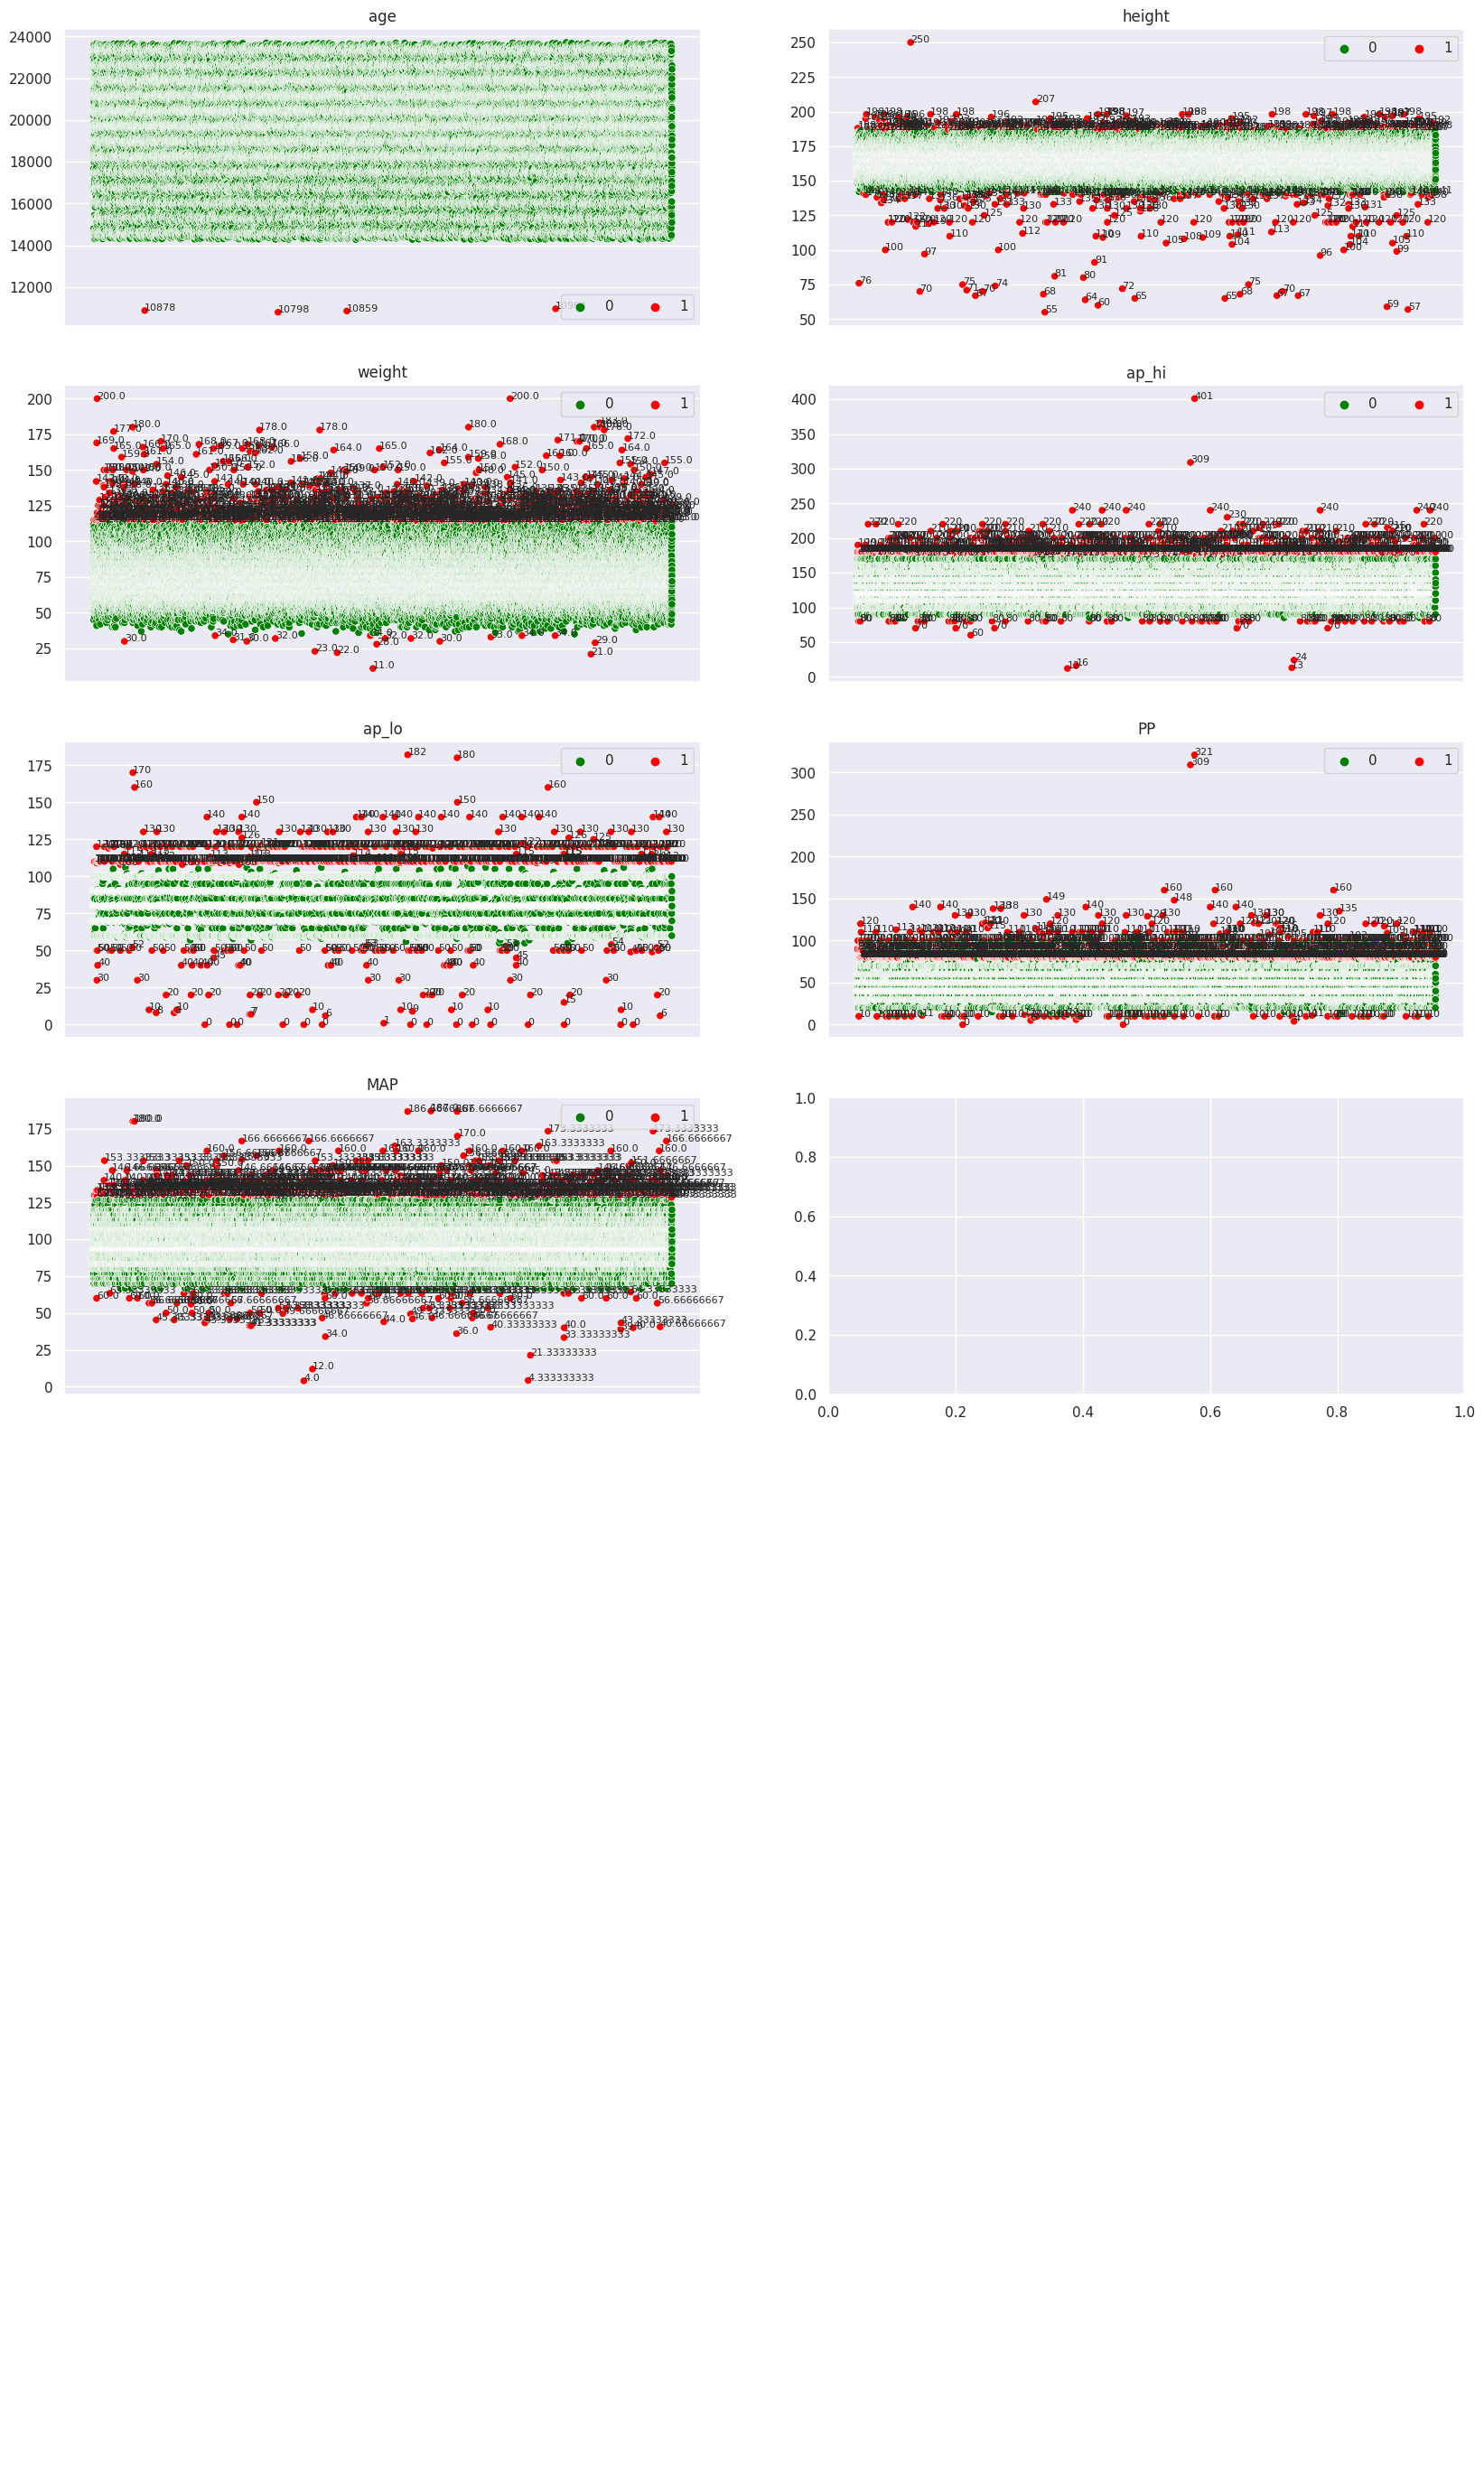

In [51]:
data_zscore = zscore_function(data)

*Z-Score*

Standerdized Data

In [52]:
X_train,X_test,Y_train,Y_test = find_train_test_split(data_zscore,0.3)
naive_bayes(X_train,X_test,Y_train,Y_test)

INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


-----------------Training Data Metrics : --------------------------------
Accuracy: 0.7209716030131992
Recall: 0.6159974360148345
f1: 0.6792719561760028
Precision: 0.7570335358991672
Confusion Matrix : 
[[19374  8387]
 [ 4318 13454]]

-------------------Testing Data Metrics-------------------
Confusion Matrix : 
[[8227 3638]
 [1842 5808]]
Accuracy: 0.7191903663848321
Recall: 0.6148634342578869
f1: 0.6794571829667759
Precision: 0.7592156862745097


Standardized Data + One Hot

In [53]:
data_zscore_one_hot = one_hot_encoding(data_zscore)
X_train,X_test,Y_train,Y_test = find_train_test_split2(data_zscore_one_hot,0.3)
naive_bayes(X_train,X_test,Y_train,Y_test)

INFO:sklearnex: sklearn.model_selection.train_test_split: fallback to original Scikit-learn
INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


-----------------Training Data Metrics : --------------------------------
Accuracy: 0.7169086157292514
Recall: 0.6113273201776476
f1: 0.6744456230742032
Precision: 0.752098236917704
Confusion Matrix : 
[[19291  8489]
 [ 4401 13352]]

-------------------Testing Data Metrics-------------------
Confusion Matrix : 
[[8182 3695]
 [1887 5751]]
Accuracy: 0.7139636177299513
Recall: 0.6088291340249842
f1: 0.6732615312573168
Precision: 0.7529457973291438


Standerdized Data + One Hot + PCA

In [54]:
data_zscore_one_hot_pca = one_hot_encoding(data_zscore)
X_train,X_test,Y_train,Y_test = find_train_test_split2(data_zscore_one_hot_pca,0.3)
X_train,X_test,Y_train,Y_test  = find_pca(X_train,X_test,Y_train,Y_test,GaussianNB())
naive_bayes(X_train,X_test,Y_train,Y_test)

INFO:sklearnex: sklearn.model_selection.train_test_split: fallback to original Scikit-learn
INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn


Fitting 5 folds for each of 15 candidates, totalling 75 fits


INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.transf

Optimal number of components: 3
Cross-validation score: 0.712889315934955


INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


-----------------Training Data Metrics : --------------------------------
Accuracy: 0.7126040454176092
Recall: 0.5841765486928254
f1: 0.6610195834628536
Precision: 0.7611406072898645
Confusion Matrix : 
[[19688  9082]
 [ 4004 12759]]

-------------------Testing Data Metrics-------------------
Confusion Matrix : 
[[8363 3943]
 [1706 5503]]
Accuracy: 0.7105303612605688
Recall: 0.5825746347660385
f1: 0.6608225758030621
Precision: 0.763351366347621


*LOF*

Standerdized Data

In [55]:
X_train,X_test,Y_train,Y_test = find_train_test_split(data_lof,0.3)
naive_bayes(X_train,X_test,Y_train,Y_test)

INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


-----------------Training Data Metrics : --------------------------------
Accuracy: 0.7278750714545549
Recall: 0.6422089305970918
f1: 0.7040104004748041
Precision: 0.7789730439677278
Confusion Matrix : 
[[15558  6939]
 [ 3534 12455]]

-------------------Testing Data Metrics-------------------
Confusion Matrix : 
[[6619 2894]
 [1545 5437]]
Accuracy: 0.7308881479236132
Recall: 0.6526227343656223
f1: 0.7101155880624306
Precision: 0.7787167000859353


Standerdized + One Hot Encoded Data

In [56]:
data_lof_one_hot = one_hot_encoding(data_lof)
X_train,X_test,Y_train,Y_test = find_train_test_split2(data_lof_one_hot,0.3)
naive_bayes(X_train,X_test,Y_train,Y_test)

INFO:sklearnex: sklearn.model_selection.train_test_split: fallback to original Scikit-learn
INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


-----------------Training Data Metrics : --------------------------------
Accuracy: 0.7238476329054722
Recall: 0.6400433123646488
f1: 0.7002312856095221
Precision: 0.7729140722291408
Confusion Matrix : 
[[15445  6981]
 [ 3647 12413]]

-------------------Testing Data Metrics-------------------
Confusion Matrix : 
[[6579 2942]
 [1585 5389]]
Accuracy: 0.7255531979387694
Recall: 0.6468611211139119
f1: 0.7042143090493302
Precision: 0.7727272727272727


Standerdized + One Hot Encoded Data + PCA

In [57]:
data_lof_one_hot_pca = one_hot_encoding(data_lof)
X_train,X_test,Y_train,Y_test = find_train_test_split2(data_lof_one_hot_pca,0.3)
X_train,X_test,Y_train,Y_test  = find_pca(X_train,X_test,Y_train,Y_test,GaussianNB())
naive_bayes(X_train,X_test,Y_train,Y_test)

INFO:sklearnex: sklearn.model_selection.train_test_split: fallback to original Scikit-learn
INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn


Fitting 5 folds for each of 15 candidates, totalling 75 fits


INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.transf

Optimal number of components: 3
Cross-validation score: 0.7212232208916343
-----------------Training Data Metrics : --------------------------------
Accuracy: 0.7214051863015123
Recall: 0.6374651954212643
f1: 0.6975287745429926
Precision: 0.7700884514762676
Confusion Matrix : 
[[15401  7031]
 [ 3691 12363]]

-------------------Testing Data Metrics-------------------
Confusion Matrix : 
[[6610 2896]
 [1554 5435]]
Accuracy: 0.7302212791755077
Recall: 0.6523826671468012
f1: 0.7095300261096606
Precision: 0.7776505937902418


**Logistic Regression**

*Z-Score*

Standerdized Data

In [58]:
X_train,X_test,Y_train,Y_test = find_train_test_split(data_zscore,0.3)
logistic_regression(X_train,X_test,Y_train,Y_test,0.5,None,None)

INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.linear_model.LogisticRegression.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict_proba: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validat

---------------Training Data Metrics-----------------------
Accuracy  =  0.724441613774625
Precision =  0.6480014651343803
Recall =  0.7444245739532926
F1 Score =  0.6928744523046042
[[18833  7688]
 [ 4859 14153]]
-------------------------Testing Data Metrics---------------------
Accuracy  =  0.7206764027671022
Precision =  0.6433410967605335
Recall =  0.7448216693222208
F1 Score =  0.6903720533939222
[[7987 3369]
 [2082 6077]]


Standerdized + One Hot Encoded Data

In [59]:
data_zscore_one_hot = one_hot_encoding(data_zscore)
X_train,X_test,Y_train,Y_test = find_train_test_split2(data_zscore_one_hot,0.3)
logistic_regression(X_train,X_test,Y_train,Y_test,0.5,None,None)

INFO:sklearnex: sklearn.model_selection.train_test_split: fallback to original Scikit-learn
INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.linear_model.LogisticRegression.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict_proba: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validati

---------------Training Data Metrics-----------------------
Accuracy  =  0.7251004765774274
Precision =  0.6470399706973123
Recall =  0.7461457233368533
F1 Score =  0.6930678502243691
[[18884  7709]
 [ 4808 14132]]
-------------------------Testing Data Metrics---------------------
Accuracy  =  0.7219574686138868
Precision =  0.6438704213423672
Recall =  0.7468074656188605
F1 Score =  0.691529277998863
[[8007 3364]
 [2062 6082]]


Standerdized + One Hot + PCA

In [60]:
data_zscore_one_hot_pca = one_hot_encoding(data_zscore)
X_train,X_test,Y_train,Y_test = find_train_test_split2(data_zscore_one_hot_pca,0.3)
X_train,X_test,Y_train,Y_test  = find_pca(X_train,X_test,Y_train,Y_test,LogisticRegression())
logistic_regression(X_train,X_test,Y_train,Y_test,0.5,None,None)

INFO:sklearnex: sklearn.model_selection.train_test_split: fallback to original Scikit-learn
INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sk

Fitting 5 folds for each of 15 candidates, totalling 75 fits


INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearn

Optimal number of components: 13
Cross-validation score: 0.724814696042036
---------------Training Data Metrics-----------------------
Accuracy  =  0.7251004765774274
Precision =  0.6470399706973123
Recall =  0.7461457233368533
F1 Score =  0.6930678502243691
[[18884  7709]
 [ 4808 14132]]
-------------------------Testing Data Metrics---------------------
Accuracy  =  0.7219574686138868
Precision =  0.6438704213423672
Recall =  0.7468074656188605
F1 Score =  0.691529277998863
[[8007 3364]
 [2062 6082]]


*LOF*

Standerdized Data

In [61]:
X_train,X_test,Y_train,Y_test = find_train_test_split(data_lof,0.3)
logistic_regression(X_train,X_test,Y_train,Y_test,0.5,None,None)

INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.linear_model.LogisticRegression.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict_proba: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validat

---------------Training Data Metrics-----------------------
Accuracy  =  0.7322143116977602
Precision =  0.684747860162937
Recall =  0.76007326007326
F1 Score =  0.7204470243584875
[[14900  6114]
 [ 4192 13280]]
-------------------------Testing Data Metrics---------------------
Accuracy  =  0.7349499848438921
Precision =  0.6937942623934702
Recall =  0.7604262597026707
F1 Score =  0.7255837308561387
[[6343 2551]
 [1821 5780]]


Standerdized Data with Hyper parameter Tuning

In [62]:
optimal_c,optimal_solver = logistic_grid_search(X_train,Y_train)
logistic_regression(X_train,X_test,Y_train,Y_test,0.5,optimal_c,optimal_solver)

INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn


Fitting 5 folds for each of 25 candidates, totalling 125 fits


INFO:sklearnex: sklearn.linear_model.LogisticRegression.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict: running accelerated version on CPU
INFO:sklearnex: skle

Optimal C =  0.1
Optimal Solver =  liblinear
---------------Training Data Metrics-----------------------
Accuracy  =  0.732058410850699
Precision =  0.6845416108074662
Recall =  0.759931310818546
F1 Score =  0.7202690972222223
[[14898  6118]
 [ 4194 13276]]
-------------------------Testing Data Metrics---------------------
Accuracy  =  0.735071233707184
Precision =  0.6939142960028808
Recall =  0.7605578213392975
F1 Score =  0.7257092643735878
[[6344 2550]
 [1820 5781]]


Standarderdized Data + One Hot Encoded Data

In [63]:
data_lof_one_hot = one_hot_encoding(data_lof)
X_train,X_test,Y_train,Y_test = find_train_test_split2(data_lof_one_hot,0.3)
logistic_regression(X_train,X_test,Y_train,Y_test,0.5,None,None)

INFO:sklearnex: sklearn.model_selection.train_test_split: fallback to original Scikit-learn
INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.linear_model.LogisticRegression.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict_proba: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validati

---------------Training Data Metrics-----------------------
Accuracy  =  0.7322922621212908
Precision =  0.684077549757657
Recall =  0.7605916413460987
F1 Score =  0.7203083855905746
[[14916  6127]
 [ 4176 13267]]
-------------------------Testing Data Metrics---------------------
Accuracy  =  0.7361018490451652
Precision =  0.6936742287840595
Recall =  0.762401055408971
F1 Score =  0.726415687260386
[[6363 2552]
 [1801 5779]]


Standerdized + One Hot Encoded Data + PCA

In [64]:
data_lof_one_hot_pca = one_hot_encoding(data_lof)
X_train,X_test,Y_train,Y_test = find_train_test_split2(data_lof_one_hot_pca,0.3)
X_train_log,X_test_log,Y_train_log,Y_test_log  = find_pca(X_train,X_test,Y_train,Y_test,LogisticRegression())
logistic_regression(X_train_log,X_test_log,Y_train_log,Y_test_log,0.5,None,None)

INFO:sklearnex: sklearn.model_selection.train_test_split: fallback to original Scikit-learn
INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sk

Fitting 5 folds for each of 15 candidates, totalling 75 fits


INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.linear_model.LogisticRegression.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.linear_model.LogisticRegression.fit: running accelerated version on CPU
INFO:sklearnex: sklearn

[CV 1/5] END ...............pca__n_components=1;, score=0.716 total time=   0.2s
[CV 5/5] END ...............pca__n_components=1;, score=0.703 total time=   0.2s
[CV 1/5] END ...............pca__n_components=3;, score=0.720 total time=   0.2s
[CV 5/5] END ...............pca__n_components=3;, score=0.705 total time=   0.2s
[CV 4/5] END ...............pca__n_components=4;, score=0.709 total time=   0.2s
[CV 3/5] END ...............pca__n_components=5;, score=0.700 total time=   0.2s
[CV 2/5] END ...............pca__n_components=6;, score=0.719 total time=   0.2s
[CV 1/5] END ...............pca__n_components=7;, score=0.720 total time=   0.2s
[CV 5/5] END ...............pca__n_components=7;, score=0.706 total time=   0.2s
[CV 4/5] END ...............pca__n_components=8;, score=0.712 total time=   0.2s
[CV 3/5] END ...............pca__n_components=9;, score=0.695 total time=   0.2s
[CV 2/5] END ..............pca__n_components=10;, score=0.708 total time=   0.2s
[CV 1/5] END ..............p

INFO:sklearnex: sklearn.linear_model.LogisticRegression.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.linear_model.LogisticRegression.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sk

[CV 2/5] END ...............pca__n_components=1;, score=0.714 total time=   0.2s
[CV 1/5] END ...............pca__n_components=2;, score=0.718 total time=   0.2s
[CV 5/5] END ...............pca__n_components=2;, score=0.704 total time=   0.2s
[CV 3/5] END ...............pca__n_components=3;, score=0.706 total time=   0.2s
[CV 2/5] END ...............pca__n_components=4;, score=0.716 total time=   0.2s
[CV 1/5] END ...............pca__n_components=5;, score=0.718 total time=   0.2s
[CV 5/5] END ...............pca__n_components=5;, score=0.704 total time=   0.2s
[CV 4/5] END ...............pca__n_components=6;, score=0.707 total time=   0.2s
[CV 3/5] END ...............pca__n_components=7;, score=0.701 total time=   0.2s
[CV 2/5] END ...............pca__n_components=8;, score=0.720 total time=   0.2s
[CV 1/5] END ...............pca__n_components=9;, score=0.704 total time=   0.2s
[CV 5/5] END ...............pca__n_components=9;, score=0.695 total time=   0.2s
[CV 4/5] END ..............p

INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.linear_model.LogisticRegression.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.linear_model.LogisticRegression.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: 

[CV 4/5] END ...............pca__n_components=1;, score=0.704 total time=   0.2s
[CV 3/5] END ...............pca__n_components=2;, score=0.703 total time=   0.2s
[CV 2/5] END ...............pca__n_components=3;, score=0.723 total time=   0.2s
[CV 1/5] END ...............pca__n_components=4;, score=0.718 total time=   0.2s
[CV 5/5] END ...............pca__n_components=4;, score=0.701 total time=   0.2s
[CV 4/5] END ...............pca__n_components=5;, score=0.706 total time=   0.2s
[CV 3/5] END ...............pca__n_components=6;, score=0.699 total time=   0.2s
[CV 2/5] END ...............pca__n_components=7;, score=0.720 total time=   0.2s
[CV 1/5] END ...............pca__n_components=8;, score=0.718 total time=   0.2s
[CV 5/5] END ...............pca__n_components=8;, score=0.706 total time=   0.2s
[CV 4/5] END ...............pca__n_components=9;, score=0.702 total time=   0.2s
[CV 3/5] END ..............pca__n_components=10;, score=0.694 total time=   0.2s
[CV 2/5] END ..............p

INFO:sklearnex: sklearn.linear_model.LogisticRegression.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.fit: running accelerated ver

Optimal number of components: 13
Cross-validation score: 0.7323443053076153
---------------Training Data Metrics-----------------------
Accuracy  =  0.7322662786467806
Precision =  0.6840259874187893
Recall =  0.760577915376677
F1 Score =  0.7202736453469432
[[14916  6128]
 [ 4176 13266]]
-------------------------Testing Data Metrics---------------------
Accuracy  =  0.7361018490451652
Precision =  0.6936742287840595
Recall =  0.762401055408971
F1 Score =  0.726415687260386
[[6363 2552]
 [1801 5779]]


Standerdized + One Hot Encoded Data + PCA with hyper parameter tuning

In [65]:
optimal_c,optimal_solver = logistic_grid_search(X_train_log,Y_train_log)
logistic_regression(X_train_log,X_test_log,Y_train_log,Y_test_log,0.5,optimal_c,optimal_solver)

INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn


Fitting 5 folds for each of 25 candidates, totalling 125 fits


INFO:sklearnex: sklearn.linear_model.LogisticRegression.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.

[CV 3/5] END ...............pca__n_components=1;, score=0.702 total time=   0.2s
[CV 2/5] END ...............pca__n_components=2;, score=0.717 total time=   0.2s
[CV 4/5] END ...............pca__n_components=2;, score=0.705 total time=   0.2s
[CV 4/5] END ...............pca__n_components=3;, score=0.710 total time=   0.2s
[CV 3/5] END ...............pca__n_components=4;, score=0.702 total time=   0.2s
[CV 2/5] END ...............pca__n_components=5;, score=0.718 total time=   0.2s
[CV 1/5] END ...............pca__n_components=6;, score=0.718 total time=   0.2s
[CV 5/5] END ...............pca__n_components=6;, score=0.703 total time=   0.2s
[CV 4/5] END ...............pca__n_components=7;, score=0.707 total time=   0.2s
[CV 3/5] END ...............pca__n_components=8;, score=0.700 total time=   0.2s
[CV 2/5] END ...............pca__n_components=9;, score=0.708 total time=   0.2s
[CV 1/5] END ..............pca__n_components=10;, score=0.704 total time=   0.2s
[CV 5/5] END ..............p

INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.fit: fallback to original Scikit-learn
INFO:sklearnex:

Optimal C =  10
Optimal Solver =  newton-cg
---------------Training Data Metrics-----------------------
Accuracy  =  0.7322922621212908
Precision =  0.6840259874187893
Recall =  0.7606215239951838
F1 Score =  0.7202931994027418
[[14917  6128]
 [ 4175 13266]]
-------------------------Testing Data Metrics---------------------
Accuracy  =  0.7362230979084571
Precision =  0.6939142960028808
Recall =  0.7624637298865735
F1 Score =  0.7265757556714637
[[6363 2550]
 [1801 5781]]


**Support Vector Machine**


*Z-Score*

Standardized Data

In [66]:
X_train,X_test,Y_train,Y_test = find_train_test_split(data_zscore,0.3)
SVM_generic(X_train,X_test,Y_train,Y_test,'rbf',None)

INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.svm.SVC.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.svm.SVC.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.svm.SVC.predict: running accelerated version on CPU
INFO:sklearnex:

---------------Training Data Metrics-----------------------
Accuracy  =  0.7312059385500626
Precision =  0.6391648734032325
Recall =  0.7620919314335626
F1 Score =  0.6952364351701984
[[19334  7881]
 [ 4358 13960]]
-------------------------Testing Data Metrics---------------------
Accuracy  =  0.7281065846784525
Precision =  0.6338132542875291
Recall =  0.7642328312484044
F1 Score =  0.6929398148148148
[[8222 3459]
 [1847 5987]]


Standarderdized Data + One Hot Encoded

In [67]:
data_zscore_one_hot = one_hot_encoding(data_zscore)
X_train,X_test,Y_train,Y_test = find_train_test_split2(data_zscore_one_hot,0.3)
SVM_generic(X_train,X_test,Y_train,Y_test,'rbf',None)

INFO:sklearnex: sklearn.model_selection.train_test_split: fallback to original Scikit-learn
INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.svm.SVC.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.svm.SVC.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.svm.SVC.predict: running accelerated version on CPU
INFO:sklearnex: 

---------------Training Data Metrics-----------------------
Accuracy  =  0.7325236641556673
Precision =  0.6451169818231766
Recall =  0.7608813046765309
F1 Score =  0.6982333556331921
[[19264  7751]
 [ 4428 14090]]
-------------------------Testing Data Metrics---------------------
Accuracy  =  0.7274404304381246
Precision =  0.6393182299385983
Recall =  0.7595271035089926
F1 Score =  0.6942576306259699
[[8157 3407]
 [1912 6039]]


Standarderdized Data + One Hot Encoded + PCA

In [68]:
data_zscore_one_hot_pca = one_hot_encoding(data_zscore)
X_train,X_test,Y_train,Y_test = find_train_test_split2(data_zscore_one_hot_pca,0.3)
X_train,X_test,Y_train,Y_test  = find_pca(X_train,X_test,Y_train,Y_test,SVC(kernel='rbf'))
SVM_generic(X_train,X_test,Y_train,Y_test,'rbf',None)

INFO:sklearnex: sklearn.model_selection.train_test_split: fallback to original Scikit-learn
INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.svm.SVC.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-lea

Fitting 5 folds for each of 15 candidates, totalling 75 fits


INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.svm.SVC.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.svm.SVC.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.svm.SVC.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: 

Optimal number of components: 14
Cross-validation score: 0.7284165213383863


INFO:sklearnex: sklearn.svm.SVC.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.svm.SVC.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


---------------Training Data Metrics-----------------------
Accuracy  =  0.733072716491336
Precision =  0.6458037635639394
Recall =  0.7614857204556498
F1 Score =  0.6988901000891884
[[19274  7736]
 [ 4418 14105]]
-------------------------Testing Data Metrics---------------------
Accuracy  =  0.7276966436074814
Precision =  0.6396358246876985
Recall =  0.7598088531187123
F1 Score =  0.6945625934015404
[[8159 3404]
 [1910 6042]]


*LOF*

Standerdized Data

In [69]:
X_train,X_test,Y_train,Y_test = find_train_test_split(data_lof,0.3)
SVM_generic(X_train,X_test,Y_train,Y_test,'rbf',None)

INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.svm.SVC.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.svm.SVC.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.svm.SVC.predict: running accelerated version on CPU
INFO:sklearnex:

---------------Training Data Metrics-----------------------
Accuracy  =  0.7366574858390064
Precision =  0.6824275549138908
Recall =  0.7689849514845157
F1 Score =  0.7231252561125528
[[15116  6159]
 [ 3976 13235]]
-------------------------Testing Data Metrics---------------------
Accuracy  =  0.7388299484692331
Precision =  0.6919937582523107
Recall =  0.7679499134141468
F1 Score =  0.7279959590857431
[[6422 2566]
 [1742 5765]]


Standerdized Data with Hyper Parameter Tuning

In [70]:
optimal_C,optimal_kernel = SVM_gridcv(X_train,X_test,Y_train,Y_test)
SVM_generic(X_train,X_test,Y_train,Y_test,optimal_kernel,optimal_C)

INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.svm.SVC.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.svm.SVC.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.svm.SVC.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.svm.SVC.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.svm.SVC.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.svm.SVC.fit: running accelerated vers

[CV 3/5] END ..............pca__n_components=10;, score=0.728 total time=   0.1s
[CV 3/5] END ..............pca__n_components=11;, score=0.729 total time=   0.2s
[CV 4/5] END ..............pca__n_components=11;, score=0.734 total time=   0.2s
[CV 3/5] END ..............pca__n_components=13;, score=0.732 total time=   0.1s
[CV 4/5] END ..............pca__n_components=13;, score=0.737 total time=   0.1s
[CV 1/5] END ..............pca__n_components=15;, score=0.729 total time=   0.1s
[CV 2/5] END ..............pca__n_components=15;, score=0.732 total time=   0.1s
[CV 1/5] END ..........C=0.01, solver=newton-cg;, score=0.729 total time=   0.1s
[CV 5/5] END ..........C=0.01, solver=newton-cg;, score=0.732 total time=   0.1s
[CV 3/5] END ..........C=0.01, solver=liblinear;, score=0.730 total time=   0.2s
[CV 4/5] END ..........C=0.01, solver=liblinear;, score=0.736 total time=   0.1s
[CV 1/5] END ...............C=0.01, solver=saga;, score=0.729 total time=   0.2s
[CV 2/5] END ...............

INFO:sklearnex: sklearn.svm.SVC.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.svm.SVC.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.svm.SVC.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn


Optimal value of C = 10
Optimal value of kernel = rbf


INFO:sklearnex: sklearn.svm.SVC.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.svm.SVC.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


---------------Training Data Metrics-----------------------
Accuracy  =  0.7408668087096607
Precision =  0.6859337939568939
Recall =  0.7741053244108234
F1 Score =  0.7273572268241342
[[15210  6091]
 [ 3882 13303]]
-------------------------Testing Data Metrics---------------------
Accuracy  =  0.740284934828736
Precision =  0.6921137918617213
Recall =  0.7703406813627255
F1 Score =  0.7291350531107739
[[6445 2565]
 [1719 5766]]


Standarderdized Data + One Hot Encoded

In [71]:
data_lof_one_hot = one_hot_encoding(data_lof)
X_train,X_test,Y_train,Y_test = find_train_test_split2(data_lof_one_hot,0.3)
SVM_generic(X_train,X_test,Y_train,Y_test,'rbf',None)

INFO:sklearnex: sklearn.model_selection.train_test_split: fallback to original Scikit-learn
INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.svm.SVC.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.svm.SVC.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.svm.SVC.predict: running accelerated version on CPU
INFO:sklearnex: 

---------------Training Data Metrics-----------------------
Accuracy  =  0.7382164943096191
Precision =  0.6858822316180262
Recall =  0.769568990454151
F1 Score =  0.7253196652035224
[[15109  6092]
 [ 3983 13302]]
-------------------------Testing Data Metrics---------------------
Accuracy  =  0.7391936950591088
Precision =  0.694514464049934
Recall =  0.7670688055150471
F1 Score =  0.7289908025702407
[[6407 2545]
 [1757 5786]]


Standerdized Data + One Hot Encoded + PCA

In [72]:
data_lof_one_hot_pca = one_hot_encoding(data_lof)
X_train,X_test,Y_train,Y_test = find_train_test_split2(data_lof_one_hot_pca,0.3)
X_train_svm,X_test_svm,Y_train_svm,Y_test_svm  = find_pca(X_train,X_test,Y_train,Y_test,SVC(kernel='rbf'))
SVM_generic(X_train_svm,X_test_svm,Y_train_svm,Y_test_svm,'rbf',None)

INFO:sklearnex: sklearn.model_selection.train_test_split: fallback to original Scikit-learn
INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn


Fitting 5 folds for each of 15 candidates, totalling 75 fits


INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.svm.SVC.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.svm.SVC.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.svm.SVC.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.svm.SVC.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.

Optimal number of components: 13
Cross-validation score: 0.736007945519562


INFO:sklearnex: sklearn.svm.SVC.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.svm.SVC.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


---------------Training Data Metrics-----------------------
Accuracy  =  0.7383723951566804
Precision =  0.68691347839538
Recall =  0.7692130030602229
F1 Score =  0.7257374771879171
[[15095  6072]
 [ 3997 13322]]
-------------------------Testing Data Metrics---------------------
Accuracy  =  0.738890572900879
Precision =  0.6949945984875765
Recall =  0.766278454208576
F1 Score =  0.7288978410020771
[[6398 2541]
 [1766 5790]]


Standerdized + One Hot + PCA with Hyper Parameter Tuning

In [73]:
optimal_C,optimal_kernel = SVM_gridcv(X_train_svm,X_test_svm,Y_train_svm,Y_test_svm)
SVM_generic(X_train_svm,X_test_svm,Y_train_svm,Y_test_svm,optimal_kernel,optimal_C)

INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.svm.SVC.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.svm.SVC.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.svm.SVC.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.svm.SVC.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.svm.SVC.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.svm.SVC.fit: running accelerated vers

Optimal value of C = 1
Optimal value of kernel = rbf


INFO:sklearnex: sklearn.svm.SVC.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.svm.SVC.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


---------------Training Data Metrics-----------------------
Accuracy  =  0.7383723951566804
Precision =  0.68691347839538
Recall =  0.7692130030602229
F1 Score =  0.7257374771879171
[[15095  6072]
 [ 3997 13322]]
-------------------------Testing Data Metrics---------------------
Accuracy  =  0.738890572900879
Precision =  0.6949945984875765
Recall =  0.766278454208576
F1 Score =  0.7288978410020771
[[6398 2541]
 [1766 5790]]


**Decision Tree**

*Z-Score*

Standerdized Data

In [74]:
X_train,X_test,Y_train,Y_test = find_train_test_split(data_zscore,0.3)
DTCgeneric(X_train,X_test,Y_train,Y_test,4,7,3)

INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


---------------Training Data Metrics-----------------------
Accuracy  =  0.7255397184459623
Precision =  0.7031729316423241
Recall =  0.7186037806475762
F1 Score =  0.7108046189803995
[[17678  6483]
 [ 6014 15358]]
-------------------------Testing Data Metrics---------------------
Accuracy  =  0.7226236228542147
Precision =  0.6965911496929917
Recall =  0.7209378766297798
F1 Score =  0.7085554299251602
[[7522 2866]
 [2547 6580]]


Standerdized Data + One Hot Encoded

In [75]:
data_zscore_one_hot = one_hot_encoding(data_zscore)
X_train,X_test,Y_train,Y_test = find_train_test_split2(data_zscore_one_hot,0.3)
DTCgeneric(X_train,X_test,Y_train,Y_test,4,7,3)

INFO:sklearnex: sklearn.model_selection.train_test_split: fallback to original Scikit-learn
INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


---------------Training Data Metrics-----------------------
Accuracy  =  0.7255177563525356
Precision =  0.7032645025410924
Recall =  0.7185292604200777
F1 Score =  0.710814938220186
[[17675  6481]
 [ 6017 15360]]
-------------------------Testing Data Metrics---------------------
Accuracy  =  0.7227261081219575
Precision =  0.6969087444420919
Recall =  0.7209506078195159
F1 Score =  0.7087258437853259
[[7521 2863]
 [2548 6583]]


Standerdized Data + One Hot Encoded + PCA

In [76]:
data_zscore_one_hot_pca = one_hot_encoding(data_zscore)
X_train,X_test,Y_train,Y_test = find_train_test_split2(data_zscore_one_hot_pca,0.3)
X_train,X_test,Y_train,Y_test  = find_pca(X_train,X_test,Y_train,Y_test,DecisionTreeClassifier(random_state=42))
DTCgeneric(X_train,X_test,Y_train,Y_test,4,7,3)

INFO:sklearnex: sklearn.model_selection.train_test_split: fallback to original Scikit-learn
INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn


Fitting 5 folds for each of 15 candidates, totalling 75 fits


INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit: f

[CV 3/5] END ...............pca__n_components=9;, score=0.727 total time=   0.2s
[CV 4/5] END ...............pca__n_components=9;, score=0.733 total time=   0.2s
[CV 1/5] END ..............pca__n_components=11;, score=0.728 total time=   0.2s
[CV 2/5] END ..............pca__n_components=11;, score=0.728 total time=   0.2s
[CV 4/5] END ..............pca__n_components=12;, score=0.735 total time=   0.1s
[CV 5/5] END ..............pca__n_components=12;, score=0.732 total time=   0.1s
[CV 2/5] END ..............pca__n_components=14;, score=0.732 total time=   0.0s
[CV 3/5] END ..............pca__n_components=14;, score=0.732 total time=   0.0s
[CV 3/5] END ..............pca__n_components=15;, score=0.732 total time=   0.1s
[CV 4/5] END ..............pca__n_components=15;, score=0.737 total time=   0.1s
[CV 4/5] END ..........C=0.01, solver=newton-cg;, score=0.736 total time=   0.2s
[CV 2/5] END ..............C=0.01, solver=lbfgs;, score=0.730 total time=   0.0s
[CV 1/5] END ..........C=0.0

INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fit_tr

Optimal number of components: 14
Cross-validation score: 0.632486218041113


INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


---------------Training Data Metrics-----------------------
Accuracy  =  0.7233654711967145
Precision =  0.6984570303557529
Recall =  0.7173759699035974
F1 Score =  0.7077900988261494
[[17682  6586]
 [ 6010 15255]]
-------------------------Testing Data Metrics---------------------
Accuracy  =  0.7173456315654625
Precision =  0.6907685792928223
Recall =  0.7154605263157895
F1 Score =  0.7028977701174189
[[7474 2921]
 [2595 6525]]


*LOF*

Standerdized Data

In [77]:
X_train,X_test,Y_train,Y_test = find_train_test_split(data_lof,0.3)
DTCgeneric(X_train,X_test,Y_train,Y_test,4,7,3)

INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


---------------Training Data Metrics-----------------------
Accuracy  =  0.7347866756742711
Precision =  0.726307105290296
Recall =  0.7419541743481696
F1 Score =  0.7340472654316162
[[14193  5308]
 [ 4899 14086]]
-------------------------Testing Data Metrics---------------------
Accuracy  =  0.7387693240375871
Precision =  0.7354459248589605
Recall =  0.744290573372206
F1 Score =  0.739841816096118
[[6059 2204]
 [2105 6127]]


Standerdized Data + Hyper Parameter Tuning

In [78]:
optimal_max_depth,optimal_min_samples,optimal_min_samples_leaf = DTC_gridcv(X_train,X_test,Y_train,Y_test)
DTCgeneric(X_train,X_test,Y_train,Y_test,optimal_max_depth,optimal_min_samples,optimal_min_samples_leaf)

INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


Optimal value of max depth = 5
Optimal value of min samples split = 10
Optimal value of min samples leaf = 4
---------------Training Data Metrics-----------------------
Accuracy  =  0.7356960972821286
Precision =  0.7253789831906775
Recall =  0.7437876705086179
F1 Score =  0.734467996240994
[[14246  5326]
 [ 4846 14068]]
-------------------------Testing Data Metrics---------------------
Accuracy  =  0.7385268263110033
Precision =  0.7329252190613372
Recall =  0.7451793995606542
F1 Score =  0.739001512859304
[[6076 2225]
 [2088 6106]]


Standarderdized Data + One Hot Encoded

In [79]:
data_lof_one_hot = one_hot_encoding(data_lof)
X_train,X_test,Y_train,Y_test = find_train_test_split2(data_lof_one_hot,0.3)
DTCgeneric(X_train,X_test,Y_train,Y_test,4,7,3)

INFO:sklearnex: sklearn.model_selection.train_test_split: fallback to original Scikit-learn
INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


---------------Training Data Metrics-----------------------
Accuracy  =  0.7347866756742711
Precision =  0.726307105290296
Recall =  0.7419541743481696
F1 Score =  0.7340472654316162
[[14193  5308]
 [ 4899 14086]]
-------------------------Testing Data Metrics---------------------
Accuracy  =  0.7387693240375871
Precision =  0.7354459248589605
Recall =  0.744290573372206
F1 Score =  0.739841816096118
[[6059 2204]
 [2105 6127]]


Standerdized Data + One Hot Encoded + PCA

In [80]:
data_zscore_one_hot = one_hot_encoding(data_zscore)
X_train,X_test,Y_train,Y_test = find_train_test_split2(data_zscore_one_hot,0.3)
X_train_dt,X_test_dt,Y_train_dt,Y_test_dt  = find_pca(X_train,X_test,Y_train,Y_test,DecisionTreeClassifier(random_state=42,max_depth=4,min_samples_split=7,min_samples_leaf=3))
DTCgeneric(X_train_dt,X_test_dt,Y_train_dt,Y_test_dt,4,7,3)

INFO:sklearnex: sklearn.model_selection.train_test_split: fallback to original Scikit-learn
INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sk

Fitting 5 folds for each of 15 candidates, totalling 75 fits


INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_trans

Optimal number of components: 12
Cross-validation score: 0.7215205218982914


INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


---------------Training Data Metrics-----------------------
Accuracy  =  0.7233654711967145
Precision =  0.6984570303557529
Recall =  0.7173759699035974
F1 Score =  0.7077900988261494
[[17682  6586]
 [ 6010 15255]]
-------------------------Testing Data Metrics---------------------
Accuracy  =  0.7173456315654625
Precision =  0.6907685792928223
Recall =  0.7154605263157895
F1 Score =  0.7028977701174189
[[7474 2921]
 [2595 6525]]


Standerdized Data + One Hot Encoded + PCA with Hyper Parameter Tuning

In [81]:
optimal_max_depth,optimal_min_samples,optimal_min_samples_leaf = DTC_gridcv(X_train_dt,X_test_dt,Y_train_dt,Y_test_dt)
DTCgeneric(X_train_dt,X_test_dt,Y_train_dt,Y_test_dt,optimal_max_depth,optimal_min_samples,optimal_min_samples_leaf)

INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn


Optimal value of max depth = 7
Optimal value of min samples split = 5
Optimal value of min samples leaf = 1


INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


---------------Training Data Metrics-----------------------
Accuracy  =  0.737465135176685
Precision =  0.67359553134014
Recall =  0.7530327071710089
F1 Score =  0.711102518246411
[[18867  7129]
 [ 4825 14712]]
-------------------------Testing Data Metrics---------------------
Accuracy  =  0.7229823212913143
Precision =  0.6596442938810079
Recall =  0.7398480170980765
F1 Score =  0.6974479516453996
[[7878 3215]
 [2191 6231]]


**Random Forest**

*Z-Score*

Standerdized

In [82]:
X_train,X_test,Y_train,Y_test = find_train_test_split(data_zscore,0.3)
rf=random_forest(X_train,Y_train,X_test,Y_test,best_params=None)

INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomFore

---------------Training Data Metrics-----------------------
Accuracy  =  0.9980673357784464
Precision =  0.9969323748912595
Recall =  0.999036476256022
F1 Score =  0.9979833165276377
[[23671    67]
 [   21 21774]]
-------------------------Testing Data Metrics---------------------
Accuracy  =  0.7045862157314886
Precision =  0.6717128943468135
Recall =  0.7042957042957043
F1 Score =  0.6876185315632619


Standerdized + One Hot

In [83]:
data_zscore_one_hot = one_hot_encoding(data_zscore)
X_train,X_test,Y_train,Y_test = find_train_test_split2(data_zscore_one_hot,0.3)
rf=random_forest(X_train,Y_train,X_test,Y_test,best_params=None)

INFO:sklearnex: sklearn.model_selection.train_test_split: fallback to original Scikit-learn
INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomFores

---------------Training Data Metrics-----------------------
Accuracy  =  0.9978037906573255
Precision =  0.9966576621949544
Recall =  0.9987611837577426
F1 Score =  0.9977083142359519
[[23665    73]
 [   27 21768]]
-------------------------Testing Data Metrics---------------------
Accuracy  =  0.7060210094798872
Precision =  0.6720304890959136
Recall =  0.7063536218982975
F1 Score =  0.6887647154559756


Standerdized + One Hot + PCA

In [84]:
# data_zscore_one_hot = one_hot_encoding(data_zscore)
# X_train,X_test,Y_train,Y_test = find_train_test_split2(data_zscore_one_hot,0.3)
# X_train,X_test,Y_train,Y_test  = find_pca(X_train,X_test,Y_train,Y_test,RandomForestClassifier(n_jobs=-1))
# rf=random_forest(X_train,Y_train,X_test,Y_test,best_params=None)

*LOF*

Standerdized

In [85]:
X_train,X_test,Y_train,Y_test = find_train_test_split(data_lof,0.3)
rf=random_forest(X_train,Y_train,X_test,Y_test,best_params=None)

INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomFore

---------------Training Data Metrics-----------------------
Accuracy  =  0.9978693550901626
Precision =  0.9967515726513355
Recall =  0.9990180878552971
F1 Score =  0.997883543258311
[[19073    63]
 [   19 19331]]
-------------------------Testing Data Metrics---------------------
Accuracy  =  0.7152470445589573
Precision =  0.7170807826191333
Recall =  0.7185470291075294
F1 Score =  0.7178131571042355


Standerdized with Hyper Parameter Tuning

In [86]:
grid_search = rf_grid(X_train,Y_train)
rf = random_forest(X_train,Y_train,X_test,Y_test,grid_search.best_params_)

INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn


Fitting 5 folds for each of 72 candidates, totalling 360 fits


INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.

[CV 4/5] END ..............pca__n_components=10;, score=0.632 total time=   1.5s
[CV 3/5] END ..............pca__n_components=11;, score=0.633 total time=   1.7s
[CV 2/5] END ..............pca__n_components=12;, score=0.632 total time=   2.0s
[CV 1/5] END ..............pca__n_components=13;, score=0.636 total time=   1.8s
[CV 5/5] END ..............pca__n_components=13;, score=0.628 total time=   1.8s
[CV 4/5] END ..............pca__n_components=14;, score=0.632 total time=   1.8s
[CV 3/5] END ..............pca__n_components=15;, score=0.631 total time=   1.6s
[CV 1/5] END ...............pca__n_components=1;, score=0.719 total time=   0.2s
[CV 5/5] END ...............pca__n_components=1;, score=0.706 total time=   0.2s
[CV 5/5] END ...............pca__n_components=2;, score=0.700 total time=   0.2s
[CV 3/5] END ...............pca__n_components=3;, score=0.711 total time=   0.2s
[CV 2/5] END ...............pca__n_components=4;, score=0.721 total time=   0.3s
[CV 1/5] END ...............

/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU


[CV 2/5] END ...............pca__n_components=1;, score=0.711 total time= 2.0min
[CV 2/5] END ...............pca__n_components=2;, score=0.712 total time=  40.0s
[CV 4/5] END ...............pca__n_components=2;, score=0.718 total time= 1.1min
[CV 3/5] END ...............pca__n_components=3;, score=0.730 total time=  39.8s
[CV 3/5] END ...............pca__n_components=4;, score=0.727 total time=  42.5s
[CV 2/5] END ...............pca__n_components=5;, score=0.724 total time=  34.8s
[CV 1/5] END ...............pca__n_components=6;, score=0.730 total time=  35.9s
[CV 5/5] END ...............pca__n_components=6;, score=0.729 total time=  32.9s
[CV 4/5] END ...............pca__n_components=7;, score=0.729 total time=  32.4s
[CV 2/5] END ...............pca__n_components=8;, score=0.730 total time=  33.1s
[CV 1/5] END ...............pca__n_components=9;, score=0.733 total time=  30.0s
[CV 5/5] END ...............pca__n_components=9;, score=0.732 total time=  32.2s
[CV 4/5] END ..............p

INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: skle

[CV 4/5] END ...............pca__n_components=1;, score=0.613 total time=   0.5s
[CV 2/5] END ...............pca__n_components=4;, score=0.624 total time=   0.7s
[CV 1/5] END ...............pca__n_components=5;, score=0.629 total time=   1.0s
[CV 1/5] END ...............pca__n_components=6;, score=0.618 total time=   1.0s
[CV 5/5] END ...............pca__n_components=6;, score=0.630 total time=   1.0s
[CV 4/5] END ...............pca__n_components=7;, score=0.620 total time=   1.1s
[CV 3/5] END ...............pca__n_components=8;, score=0.621 total time=   1.2s
[CV 2/5] END ...............pca__n_components=9;, score=0.633 total time=   1.4s
[CV 1/5] END ..............pca__n_components=10;, score=0.630 total time=   1.5s
[CV 5/5] END ..............pca__n_components=10;, score=0.628 total time=   1.5s
[CV 4/5] END ..............pca__n_components=11;, score=0.634 total time=   1.9s
[CV 3/5] END ..............pca__n_components=12;, score=0.631 total time=   2.1s
[CV 2/5] END ..............p

INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: skle

[CV 2/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=100;, score=0.726 total time=   6.0s
[CV 5/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=100;, score=0.730 total time=   5.4s
[CV 3/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=200;, score=0.728 total time=  10.7s
[CV 2/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=300;, score=0.729 total time=  16.3s
[CV 1/5] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=100;, score=0.719 total time=   6.2s
[CV 4/5] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=100;, score=0.718 total time=   6.3s
[CV 1/5] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=200;, score=0.722 total time=  12.2s
[CV 5/5] END bootstrap=True, max_depth=None, max_features=log2

INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: skle

[CV 1/5] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=200;, score=0.729 total time=  10.6s
[CV 1/5] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=300;, score=0.730 total time=  16.6s
[CV 5/5] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=300;, score=0.728 total time=  15.1s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=300;, score=0.735 total time=   7.6s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, n_estimators=100;, score=0.735 total time=   2.7s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, n_estimators=100;, score=0.734 total time=   2.5s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, n_estimators=100;, score=0.737 total time=   2.2s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samp

INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: skle

[CV 1/5] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=100;, score=0.722 total time=   5.7s
[CV 3/5] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=100;, score=0.725 total time=   5.6s
[CV 1/5] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=200;, score=0.726 total time=  12.0s
[CV 1/5] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=300;, score=0.728 total time=  18.1s
[CV 1/5] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=100;, score=0.711 total time=   7.8s
[CV 3/5] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=100;, score=0.711 total time=   7.7s
[CV 1/5] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=200;, score=0.709 total time=  15.2s
[CV 5/5] END bootstrap=False, max_depth=None, max_featu

INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU


[CV 3/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=200;, score=0.720 total time=  12.0s
[CV 2/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=300;, score=0.718 total time=  19.3s
[CV 5/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=300;, score=0.722 total time=  18.1s
[CV 4/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=200;, score=0.733 total time=  10.6s
[CV 3/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=300;, score=0.728 total time=  15.4s
[CV 2/5] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=100;, score=0.718 total time=   5.9s
[CV 5/5] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=100;, score=0.720 total time=   6.8s
[CV 3/5] END bootstrap=True, max_depth=None, max_features=log2

INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: skle

[CV 5/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=200;, score=0.723 total time=  13.8s
[CV 4/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=300;, score=0.717 total time=  17.8s
[CV 1/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=200;, score=0.730 total time=  11.0s
[CV 5/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=200;, score=0.730 total time=  10.4s
[CV 4/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=300;, score=0.731 total time=  16.0s
[CV 3/5] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=100;, score=0.720 total time=   6.8s
[CV 2/5] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=200;, score=0.718 total time=  12.6s
[CV 1/5] END bootstrap=True, max_depth=None, max_features=log2

INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU


[CV 1/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=300;, score=0.720 total time=  19.4s
[CV 1/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=100;, score=0.726 total time=   4.9s
[CV 3/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=100;, score=0.726 total time=   5.6s
[CV 4/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=100;, score=0.729 total time=   5.0s
[CV 2/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=200;, score=0.727 total time=  11.5s
[CV 1/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=300;, score=0.728 total time=  16.0s
[CV 5/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=300;, score=0.730 total time=  16.1s
[CV 4/5] END bootstrap=True, max_depth=None, max_features=log2

INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: skle

Best Parameters : 
Optimal Estimators :  300
Optimal Max Depth :  15
Optimal Min Samples Leaf :  4
Optimal Max Features :  log2
Optimal Bootstrap :  True
Best Estimator : RandomForestClassifier(max_depth=15, max_features='log2', min_samples_leaf=4,
                       n_estimators=300, n_jobs=-1)


INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


---------------Training Data Metrics-----------------------
Accuracy  =  0.794600633996778
Precision =  0.7584820047437352
Recall =  0.8203669622441582
F1 Score =  0.78821165438714
[[15871  4684]
 [ 3221 14710]]
-------------------------Testing Data Metrics---------------------
Accuracy  =  0.7412549257350712
Precision =  0.71456007682151
Recall =  0.7590207828637001
F1 Score =  0.736119698281192


Standerdized + One Hot

In [87]:
data_lof_one_hot = one_hot_encoding(data_lof)
X_train_rf,X_test_rf,Y_train_rf,Y_test_rf = find_train_test_split2(data_lof_one_hot,0.3)
rf=random_forest(X_train_rf,Y_train_rf,X_test_rf,Y_test_rf,best_params=None)

INFO:sklearnex: sklearn.model_selection.train_test_split: fallback to original Scikit-learn
INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomFores

---------------Training Data Metrics-----------------------
Accuracy  =  0.9977134542431014
Precision =  0.9965453232958646
Recall =  0.9989146164978292
F1 Score =  0.9977285633162976
[[19071    67]
 [   21 19327]]
-------------------------Testing Data Metrics---------------------
Accuracy  =  0.7148226735374356
Precision =  0.7164806145720802
Recall =  0.7182047888340753
F1 Score =  0.7173416656651845


Standerdized + One Hot with Hyper Parameter Tuning

In [88]:
grid_search = rf_grid(X_train_rf,Y_train_rf)
rf = random_forest(X_train_rf,Y_train_rf,X_test_rf,Y_test_rf,grid_search.best_params_)

INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn


Fitting 5 folds for each of 72 candidates, totalling 360 fits


INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.

[CV 2/5] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=200;, score=0.727 total time=  10.0s
[CV 1/5] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=300;, score=0.727 total time=  18.3s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=100;, score=0.737 total time=   2.4s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=100;, score=0.733 total time=   2.6s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=100;, score=0.737 total time=   2.1s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=100;, score=0.740 total time=   2.4s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=200;, score=0.735 total time=   5.0s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=sqrt, mi

INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: skle

[CV 1/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, n_estimators=100;, score=0.736 total time=   2.3s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, n_estimators=100;, score=0.741 total time=   2.5s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, n_estimators=200;, score=0.736 total time=   4.7s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, n_estimators=300;, score=0.734 total time=   6.9s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=2, n_estimators=100;, score=0.737 total time=   2.7s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=2, n_estimators=100;, score=0.735 total time=   2.4s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=2, n_estimators=200;, score=0.739 total time=   5.2s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=log2, min_sa

INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU


[CV 4/5] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=200;, score=0.725 total time=  12.6s
[CV 4/5] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=300;, score=0.723 total time=  17.1s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=200;, score=0.737 total time=   4.9s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=200;, score=0.739 total time=   4.4s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=300;, score=0.736 total time=   7.3s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, n_estimators=100;, score=0.735 total time=   2.4s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, n_estimators=100;, score=0.737 total time=   2.2s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=sqrt, mi

INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: skle

[CV 5/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=200;, score=0.737 total time=   4.7s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=300;, score=0.740 total time=   6.9s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, n_estimators=100;, score=0.734 total time=   2.6s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, n_estimators=200;, score=0.734 total time=   4.3s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, n_estimators=300;, score=0.739 total time=   6.8s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, n_estimators=300;, score=0.737 total time=   6.7s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=2, n_estimators=200;, score=0.741 total time=   4.7s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=log2, min_sa

INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: skle

[CV 5/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, n_estimators=100;, score=0.739 total time=   3.6s
[CV 4/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, n_estimators=200;, score=0.742 total time=   7.0s
[CV 3/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, n_estimators=300;, score=0.737 total time=  11.2s
[CV 2/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=4, n_estimators=100;, score=0.735 total time=   3.6s
[CV 4/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=4, n_estimators=100;, score=0.740 total time=   4.3s
[CV 2/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=4, n_estimators=200;, score=0.735 total time=   7.0s
[CV 5/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=4, n_estimators=200;, score=0.738 total time=   7.0s
[CV 4/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_le

/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: run

[CV 3/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, n_estimators=100;, score=0.735 total time=   3.8s
[CV 2/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, n_estimators=200;, score=0.735 total time=   7.7s
[CV 1/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, n_estimators=300;, score=0.735 total time=  11.5s
[CV 5/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, n_estimators=300;, score=0.736 total time=  11.3s
[CV 4/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=4, n_estimators=200;, score=0.741 total time=   7.2s
[CV 3/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=4, n_estimators=300;, score=0.739 total time=  11.2s
[CV 2/5] END bootstrap=True, max_depth=15, max_features=log2, min_samples_leaf=2, n_estimators=100;, score=0.737 total time=   3.4s
[CV 4/5] END bootstrap=True, max_depth=15, max_features=log2, min_samples_le

INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: 

Best Parameters : 
Optimal Estimators :  100
Optimal Max Depth :  15
Optimal Min Samples Leaf :  4
Optimal Max Features :  log2
Optimal Bootstrap :  True
Best Estimator : RandomForestClassifier(max_depth=15, max_features='log2', min_samples_leaf=4,
                       n_jobs=-1)


INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


---------------Training Data Metrics-----------------------
Accuracy  =  0.7911188484124098
Precision =  0.7547179540063937
Recall =  0.8168424577264356
F1 Score =  0.7845523008066893
[[15810  4757]
 [ 3282 14637]]
-------------------------Testing Data Metrics---------------------
Accuracy  =  0.7413155501667172
Precision =  0.7141999759932781
Recall =  0.759315977539561
F1 Score =  0.7360672975814931


**Xgboost**

*Z-Score*

Standerdized

In [89]:
X_train,X_test,Y_train,Y_test = find_train_test_split(data_zscore,0.3)
xgboost_classifier(X_train,X_test,Y_train,Y_test,None)

INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


-----------------Training Data Metrics : --------------------------------
Accuracy: 0.7257593393802297
Recall: 0.6221784716816996
F1 Score: 0.685188453296357
Precision: 0.762399012567325

-------------------Testing Data Metrics-------------------
Accuracy: 0.7228285933897002
Recall: 0.617086597501588
F1 Score: 0.6830725962383547
Precision: 0.764860254559769



Standardized + One Hot

In [90]:
data_zscore_one_hot = one_hot_encoding(data_zscore)
X_train,X_test,Y_train,Y_test = find_train_test_split2(data_zscore_one_hot,0.3)
xgboost_classifier(X_train,X_test,Y_train,Y_test,None)

INFO:sklearnex: sklearn.model_selection.train_test_split: fallback to original Scikit-learn
INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


-----------------Training Data Metrics : --------------------------------
Accuracy: 0.7261107328750577
Recall: 0.6233231079163042
F1 Score: 0.6858611048137233
Precision: 0.7623474073244484

-------------------Testing Data Metrics-------------------
Accuracy: 0.7214450422751729
Recall: 0.6169807325852212
F1 Score: 0.6819564708635618
Precision: 0.7622286162699451



Standerdized + One Hot + PCA

In [91]:
data_zscore_one_hot_pca = one_hot_encoding(data_zscore)
X_train,X_test,Y_train,Y_test = find_train_test_split2(data_zscore_one_hot_pca,0.3)
X_train,X_test,Y_train,Y_test  = find_pca(X_train,X_test,Y_train,Y_test, XGBClassifier())
xgboost_classifier(X_train,X_test,Y_train,Y_test,None)

INFO:sklearnex: sklearn.model_selection.train_test_split: fallback to original Scikit-learn
INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn


Fitting 5 folds for each of 15 candidates, totalling 75 fits


INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.transf

[CV 4/5] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=2, n_estimators=300;, score=0.740 total time=   7.2s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=4, n_estimators=100;, score=0.737 total time=   2.4s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=4, n_estimators=200;, score=0.733 total time=   4.9s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=4, n_estimators=300;, score=0.733 total time=   7.5s
[CV 1/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, n_estimators=100;, score=0.734 total time=   4.2s
[CV 4/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, n_estimators=100;, score=0.738 total time=   3.6s
[CV 3/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, n_estimators=200;, score=0.738 total time=   7.9s
[CV 2/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_le

INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_trans

[CV 1/5] END bootstrap=True, max_depth=15, max_features=log2, min_samples_leaf=2, n_estimators=100;, score=0.734 total time=   3.8s
[CV 3/5] END bootstrap=True, max_depth=15, max_features=log2, min_samples_leaf=2, n_estimators=100;, score=0.738 total time=   4.1s
[CV 1/5] END bootstrap=True, max_depth=15, max_features=log2, min_samples_leaf=2, n_estimators=200;, score=0.734 total time=   8.2s
[CV 5/5] END bootstrap=True, max_depth=15, max_features=log2, min_samples_leaf=2, n_estimators=200;, score=0.737 total time=   7.3s
[CV 4/5] END bootstrap=True, max_depth=15, max_features=log2, min_samples_leaf=2, n_estimators=300;, score=0.740 total time=  11.2s
[CV 5/5] END bootstrap=True, max_depth=15, max_features=log2, min_samples_leaf=4, n_estimators=100;, score=0.738 total time=   3.8s
[CV 3/5] END bootstrap=True, max_depth=15, max_features=log2, min_samples_leaf=4, n_estimators=200;, score=0.738 total time=   7.6s
[CV 2/5] END bootstrap=True, max_depth=15, max_features=log2, min_samples_le

INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.transf

Optimal number of components: 8
Cross-validation score: 0.7221354986212072


INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


-----------------Training Data Metrics : --------------------------------
Accuracy: 0.7244855379614785
Recall: 0.6158142942172977
F1 Score: 0.6819622258841425
Precision: 0.7640309020677118

-------------------Testing Data Metrics-------------------
Accuracy: 0.7204714322316167
Recall: 0.6100995130213848
F1 Score: 0.6787586125669867
Precision: 0.7648307896483079



*LOF*

Standerdized

In [92]:
X_train,X_test,Y_train,Y_test = find_train_test_split(data_lof,0.3)
xgboost_classifier(X_train,X_test,Y_train,Y_test,None)

INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


-----------------Training Data Metrics : --------------------------------
Accuracy: 0.733045782882087
Recall: 0.6843353614519955
F1 Score: 0.7209517084034982
Precision: 0.7617079889807162

-------------------Testing Data Metrics-------------------
Accuracy: 0.7365868444983328
Recall: 0.6951146320969872
F1 Score: 0.7271928172286055
Precision: 0.7623749341758821



Standerdized with Hyper Parameter Tuning

In [93]:
grid_search=xg_grid(X_train,Y_train)
xg=xgboost_classifier(X_train,X_test,Y_train,Y_test,grid_search.best_params_)

INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 2/5] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=100;, score=0.726 total time=   6.5s
[CV 4/5] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=100;, score=0.725 total time=   5.9s
[CV 2/5] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=200;, score=0.726 total time=  11.6s
[CV 1/5] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=300;, score=0.727 total time=  17.1s
[CV 5/5] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=300;, score=0.728 total time=  17.0s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=300;, score=0.734 total time=   7.2s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, n_estimators=100;, score=0.737 total time=   2.

standardized+onehot

In [94]:
data_lof_one_hot = one_hot_encoding(data_lof)
X_train,X_test,Y_train,Y_test = find_train_test_split2(data_lof_one_hot,0.3)
xgboost_classifier(X_train,X_test,Y_train,Y_test,None)

INFO:sklearnex: sklearn.model_selection.train_test_split: fallback to original Scikit-learn
INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


-----------------Training Data Metrics : --------------------------------
Accuracy: 0.7333056176271892
Recall: 0.6856759822625554
F1 Score: 0.7215409658166034
Precision: 0.7613649375930379

-------------------Testing Data Metrics-------------------
Accuracy: 0.7370112155198545
Recall: 0.696795102628736
F1 Score: 0.7279909706546276
Precision: 0.7621110673493502



standardized +onehot +pca

In [95]:
data_lof_one_hot_pca = one_hot_encoding(data_lof)
X_train,X_test,Y_train,Y_test = find_train_test_split2(data_lof_one_hot_pca,0.3)
X_train_xg,X_test_xg,Y_train_xg,Y_test_xg= find_pca(X_train,X_test,Y_train,Y_test,XGBClassifier())
xgboost_classifier(X_train_xg,X_test_xg,Y_train_xg,Y_test_xg,None)

INFO:sklearnex: sklearn.model_selection.train_test_split: fallback to original Scikit-learn
INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn


Fitting 5 folds for each of 15 candidates, totalling 75 fits


INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: fallback to original Scikit-learn
INFO:sklearnex: sklearn.decomposition.PCA.fit: f

[CV 4/5] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=4, n_estimators=200;, score=0.740 total time=   7.3s
[CV 3/5] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=4, n_estimators=300;, score=0.736 total time=  11.3s
[CV 2/5] END ...............pca__n_components=1;, score=0.714 total time=   0.6s
[CV 1/5] END ...............pca__n_components=2;, score=0.721 total time=   0.6s
[CV 5/5] END ...............pca__n_components=2;, score=0.701 total time=   0.6s
[CV 4/5] END ...............pca__n_components=3;, score=0.704 total time=   0.7s
[CV 3/5] END ...............pca__n_components=4;, score=0.709 total time=   0.8s
[CV 2/5] END ...............pca__n_components=5;, score=0.718 total time=   0.9s
[CV 1/5] END ...............pca__n_components=6;, score=0.718 total time=   1.1s
[CV 5/5] END ...............pca__n_components=6;, score=0.711 total time=   1.0s
[CV 4/5] END ...............pca__n_components=7;, score=0.710 total time=   1.1s
[CV 3

INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fit_transform: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.transform: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.decomposition.PCA.fi

Optimal number of components: 12
Cross-validation score: 0.726316087223167
-----------------Training Data Metrics : --------------------------------
Accuracy: 0.7337993036428831
Recall: 0.6823759925750232
F1 Score: 0.7209435349876065
Precision: 0.7641318782839656

-------------------Testing Data Metrics-------------------
Accuracy: 0.7370112155198545
Recall: 0.690913455767615
F1 Score: 0.7263091482649843
Precision: 0.7655273307620695



standardized +onehot +pca with hyperparameter tuning

In [96]:
# xgboost_classifier(X_train_rf_pca,X_test_rf_pca,Y_train_rf_pca,Y_test_rf_pca)
grid_search=xg_grid(X_train_xg,Y_train_xg)
xg=xgboost_classifier(X_train_xg,X_test_xg,Y_train_xg,Y_test_xg,grid_search.best_params_)

INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 3/5] END ...............pca__n_components=1;, score=0.697 total time=   0.6s
[CV 2/5] END ...............pca__n_components=2;, score=0.717 total time=   0.6s
[CV 1/5] END ...............pca__n_components=3;, score=0.723 total time=   0.7s
[CV 5/5] END ...............pca__n_components=3;, score=0.705 total time=   0.7s
[CV 4/5] END ...............pca__n_components=4;, score=0.705 total time=   0.8s
[CV 3/5] END ...............pca__n_components=5;, score=0.703 total time=   0.9s
[CV 2/5] END ...............pca__n_components=6;, score=0.723 total time=   1.1s
[CV 1/5] END ...............pca__n_components=7;, score=0.729 total time=   1.1s
[CV 5/5] END ...............pca__n_components=7;, score=0.709 total time=   1.1s
[CV 4/5] END ...............pca__n_components=8;, score=0.718 total time=   1.2s
[CV 3/5] END ...............pca__n_components=9;, score=0.714 total time=   1.3s
[CV 2/5] END ..............pca__n_components=10

**MLP using tensorflow**

*Z-Score*

Standerdized Data

In [97]:
X_train,X_test,Y_train,Y_test = find_train_test_split(data_zscore,0.3)
MLP_tensor_generic(X_train,X_test,Y_train,Y_test,[X_train.shape[1],200,200,1],20,X_train.shape[1])

INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


Epoch 1/20
1423/1423 [==============================] - 5s 2ms/step - loss: 0.5596 - accuracy: 0.7247
Epoch 2/20
1423/1423 [==============================] - 3s 2ms/step - loss: 0.5516 - accuracy: 0.7271
Epoch 3/20
1423/1423 [==============================] - 3s 2ms/step - loss: 0.5491 - accuracy: 0.7291
Epoch 4/20
1423/1423 [==============================] - 3s 2ms/step - loss: 0.5476 - accuracy: 0.7301
Epoch 5/20
1423/1423 [==============================] - 3s 2ms/step - loss: 0.5463 - accuracy: 0.7308
Epoch 6/20
1423/1423 [==============================] - 3s 2ms/step - loss: 0.5456 - accuracy: 0.7310
Epoch 7/20
1423/1423 [==============================] - 3s 2ms/step - loss: 0.5449 - accuracy: 0.7310
Epoch 8/20
1423/1423 [==============================] - 3s 2ms/step - loss: 0.5438 - accuracy: 0.7321
Epoch 9/20
1423/1423 [==============================] - 3s 2ms/step - loss: 0.5440 - accuracy: 0.7331
Epoch 10/20
1423/1423 [==============================] - 3s 2ms/step - loss: 0.543

Standerdized Data + One Hot Encoded

In [98]:
data_zscore_one_hot = one_hot_encoding(data_zscore)
X_train,X_test,Y_train,Y_test = find_train_test_split2(data_zscore_one_hot,0.3)
MLP_tensor_generic(X_train,X_test,Y_train,Y_test,[X_train.shape[1],200,200,1],20,X_train.shape[1])

INFO:sklearnex: sklearn.model_selection.train_test_split: fallback to original Scikit-learn
INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


Epoch 1/20
1423/1423 [==============================] - 4s 2ms/step - loss: 0.5581 - accuracy: 0.7229
Epoch 2/20
1423/1423 [==============================] - 3s 2ms/step - loss: 0.5491 - accuracy: 0.7303
Epoch 3/20
1423/1423 [==============================] - 3s 2ms/step - loss: 0.5464 - accuracy: 0.7309
Epoch 4/20
1423/1423 [==============================] - 3s 2ms/step - loss: 0.5451 - accuracy: 0.7329
Epoch 5/20
1423/1423 [==============================] - 3s 2ms/step - loss: 0.5444 - accuracy: 0.7328
Epoch 6/20
1423/1423 [==============================] - 3s 2ms/step - loss: 0.5431 - accuracy: 0.7329
Epoch 7/20
1423/1423 [==============================] - 3s 2ms/step - loss: 0.5430 - accuracy: 0.7326
Epoch 8/20
1423/1423 [==============================] - 3s 2ms/step - loss: 0.5420 - accuracy: 0.7345
Epoch 9/20
1423/1423 [==============================] - 3s 2ms/step - loss: 0.5413 - accuracy: 0.7347
Epoch 10/20
1423/1423 [==============================] - 3s 2ms/step - loss: 0.540

*LOF*

Standerdized Data

In [99]:
X_train,X_test,Y_train,Y_test = find_train_test_split(data_lof,0.3)
MLP_tensor_generic(X_train,X_test,Y_train,Y_test,[X_train.shape[1],200,200,1],20,X_train.shape[1])

INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


Epoch 1/20
1203/1203 [==============================] - 3s 2ms/step - loss: 0.5534 - accuracy: 0.7278
Epoch 2/20
1203/1203 [==============================] - 2s 2ms/step - loss: 0.5447 - accuracy: 0.7353
Epoch 3/20
1203/1203 [==============================] - 2s 2ms/step - loss: 0.5430 - accuracy: 0.7351
Epoch 4/20
1203/1203 [==============================] - 2s 2ms/step - loss: 0.5414 - accuracy: 0.7379
Epoch 5/20
1203/1203 [==============================] - 2s 2ms/step - loss: 0.5408 - accuracy: 0.7375
Epoch 6/20
1203/1203 [==============================] - 3s 2ms/step - loss: 0.5405 - accuracy: 0.7383
Epoch 7/20
1203/1203 [==============================] - 2s 2ms/step - loss: 0.5394 - accuracy: 0.7377
Epoch 8/20
1203/1203 [==============================] - 2s 2ms/step - loss: 0.5389 - accuracy: 0.7385
Epoch 9/20
1203/1203 [==============================] - 2s 2ms/step - loss: 0.5383 - accuracy: 0.7395
Epoch 10/20
1203/1203 [==============================] - 2s 2ms/step - loss: 0.537

Standerdized Data with Hyper parameter Tuning

In [100]:
optimal_hidden_nuerons_1,optimal_hidden_nuerons_2 = MLP_grid_search(X_train,Y_train,X_train.shape[1])
MLP_tensor_generic(X_train,X_test,Y_train,Y_test,[X_train.shape[1],optimal_hidden_nuerons_1,optimal_hidden_nuerons_2,1],20,X_train.shape[1])

INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn


Fitting 5 folds for each of 9 candidates, totalling 45 fits


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END ..............pca__n_components=14;, score=0.721 total time=   1.5s
[CV 5/5] END ..............pca__n_components=14;, score=0.723 total time=   1.5s
[CV 4/5] END ..............pca__n_components=15;, score=0.722 total time=   1.4s
[CV] END ...learning_rate=0.5, max_depth=3, n_estimators=100; total time=   0.7s
[CV] END ...learning_rate=0.5, max_depth=3, n_estimators=500; total time=   2.8s
[CV] END ..learning_rate=0.5, max_depth=3, n_estimators=1000; total time=   6.1s
[CV] END ..learning_rate=0.5, max_depth=3, n_estimators=1500; total time=   8.3s
[CV] END ..learning_rate=0.5, max_depth=3, n_estimators=1500; total time=   8.2s
[CV] END ...learning_rate=0.5, max_depth=5, n_estimators=500; total time=   4.5s
[CV] END ..learning_rate=0.5, max_depth=5, n_estimators=1000; total time=   8.9s
[CV] END ..learning_rate=0.5, max_depth=5, n_estimators=1500; total time=  14.2s
[CV] END ...learning_rate=0.5, max_depth=7, n_estimators=100; total time=   1.8s
[CV] END ...learning_rate=0.

/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
[CV 2/5] END ............units1=200, units2=200;, score=0.735 total time= 1.4min
Epoch 7/20
[CV 1/5] END ............units1=200, units2=200;, score=0.735 total time= 1.4min
Epoch 8/20
[CV 3/5] END ............units1=200, units2=200;, score=0.734 total time= 1.4min
Epoch 9/20
Epoch 10/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 11/20
Epoch 1/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
Epoch 12/20
Epoch 2/20
Epoch 2/20
Epoch 13/20
Epoch 2/20
Epoch 14/20
Epoch 3/20
Epoch 3/20
Epoch 3/20
Epoch 15/20
Epoch 4/20
Epoch 4/20
Epoch 16/20
Epoch 4/20
Epoch 5/20
Epoch 5/20
Epoch 17/20
Epoch 5/20
Epoch 6/20
Epoch 6/20
Epoch 18/20
Epoch 6/20
Epoch 19/20
Epoch 7/20
Epoch 7/20
Epoch 7/20
Epoch 20/20
Epoch 8/20
Epoch 8/20
Epoch 8/20
Epoch 9/20
Epoch 9/20
Epoch 9/20
Epoch 10/20
Epoch 10/20
Epoch 10/20
Epoch 11/20
Epoch 11/20
Epoch 11/20
Epoch 12/20
Epoch 12/20
Epoch 12/20
Epoch 13/20
Epoch 13/20
Epoch 13/20
Epoch 14/20
Epoch 14/20
Epoch 14/20
Epoch 15/20
Epoch 15/20
Epoch 15/20
Epoch 16/20
Epoch 16/20
Epoch 16/20
Epoch 17/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END ............units1=200, units2=200;, score=0.738 total time= 1.4min
Epoch 1/20
Epoch 17/20
Epoch 17/20
Epoch 18/20
Epoch 18/20
Epoch 18/20
Epoch 2/20
Epoch 19/20
Epoch 19/20
Epoch 19/20
Epoch 3/20
Epoch 20/20
Epoch 20/20
Epoch 20/20
Epoch 4/20
Epoch 5/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 6/20
[CV 1/5] END ............units1=200, units2=250;, score=0.735 total time= 1.4min
Epoch 1/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END ............units1=200, units2=250;, score=0.735 total time= 1.4min
Epoch 1/20
Epoch 7/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END ............units1=200, units2=250;, score=0.742 total time= 1.4min
Epoch 1/20
Epoch 2/20
Epoch 2/20
Epoch 8/20
Epoch 2/20
Epoch 3/20
Epoch 3/20
Epoch 9/20
Epoch 3/20
Epoch 4/20
Epoch 4/20
Epoch 10/20
Epoch 5/20
Epoch 4/20
Epoch 5/20
Epoch 11/20
Epoch 6/20
Epoch 5/20
Epoch 12/20
Epoch 6/20
Epoch 7/20
Epoch 6/20
Epoch 13/20
Epoch 7/20
Epoch 8/20
Epoch 7/20
Epoch 14/20
Epoch 8/20
Epoch 9/20
Epoch 8/20
Epoch 15/20
Epoch 9/20
Epoch 10/20
Epoch 9/20
Epoch 16/20
Epoch 10/20
Epoch 11/20
Epoch 10/20
Epoch 17/20
Epoch 11/20
Epoch 12/20
Epoch 11/20
Epoch 18/20
Epoch 12/20
Epoch 13/20
Epoch 19/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 20/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 14/20
Epoch 16/20
Epoch 15/20
Epoch 15/20
Epoch 17/20
Epoch 16/20
Epoch 16/20
Epoch 18/20
Epoch 17/20
Epoch 17/20
Epoch 19/20
Epoch 18/20
Epoch 18/20
Epoch 20/20
Epoch 19/20
Epoch 19/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END ............units1=200, units2=250;, score=0.735 total time= 1.4min
Epoch 1/20
Epoch 20/20
Epoch 20/20
Epoch 2/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END ............units1=200, units2=300;, score=0.733 total time= 1.5min
Epoch 1/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END ............units1=200, units2=300;, score=0.731 total time= 1.5min
Epoch 1/20
Epoch 3/20
Epoch 2/20
Epoch 4/20
Epoch 2/20
Epoch 3/20
Epoch 5/20
Epoch 3/20
Epoch 4/20
Epoch 6/20
Epoch 4/20
Epoch 5/20
Epoch 7/20
Epoch 5/20
Epoch 6/20
Epoch 8/20
Epoch 6/20
Epoch 7/20
Epoch 7/20
Epoch 9/20
Epoch 8/20
Epoch 8/20
Epoch 10/20
Epoch 9/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END ............units1=200, units2=250;, score=0.742 total time= 2.4min
Epoch 1/20
Epoch 9/20
Epoch 11/20
Epoch 10/20
Epoch 10/20
Epoch 2/20
Epoch 12/20
Epoch 11/20
Epoch 3/20
Epoch 11/20
Epoch 13/20
Epoch 12/20
Epoch 4/20
Epoch 12/20
Epoch 14/20
Epoch 13/20
Epoch 5/20
Epoch 13/20
Epoch 15/20
Epoch 6/20
Epoch 14/20
Epoch 14/20
Epoch 16/20
Epoch 7/20
Epoch 15/20
Epoch 15/20
Epoch 17/20
Epoch 8/20
Epoch 16/20
Epoch 16/20
Epoch 18/20
Epoch 9/20
Epoch 17/20
Epoch 17/20
Epoch 19/20
Epoch 10/20
Epoch 18/20
Epoch 18/20
Epoch 20/20
Epoch 11/20
Epoch 19/20
Epoch 19/20
Epoch 12/20
Epoch 20/20
Epoch 20/20
Epoch 13/20
Epoch 14/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END ............units1=200, units2=300;, score=0.734 total time= 1.5min
Epoch 1/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END ............units1=200, units2=300;, score=0.737 total time= 1.5min
Epoch 1/20
Epoch 15/20
Epoch 2/20
Epoch 2/20
Epoch 16/20
Epoch 3/20
Epoch 3/20
Epoch 17/20
Epoch 4/20
Epoch 4/20
Epoch 18/20
Epoch 5/20
Epoch 5/20
Epoch 19/20
Epoch 6/20
Epoch 6/20
Epoch 20/20
Epoch 7/20
Epoch 7/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END ............units1=250, units2=200;, score=0.733 total time= 1.4min
Epoch 1/20
Epoch 8/20
Epoch 8/20
Epoch 2/20
Epoch 9/20
Epoch 9/20
Epoch 10/20
Epoch 3/20
Epoch 10/20
Epoch 11/20
Epoch 4/20
Epoch 11/20
Epoch 12/20
Epoch 5/20
Epoch 12/20
Epoch 13/20
Epoch 6/20
Epoch 13/20
Epoch 14/20
Epoch 7/20
Epoch 14/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END ............units1=200, units2=300;, score=0.738 total time= 2.4min
Epoch 1/20
Epoch 15/20
Epoch 8/20
Epoch 15/20
Epoch 2/20
Epoch 16/20
Epoch 9/20
Epoch 16/20
Epoch 3/20
Epoch 17/20
Epoch 10/20
Epoch 17/20
Epoch 4/20
Epoch 18/20
Epoch 11/20
Epoch 18/20
Epoch 5/20
Epoch 19/20
Epoch 12/20
Epoch 19/20
Epoch 6/20
Epoch 20/20
Epoch 13/20
Epoch 20/20
Epoch 7/20
Epoch 14/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END ............units1=250, units2=200;, score=0.736 total time= 1.3min
Epoch 1/20
Epoch 8/20
Epoch 15/20
Epoch 9/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END ............units1=250, units2=200;, score=0.732 total time= 1.4min
Epoch 1/20
Epoch 2/20
Epoch 16/20
Epoch 10/20
Epoch 3/20
Epoch 17/20
Epoch 2/20
Epoch 11/20
Epoch 4/20
Epoch 18/20
Epoch 3/20
Epoch 12/20
Epoch 5/20
Epoch 19/20
Epoch 4/20
Epoch 13/20
Epoch 20/20
Epoch 6/20
Epoch 5/20
Epoch 14/20
Epoch 7/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 15/20
[CV 4/5] END ............units1=250, units2=200;, score=0.739 total time= 1.4min
Epoch 1/20
Epoch 6/20
Epoch 8/20
Epoch 16/20
Epoch 7/20
Epoch 2/20
Epoch 9/20
Epoch 17/20
Epoch 8/20
Epoch 3/20
Epoch 18/20
Epoch 10/20
Epoch 9/20
Epoch 4/20
Epoch 19/20
Epoch 11/20
Epoch 10/20
Epoch 5/20
Epoch 20/20
Epoch 12/20
Epoch 11/20
Epoch 6/20
Epoch 13/20
Epoch 12/20
Epoch 7/20
Epoch 14/20
Epoch 13/20
Epoch 8/20
Epoch 15/20
Epoch 14/20
Epoch 9/20
Epoch 16/20
Epoch 15/20
Epoch 10/20
Epoch 17/20
Epoch 16/20
Epoch 11/20
Epoch 18/20
Epoch 17/20
Epoch 12/20
Epoch 19/20
Epoch 18/20
Epoch 13/20
Epoch 20/20
Epoch 19/20
Epoch 14/20
Epoch 20/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END ............units1=250, units2=250;, score=0.731 total time= 1.5min
Epoch 1/20
Epoch 15/20
Epoch 16/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END ............units1=250, units2=250;, score=0.734 total time= 1.5min
Epoch 1/20
Epoch 2/20
Epoch 17/20
Epoch 3/20
Epoch 2/20
Epoch 18/20
Epoch 4/20
Epoch 3/20
Epoch 19/20
Epoch 5/20
Epoch 4/20
Epoch 20/20
Epoch 6/20
Epoch 5/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END ............units1=250, units2=200;, score=0.737 total time= 2.4min
Epoch 1/20
Epoch 7/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END ............units1=250, units2=250;, score=0.739 total time= 1.4min
Epoch 1/20
Epoch 6/20
Epoch 8/20
Epoch 2/20
Epoch 7/20
Epoch 2/20
Epoch 9/20
Epoch 3/20
Epoch 8/20
Epoch 3/20
Epoch 10/20
Epoch 4/20
Epoch 9/20
Epoch 4/20
Epoch 11/20
Epoch 5/20
Epoch 10/20
Epoch 5/20
Epoch 12/20
Epoch 6/20
Epoch 11/20
Epoch 6/20
Epoch 13/20
Epoch 7/20
Epoch 12/20
Epoch 7/20
Epoch 14/20
Epoch 8/20
Epoch 13/20
Epoch 8/20
Epoch 15/20
Epoch 9/20
Epoch 14/20
Epoch 9/20
Epoch 16/20
Epoch 10/20
Epoch 15/20
Epoch 10/20
Epoch 17/20
Epoch 16/20
Epoch 11/20
Epoch 11/20
Epoch 18/20
Epoch 17/20
Epoch 12/20
Epoch 12/20
Epoch 19/20
Epoch 18/20
Epoch 13/20
Epoch 20/20
Epoch 13/20
Epoch 19/20
Epoch 14/20
Epoch 14/20
Epoch 20/20
Epoch 15/20
Epoch 15/20
Epoch 16/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END ............units1=250, units2=250;, score=0.734 total time= 1.6min
Epoch 1/20
Epoch 16/20
Epoch 17/20
Epoch 17/20
Epoch 2/20
Epoch 18/20
Epoch 18/20
Epoch 3/20
Epoch 19/20
Epoch 19/20
Epoch 4/20
Epoch 20/20
Epoch 20/20
Epoch 5/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END ............units1=250, units2=300;, score=0.731 total time= 1.7min
Epoch 1/20
Epoch 6/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END ............units1=250, units2=300;, score=0.734 total time= 1.7min
Epoch 1/20
Epoch 7/20
Epoch 2/20
Epoch 2/20
Epoch 8/20
Epoch 3/20
Epoch 3/20
Epoch 9/20
Epoch 4/20
Epoch 4/20
Epoch 10/20
Epoch 5/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END ............units1=250, units2=250;, score=0.741 total time= 2.4min
Epoch 1/20
Epoch 5/20
Epoch 11/20
Epoch 6/20
Epoch 2/20
Epoch 6/20
Epoch 12/20
Epoch 7/20
Epoch 3/20
Epoch 7/20
Epoch 13/20
Epoch 8/20
Epoch 4/20
Epoch 8/20
Epoch 14/20
Epoch 9/20
Epoch 5/20
Epoch 9/20
Epoch 15/20
Epoch 10/20
Epoch 6/20
Epoch 10/20
Epoch 16/20
Epoch 11/20
Epoch 7/20
Epoch 11/20
Epoch 17/20
Epoch 12/20
Epoch 8/20
Epoch 12/20
Epoch 18/20
Epoch 13/20
Epoch 9/20
Epoch 13/20
Epoch 19/20
Epoch 10/20
Epoch 14/20
Epoch 14/20
Epoch 20/20
Epoch 11/20
Epoch 15/20
Epoch 15/20
Epoch 12/20
Epoch 16/20
Epoch 16/20
Epoch 13/20
Epoch 17/20
Epoch 17/20
Epoch 14/20
Epoch 18/20
Epoch 18/20
Epoch 15/20
Epoch 19/20
Epoch 19/20
Epoch 16/20
Epoch 20/20
Epoch 20/20
Epoch 17/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END ............units1=250, units2=300;, score=0.740 total time= 1.7min
Epoch 1/20
Epoch 18/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END ............units1=250, units2=300;, score=0.735 total time= 1.7min
Epoch 1/20
Epoch 2/20
Epoch 19/20
Epoch 2/20
Epoch 3/20
Epoch 20/20
Epoch 3/20
Epoch 4/20
Epoch 4/20
Epoch 5/20
Epoch 5/20
Epoch 6/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END ............units1=250, units2=300;, score=0.737 total time= 2.4min
Epoch 1/20
Epoch 6/20
Epoch 7/20
Epoch 2/20
Epoch 7/20
Epoch 8/20
Epoch 3/20
Epoch 8/20
Epoch 9/20
Epoch 4/20
Epoch 9/20
Epoch 10/20
Epoch 5/20
Epoch 10/20
Epoch 11/20
Epoch 6/20
Epoch 11/20
Epoch 12/20
Epoch 7/20
Epoch 12/20
Epoch 13/20
Epoch 8/20
Epoch 13/20
Epoch 14/20
Epoch 9/20
Epoch 14/20
Epoch 15/20
Epoch 10/20
Epoch 15/20
Epoch 16/20
Epoch 11/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END ............units1=300, units2=200;, score=0.736 total time= 2.4min
Epoch 1/20
Epoch 16/20
Epoch 17/20
Epoch 12/20
Epoch 17/20
Epoch 18/20
Epoch 2/20
Epoch 13/20
Epoch 18/20
Epoch 3/20
Epoch 19/20
Epoch 14/20
Epoch 4/20
Epoch 19/20
Epoch 20/20
Epoch 15/20
Epoch 5/20
Epoch 20/20
Epoch 16/20
Epoch 6/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END ............units1=300, units2=200;, score=0.737 total time= 1.5min
Epoch 1/20
Epoch 17/20
Epoch 7/20
Epoch 18/20
Epoch 2/20
Epoch 8/20
Epoch 19/20
Epoch 3/20
Epoch 9/20
Epoch 20/20
Epoch 4/20
Epoch 10/20
Epoch 11/20
Epoch 5/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END ............units1=300, units2=200;, score=0.732 total time= 1.5min
Epoch 1/20
Epoch 12/20
Epoch 6/20
Epoch 2/20
Epoch 13/20
Epoch 7/20
Epoch 3/20
Epoch 14/20
Epoch 8/20
Epoch 4/20
Epoch 15/20
Epoch 9/20
Epoch 5/20
Epoch 16/20
Epoch 10/20
Epoch 6/20
Epoch 17/20
Epoch 11/20
Epoch 7/20
Epoch 18/20
Epoch 12/20
Epoch 8/20
Epoch 19/20
Epoch 13/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END ............units1=300, units2=200;, score=0.728 total time= 2.4min
Epoch 1/20
Epoch 9/20
Epoch 20/20
Epoch 14/20
Epoch 10/20
Epoch 2/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END ............units1=300, units2=200;, score=0.734 total time= 1.5min
Epoch 1/20
Epoch 15/20
Epoch 11/20
Epoch 3/20
Epoch 16/20
Epoch 2/20
Epoch 12/20
Epoch 4/20
Epoch 17/20
Epoch 3/20
Epoch 13/20
Epoch 5/20
Epoch 18/20
Epoch 4/20
Epoch 14/20
Epoch 6/20
Epoch 19/20
Epoch 5/20
Epoch 15/20
Epoch 7/20
Epoch 20/20
Epoch 6/20
Epoch 16/20
Epoch 8/20
Epoch 7/20
Epoch 17/20
Epoch 9/20
Epoch 8/20
Epoch 18/20
Epoch 10/20
Epoch 9/20
Epoch 19/20
Epoch 11/20
Epoch 20/20
Epoch 10/20
Epoch 12/20
Epoch 11/20
Epoch 13/20
Epoch 12/20
Epoch 14/20
Epoch 13/20
Epoch 15/20
Epoch 14/20
Epoch 16/20
Epoch 15/20
Epoch 17/20
Epoch 16/20
Epoch 18/20
Epoch 17/20
Epoch 19/20
Epoch 18/20
Epoch 20/20
Epoch 19/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END ............units1=300, units2=250;, score=0.738 total time= 1.5min
Epoch 1/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END ............units1=300, units2=250;, score=0.732 total time= 2.4min
Epoch 1/20
Epoch 20/20
Epoch 2/20
Epoch 2/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END ............units1=300, units2=250;, score=0.742 total time= 1.5min
Epoch 1/20
Epoch 3/20
Epoch 3/20
Epoch 4/20
Epoch 2/20
Epoch 4/20
Epoch 5/20
Epoch 3/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END ............units1=300, units2=250;, score=0.735 total time= 2.4min
Epoch 1/20
Epoch 5/20
Epoch 6/20
Epoch 4/20
Epoch 2/20
Epoch 7/20
Epoch 6/20
Epoch 5/20
Epoch 8/20
Epoch 3/20
Epoch 7/20
Epoch 6/20
Epoch 9/20
Epoch 4/20
Epoch 8/20
Epoch 7/20
Epoch 10/20
Epoch 5/20
Epoch 9/20
Epoch 8/20
Epoch 11/20
Epoch 6/20
Epoch 10/20
Epoch 9/20
Epoch 12/20
Epoch 7/20
Epoch 11/20
Epoch 10/20
Epoch 13/20
Epoch 8/20
Epoch 12/20
Epoch 11/20
Epoch 14/20
Epoch 9/20
Epoch 13/20
Epoch 15/20
Epoch 12/20
Epoch 10/20
Epoch 14/20
Epoch 16/20
Epoch 13/20
Epoch 11/20
Epoch 15/20
Epoch 17/20
Epoch 14/20
Epoch 12/20
Epoch 18/20
Epoch 16/20
Epoch 15/20
Epoch 13/20
Epoch 19/20
Epoch 17/20
Epoch 16/20
Epoch 20/20
Epoch 14/20
Epoch 18/20
Epoch 17/20
Epoch 15/20
Epoch 18/20
Epoch 19/20
Epoch 16/20
Epoch 20/20
Epoch 19/20
Epoch 17/20
Epoch 20/20
Epoch 18/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END ............units1=300, units2=300;, score=0.732 total time= 1.9min
Epoch 1/20
Epoch 19/20
Epoch 2/20
Epoch 20/20
Epoch 3/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END ............units1=300, units2=300;, score=0.740 total time= 1.9min
Epoch 1/20
Epoch 4/20
Epoch 2/20
Epoch 5/20
Epoch 3/20
Epoch 6/20
Epoch 4/20
Epoch 7/20
Epoch 5/20
Epoch 8/20
Epoch 6/20
Epoch 9/20
Epoch 7/20
Epoch 10/20
Epoch 8/20
Epoch 11/20
Epoch 9/20
Epoch 12/20
Epoch 10/20
Epoch 13/20
Epoch 11/20
Epoch 14/20
Epoch 12/20
Epoch 15/20
Epoch 13/20
Epoch 16/20
Epoch 14/20
Epoch 17/20
Epoch 15/20
Epoch 18/20
Epoch 16/20
Epoch 19/20
Epoch 17/20
Epoch 20/20
Epoch 18/20
Epoch 19/20
Epoch 20/20


INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn


Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20
Optimal number of nuerons in the first hidden layer = 200
Optimal number of nuerons in the second hidden layer = 250
Epoch 1/20
1203/1203 [==============================] - 4s 3ms/step - loss: 0.5555 - accuracy: 0.7280
Epoch 2/20
1203/1203 [==============================] - 3s 3ms/step - loss: 0.5467 - accuracy: 0.7335
Epoch 3/20
1203/1203 [==============================] - 3s 3ms/step - loss: 0.5441 - accuracy: 0.7357
Epoch 4/20
1203/1203 [==============================] - 3s 3ms/step - loss: 0.5429 - accuracy: 0.7361
Epoch 5/20
1203/1203 [==============================] - 3s 3ms/step - loss: 0.5418 - accuracy: 0.7365
Epoch 6/20
1203/1203 [==============================] - 3s 3ms/step - loss: 0.5409 - accuracy: 0.7374
Epoch 7/20
1203/1203 [==================

Standerdized Data + One Hot

In [101]:
data_lof_one_hot = one_hot_encoding(data_lof)
X_train,X_test,Y_train,Y_test = find_train_test_split2(data_lof_one_hot,0.3)
MLP_tensor_generic(X_train,X_test,Y_train,Y_test,[X_train.shape[1],200,200,1],20,X_train.shape[1])

INFO:sklearnex: sklearn.model_selection.train_test_split: fallback to original Scikit-learn
INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


Epoch 1/20
1203/1203 [==============================] - 4s 2ms/step - loss: 0.5537 - accuracy: 0.7293
Epoch 2/20
1203/1203 [==============================] - 3s 2ms/step - loss: 0.5434 - accuracy: 0.7362
Epoch 3/20
1203/1203 [==============================] - 3s 2ms/step - loss: 0.5414 - accuracy: 0.7373
Epoch 4/20
1203/1203 [==============================] - 3s 2ms/step - loss: 0.5397 - accuracy: 0.7382
Epoch 5/20
1203/1203 [==============================] - 3s 2ms/step - loss: 0.5383 - accuracy: 0.7398
Epoch 6/20
1203/1203 [==============================] - 3s 2ms/step - loss: 0.5377 - accuracy: 0.7388
Epoch 7/20
1203/1203 [==============================] - 3s 2ms/step - loss: 0.5368 - accuracy: 0.7392
Epoch 8/20
1203/1203 [==============================] - 3s 2ms/step - loss: 0.5363 - accuracy: 0.7404
Epoch 9/20
1203/1203 [==============================] - 3s 2ms/step - loss: 0.5356 - accuracy: 0.7415
Epoch 10/20
1203/1203 [==============================] - 3s 2ms/step - loss: 0.535

Standerdized + One Hot with Hyper Parameter Tuning

In [102]:
data_lof_one_hot = one_hot_encoding(data_lof)
X_train_mlp,X_test_mlp,Y_train_mlp,Y_test_mlp = find_train_test_split2(data_lof_one_hot,0.3)
optimal_hidden_nuerons_1,optimal_hidden_nuerons_2 = MLP_grid_search(X_train_mlp,Y_train_mlp,X_train_mlp.shape[1])
MLP_tensor_generic(X_train_mlp,X_test_mlp,Y_train_mlp,Y_test_mlp,[X_train.shape[1],optimal_hidden_nuerons_1,optimal_hidden_nuerons_2,1],20,X_train_mlp.shape[1])


INFO:sklearnex: sklearn.model_selection.train_test_split: fallback to original Scikit-learn
INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn


Fitting 5 folds for each of 9 candidates, totalling 45 fits


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END ............units1=300, units2=300;, score=0.738 total time= 1.3min
Epoch 1/20
[CV 5/5] END ............units1=300, units2=300;, score=0.735 total time= 1.3min
Epoch 1/20
Epoch 2/20
Epoch 2/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
Epoch 1/20
Epoch 3/20
Epoch 3/20
Epoch 4/20
Epoch 4/20
Epoch 2/20
Epoch 2/20
Epoch 5/20
Epoch 5/20
Epoch 3/20
Epoch 3/20
Epoch 6/20
Epoch 6/20
Epoch 4/20
Epoch 4/20
Epoch 7/20
Epoch 7/20
Epoch 5/20
Epoch 5/20
Epoch 8/20
Epoch 8/20
Epoch 6/20
Epoch 6/20
Epoch 9/20
Epoch 9/20
Epoch 7/20
Epoch 7/20
Epoch 10/20
Epoch 10/20
Epoch 8/20
Epoch 8/20
Epoch 11/20
Epoch 11/20
Epoch 9/20
Epoch 9/20
Epoch 12/20
Epoch 12/20
Epoch 10/20
Epoch 10/20
Epoch 13/20
Epoch 13/20
Epoch 11/20
Epoch 11/20
Epoch 14/20
Epoch 14/20
Epoch 12/20
Epoch 12/20
Epoch 15/20
Epoch 15/20
Epoch 13/20
Epoch 13/20
Epoch 16/20
Epoch 16/20
Epoch 14/20
Epoch 14/20
Epoch 17/20
Epoch 17/20
Epoch 15/20
Epoch 15/20
Epoch 18/20
Epoch 18/20
Epoch 16/20
Epoch 16/20
Epoch 19/20
Epoch 19/20
Epoch 17/20
Epoch 17/20
Epoch 20/20
Epoch 20/20
Epoch 18/20
Epoch 18/20
Epoch 19/20
Epoch 19/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END ............units1=200, units2=200;, score=0.728 total time= 1.3min
Epoch 1/20
Epoch 20/20
Epoch 20/20
Epoch 2/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END ............units1=200, units2=200;, score=0.735 total time= 1.2min
Epoch 1/20
[CV 4/5] END ............units1=200, units2=200;, score=0.735 total time= 1.2min
Epoch 1/20
Epoch 3/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END ............units1=200, units2=200;, score=0.735 total time= 1.4min
Epoch 1/20
Epoch 4/20
Epoch 2/20
Epoch 2/20
Epoch 5/20
Epoch 2/20
Epoch 3/20
Epoch 3/20
Epoch 6/20
Epoch 7/20
Epoch 3/20
Epoch 4/20
Epoch 4/20
Epoch 8/20
Epoch 4/20
Epoch 5/20
Epoch 5/20
Epoch 9/20
Epoch 5/20
Epoch 6/20
Epoch 6/20
Epoch 10/20
Epoch 6/20
Epoch 7/20
Epoch 11/20
Epoch 7/20
Epoch 12/20
Epoch 7/20
Epoch 8/20
Epoch 8/20
Epoch 13/20
Epoch 8/20
Epoch 9/20
Epoch 9/20
Epoch 14/20
Epoch 9/20
Epoch 10/20
Epoch 15/20
Epoch 10/20
Epoch 10/20
Epoch 16/20
Epoch 11/20
Epoch 11/20
Epoch 17/20
Epoch 11/20
Epoch 12/20
Epoch 12/20
Epoch 18/20
Epoch 12/20
Epoch 13/20
Epoch 19/20
Epoch 13/20
Epoch 13/20
Epoch 20/20
Epoch 14/20
Epoch 14/20
Epoch 14/20
Epoch 15/20
Epoch 15/20
Epoch 15/20
Epoch 16/20
Epoch 16/20
Epoch 16/20
Epoch 17/20
Epoch 17/20
Epoch 17/20
Epoch 18/20
Epoch 18/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END ............units1=200, units2=200;, score=0.734 total time= 1.4min
Epoch 1/20
Epoch 18/20
Epoch 19/20
Epoch 19/20
Epoch 19/20
Epoch 2/20
Epoch 20/20
Epoch 20/20
Epoch 20/20
Epoch 3/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END ............units1=200, units2=250;, score=0.728 total time= 1.5min
Epoch 1/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END ............units1=200, units2=250;, score=0.731 total time= 1.5min
Epoch 1/20
Epoch 4/20
Epoch 2/20
Epoch 5/20
Epoch 2/20
Epoch 3/20
Epoch 6/20
Epoch 3/20
Epoch 4/20
Epoch 7/20
Epoch 4/20
Epoch 8/20
Epoch 5/20
Epoch 5/20
Epoch 9/20
Epoch 6/20
Epoch 6/20
Epoch 10/20
Epoch 7/20
Epoch 7/20
Epoch 11/20
Epoch 8/20
Epoch 8/20
Epoch 12/20
Epoch 9/20
Epoch 9/20
Epoch 13/20
Epoch 10/20
Epoch 10/20
Epoch 14/20
Epoch 11/20
Epoch 11/20
Epoch 15/20
Epoch 12/20
Epoch 12/20
Epoch 16/20
Epoch 13/20
Epoch 17/20
Epoch 14/20
Epoch 13/20
Epoch 18/20
Epoch 15/20
Epoch 14/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END ............units1=200, units2=250;, score=0.737 total time= 2.4min
Epoch 1/20
Epoch 19/20
Epoch 16/20
Epoch 15/20
Epoch 20/20
Epoch 17/20
Epoch 2/20
Epoch 16/20
Epoch 18/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 3/20
[CV 4/5] END ............units1=200, units2=250;, score=0.734 total time= 1.3min
Epoch 1/20
Epoch 17/20
Epoch 19/20
Epoch 4/20
Epoch 18/20
Epoch 2/20
Epoch 20/20
Epoch 5/20
Epoch 19/20
Epoch 3/20
Epoch 6/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END ............units1=200, units2=250;, score=0.732 total time= 1.4min
Epoch 1/20
Epoch 20/20
Epoch 4/20
Epoch 7/20
Epoch 5/20
Epoch 2/20
Epoch 8/20
Epoch 6/20
Epoch 3/20
Epoch 9/20
Epoch 7/20
Epoch 4/20
Epoch 10/20
Epoch 8/20
Epoch 5/20
Epoch 11/20
Epoch 9/20
Epoch 6/20
Epoch 12/20
Epoch 10/20
Epoch 7/20
Epoch 13/20
Epoch 11/20
Epoch 8/20
Epoch 14/20
Epoch 12/20
Epoch 9/20
Epoch 15/20
Epoch 13/20
Epoch 10/20
Epoch 16/20
Epoch 14/20
Epoch 11/20
Epoch 17/20
Epoch 15/20
Epoch 12/20
Epoch 18/20
Epoch 16/20
Epoch 13/20
Epoch 19/20
Epoch 17/20
Epoch 14/20
Epoch 20/20
Epoch 18/20
Epoch 15/20
Epoch 19/20
Epoch 16/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END ............units1=200, units2=300;, score=0.732 total time= 2.4min
Epoch 1/20
Epoch 20/20
Epoch 17/20
Epoch 2/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END ............units1=200, units2=300;, score=0.736 total time= 1.4min
Epoch 1/20
Epoch 18/20
Epoch 3/20
Epoch 2/20
Epoch 19/20
Epoch 4/20
Epoch 3/20
Epoch 20/20
Epoch 5/20
Epoch 4/20
Epoch 6/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END ............units1=200, units2=300;, score=0.732 total time= 1.4min
Epoch 1/20
Epoch 5/20
Epoch 7/20
Epoch 2/20
Epoch 6/20
Epoch 8/20
Epoch 3/20
Epoch 7/20
Epoch 9/20
Epoch 4/20
Epoch 8/20
Epoch 10/20
Epoch 5/20
Epoch 9/20
Epoch 11/20
Epoch 6/20
Epoch 10/20
Epoch 7/20
Epoch 12/20
Epoch 11/20
Epoch 8/20
Epoch 13/20
Epoch 12/20
Epoch 9/20
Epoch 13/20
Epoch 14/20
Epoch 10/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END ............units1=200, units2=300;, score=0.731 total time= 2.4min
Epoch 1/20
Epoch 14/20
Epoch 15/20
Epoch 11/20
Epoch 15/20
Epoch 2/20
Epoch 16/20
Epoch 12/20
Epoch 16/20
Epoch 3/20
Epoch 17/20
Epoch 17/20
Epoch 13/20
Epoch 4/20
Epoch 18/20
Epoch 14/20
Epoch 18/20
Epoch 5/20
Epoch 19/20
Epoch 15/20
Epoch 19/20
Epoch 6/20
Epoch 20/20
Epoch 16/20
Epoch 20/20
Epoch 7/20
Epoch 17/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END ............units1=250, units2=200;, score=0.730 total time= 1.4min
Epoch 1/20
Epoch 8/20
Epoch 18/20
Epoch 9/20
Epoch 2/20
Epoch 19/20
Epoch 10/20
Epoch 3/20
Epoch 20/20
Epoch 11/20
Epoch 4/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END ............units1=250, units2=200;, score=0.735 total time= 1.4min
Epoch 1/20
Epoch 12/20
Epoch 5/20
Epoch 13/20
Epoch 6/20
Epoch 2/20
Epoch 14/20
Epoch 7/20
Epoch 3/20
Epoch 15/20
Epoch 8/20
Epoch 4/20
Epoch 16/20
Epoch 9/20
Epoch 5/20
Epoch 17/20
Epoch 10/20
Epoch 6/20
Epoch 18/20
Epoch 11/20
Epoch 7/20
Epoch 19/20
Epoch 12/20
Epoch 8/20
Epoch 20/20
Epoch 13/20
Epoch 9/20
Epoch 14/20
Epoch 10/20
Epoch 15/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END ............units1=250, units2=200;, score=0.737 total time= 1.4min
Epoch 1/20
Epoch 11/20
Epoch 16/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END ............units1=200, units2=300;, score=0.735 total time= 2.4min
Epoch 1/20
Epoch 12/20
Epoch 2/20
Epoch 17/20
Epoch 13/20
Epoch 2/20
Epoch 3/20
Epoch 18/20
Epoch 14/20
Epoch 3/20
Epoch 4/20
Epoch 19/20
Epoch 15/20
Epoch 4/20
Epoch 5/20
Epoch 20/20
Epoch 16/20
Epoch 5/20
Epoch 6/20
Epoch 17/20
Epoch 6/20
Epoch 7/20
Epoch 18/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END ............units1=250, units2=200;, score=0.734 total time= 1.4min
Epoch 1/20
Epoch 8/20
Epoch 7/20
Epoch 19/20
Epoch 2/20
Epoch 9/20
Epoch 8/20
Epoch 20/20
Epoch 3/20
Epoch 10/20
Epoch 9/20
Epoch 4/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END ............units1=250, units2=200;, score=0.734 total time= 1.4min
Epoch 1/20
Epoch 11/20
Epoch 10/20
Epoch 5/20
Epoch 11/20
Epoch 12/20
Epoch 2/20
Epoch 6/20
Epoch 3/20
Epoch 12/20
Epoch 13/20
Epoch 7/20
Epoch 4/20
Epoch 13/20
Epoch 14/20
Epoch 8/20
Epoch 5/20
Epoch 14/20
Epoch 15/20
Epoch 9/20
Epoch 6/20
Epoch 15/20
Epoch 16/20
Epoch 10/20
Epoch 7/20
Epoch 16/20
Epoch 17/20
Epoch 11/20
Epoch 8/20
Epoch 17/20
Epoch 18/20
Epoch 12/20
Epoch 9/20
Epoch 18/20
Epoch 19/20
Epoch 13/20
Epoch 10/20
Epoch 19/20
Epoch 20/20
Epoch 14/20
Epoch 11/20
Epoch 20/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END ............units1=250, units2=250;, score=0.734 total time= 1.7min
Epoch 1/20
Epoch 15/20
Epoch 12/20
Epoch 16/20
Epoch 2/20
Epoch 13/20
Epoch 17/20
Epoch 3/20
Epoch 14/20
Epoch 4/20
Epoch 18/20
Epoch 15/20
Epoch 5/20
Epoch 19/20
Epoch 16/20
Epoch 6/20
Epoch 20/20
Epoch 17/20
Epoch 7/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END ............units1=250, units2=250;, score=0.736 total time= 1.6min
Epoch 1/20
Epoch 18/20
Epoch 8/20
Epoch 19/20
Epoch 2/20
Epoch 9/20
Epoch 20/20
Epoch 3/20
Epoch 10/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END ............units1=250, units2=250;, score=0.732 total time= 1.5min
Epoch 1/20
Epoch 4/20
Epoch 11/20
Epoch 5/20
Epoch 12/20
Epoch 2/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END ............units1=250, units2=250;, score=0.732 total time= 2.4min
Epoch 1/20
Epoch 6/20
Epoch 13/20
Epoch 3/20
Epoch 7/20
Epoch 14/20
Epoch 4/20
Epoch 2/20
Epoch 8/20
Epoch 15/20
Epoch 5/20
Epoch 3/20
Epoch 9/20
Epoch 16/20
Epoch 6/20
Epoch 4/20
Epoch 17/20
Epoch 10/20
Epoch 7/20
Epoch 5/20
Epoch 18/20
Epoch 11/20
Epoch 8/20
Epoch 6/20
Epoch 19/20
Epoch 12/20
Epoch 9/20
Epoch 7/20
Epoch 20/20
Epoch 13/20
Epoch 10/20
Epoch 8/20
Epoch 14/20
Epoch 11/20
Epoch 9/20
Epoch 15/20
Epoch 12/20
Epoch 10/20
Epoch 16/20
Epoch 13/20
Epoch 11/20
Epoch 17/20
Epoch 14/20
Epoch 12/20
Epoch 18/20
Epoch 15/20
Epoch 13/20
Epoch 19/20
Epoch 16/20
Epoch 14/20
Epoch 20/20
Epoch 17/20
Epoch 15/20
Epoch 18/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END ............units1=250, units2=300;, score=0.733 total time= 1.6min
Epoch 1/20
Epoch 16/20
Epoch 19/20
Epoch 17/20
Epoch 2/20
Epoch 20/20
Epoch 18/20
Epoch 3/20
Epoch 19/20
Epoch 4/20
Epoch 20/20
Epoch 5/20
Epoch 6/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END ............units1=250, units2=250;, score=0.733 total time= 2.4min
Epoch 1/20
Epoch 7/20
Epoch 8/20
Epoch 2/20
Epoch 9/20
Epoch 3/20
Epoch 10/20
Epoch 4/20
Epoch 11/20
Epoch 5/20
Epoch 12/20
Epoch 6/20
Epoch 13/20
Epoch 7/20
Epoch 14/20
Epoch 8/20
Epoch 15/20
Epoch 9/20
Epoch 16/20
Epoch 10/20
Epoch 17/20
Epoch 11/20
Epoch 18/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END ............units1=250, units2=300;, score=0.734 total time= 2.4min
Epoch 1/20
Epoch 12/20
Epoch 19/20
Epoch 13/20
Epoch 2/20
Epoch 20/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END ............units1=250, units2=300;, score=0.736 total time= 2.4min
Epoch 1/20
Epoch 14/20
Epoch 3/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END ............units1=250, units2=300;, score=0.739 total time= 1.3min
Epoch 1/20
Epoch 15/20
Epoch 4/20
Epoch 2/20
Epoch 16/20
Epoch 5/20
Epoch 3/20
Epoch 2/20
Epoch 17/20
Epoch 6/20
Epoch 4/20
Epoch 3/20
Epoch 18/20
Epoch 7/20
Epoch 5/20
Epoch 4/20
Epoch 19/20
Epoch 8/20
Epoch 6/20
Epoch 5/20
Epoch 20/20
Epoch 9/20
Epoch 7/20
Epoch 6/20
Epoch 10/20
Epoch 8/20
Epoch 7/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END ............units1=250, units2=300;, score=0.734 total time= 1.5min
Epoch 1/20
Epoch 9/20
Epoch 11/20
Epoch 8/20
Epoch 2/20
Epoch 10/20
Epoch 12/20
Epoch 9/20
Epoch 3/20
Epoch 11/20
Epoch 13/20
Epoch 10/20
Epoch 4/20
Epoch 12/20
Epoch 14/20
Epoch 11/20
Epoch 5/20
Epoch 13/20
Epoch 15/20
Epoch 12/20
Epoch 6/20
Epoch 14/20
Epoch 16/20
Epoch 13/20
Epoch 7/20
Epoch 15/20
Epoch 17/20
Epoch 14/20
Epoch 8/20
Epoch 16/20
Epoch 18/20
Epoch 15/20
Epoch 9/20
Epoch 17/20
Epoch 19/20
Epoch 16/20
Epoch 10/20
Epoch 18/20
Epoch 20/20
Epoch 17/20
Epoch 11/20
Epoch 19/20
Epoch 18/20
Epoch 12/20
Epoch 20/20
Epoch 19/20
Epoch 13/20
Epoch 20/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END ............units1=300, units2=200;, score=0.731 total time= 1.7min
Epoch 1/20
Epoch 14/20
Epoch 15/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END ............units1=300, units2=200;, score=0.736 total time= 1.7min
Epoch 1/20
Epoch 2/20
Epoch 16/20
Epoch 3/20
Epoch 2/20
Epoch 17/20
Epoch 4/20
Epoch 3/20
Epoch 18/20
Epoch 5/20
Epoch 4/20
Epoch 19/20
Epoch 6/20
Epoch 5/20
Epoch 20/20
Epoch 7/20
Epoch 6/20
Epoch 8/20
Epoch 7/20
Epoch 9/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END ............units1=300, units2=200;, score=0.727 total time= 2.4min
Epoch 1/20
Epoch 8/20
Epoch 10/20
Epoch 2/20
Epoch 9/20
Epoch 11/20
Epoch 3/20
Epoch 10/20
Epoch 12/20
Epoch 4/20
Epoch 11/20
Epoch 13/20
Epoch 5/20
Epoch 12/20
Epoch 14/20
Epoch 6/20
Epoch 13/20
Epoch 15/20
Epoch 7/20
Epoch 14/20
Epoch 16/20
Epoch 8/20
Epoch 17/20
Epoch 15/20
Epoch 18/20
Epoch 9/20
Epoch 16/20
Epoch 19/20
Epoch 10/20
Epoch 17/20
Epoch 20/20
Epoch 11/20
Epoch 18/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END ............units1=300, units2=200;, score=0.731 total time= 2.4min
Epoch 1/20
Epoch 12/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 19/20
[CV 5/5] END ............units1=300, units2=200;, score=0.737 total time= 1.4min
Epoch 1/20
Epoch 13/20
Epoch 20/20
Epoch 2/20
Epoch 2/20
Epoch 14/20
Epoch 3/20
Epoch 3/20
Epoch 15/20
Epoch 4/20
Epoch 4/20
Epoch 16/20
Epoch 5/20
Epoch 5/20
Epoch 17/20
Epoch 6/20
Epoch 6/20
Epoch 18/20
Epoch 7/20
Epoch 7/20
Epoch 8/20
Epoch 19/20
Epoch 8/20
Epoch 9/20
Epoch 20/20
Epoch 9/20
Epoch 10/20
Epoch 10/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END ............units1=300, units2=250;, score=0.736 total time= 1.5min
Epoch 1/20
Epoch 11/20
Epoch 11/20
Epoch 2/20
Epoch 12/20
Epoch 12/20
Epoch 3/20
Epoch 13/20
Epoch 13/20
Epoch 4/20
Epoch 14/20
Epoch 14/20
Epoch 5/20
Epoch 15/20
Epoch 15/20
Epoch 6/20
Epoch 16/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END ............units1=300, units2=250;, score=0.734 total time= 2.4min
Epoch 1/20
Epoch 16/20
Epoch 17/20
Epoch 7/20
Epoch 17/20
Epoch 2/20
Epoch 8/20
Epoch 18/20
Epoch 18/20
Epoch 3/20
Epoch 19/20
Epoch 9/20
Epoch 19/20
Epoch 4/20
Epoch 20/20
Epoch 10/20
Epoch 20/20
Epoch 5/20
Epoch 11/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END ............units1=300, units2=250;, score=0.737 total time= 1.6min
Epoch 1/20
Epoch 6/20
Epoch 12/20
Epoch 7/20
Epoch 2/20
Epoch 13/20
Epoch 8/20
Epoch 14/20
Epoch 3/20
Epoch 9/20
Epoch 15/20
Epoch 4/20
Epoch 10/20
Epoch 16/20
Epoch 5/20
Epoch 17/20
Epoch 11/20
Epoch 6/20
Epoch 18/20
Epoch 12/20
Epoch 7/20
Epoch 19/20
Epoch 13/20
Epoch 8/20
Epoch 20/20
Epoch 14/20
Epoch 9/20
Epoch 15/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END ............units1=300, units2=250;, score=0.737 total time= 1.6min
Epoch 1/20
Epoch 10/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END ............units1=300, units2=250;, score=0.735 total time= 2.4min
Epoch 1/20
Epoch 16/20
Epoch 11/20
Epoch 2/20
Epoch 17/20
Epoch 2/20
Epoch 12/20
Epoch 3/20
Epoch 18/20
Epoch 3/20
Epoch 13/20
Epoch 4/20
Epoch 19/20
Epoch 4/20
Epoch 14/20
Epoch 5/20
Epoch 20/20
Epoch 5/20
Epoch 15/20
Epoch 6/20
Epoch 6/20


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END ............units1=300, units2=300;, score=0.731 total time= 1.8min
Epoch 1/20
Epoch 7/20
Epoch 16/20
Epoch 7/20
Epoch 8/20
Epoch 17/20
Epoch 2/20
Epoch 8/20
Epoch 9/20
Epoch 18/20
Epoch 3/20
Epoch 9/20
Epoch 10/20
Epoch 19/20
Epoch 4/20
Epoch 10/20
Epoch 11/20
Epoch 20/20
Epoch 5/20
Epoch 11/20
Epoch 12/20
Epoch 6/20
Epoch 12/20
Epoch 13/20
Epoch 7/20
Epoch 13/20
Epoch 14/20
Epoch 8/20
Epoch 14/20
Epoch 15/20
Epoch 9/20
Epoch 15/20
Epoch 16/20
Epoch 10/20
Epoch 16/20
Epoch 17/20
Epoch 11/20
Epoch 17/20
Epoch 18/20
Epoch 12/20
Epoch 19/20
Epoch 18/20
Epoch 13/20
Epoch 20/20
Epoch 19/20
Epoch 14/20
Epoch 20/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20
[CV 5/5] END ............units1=300, units2=300;, score=0.731 total time= 1.6min


INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn


Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20
Optimal number of nuerons in the first hidden layer = 300
Optimal number of nuerons in the second hidden layer = 250
Epoch 1/20
1203/1203 [==============================] - 4s 3ms/step - loss: 0.5549 - accuracy: 0.7309
Epoch 2/20
1203/1203 [==============================] - 3s 3ms/step - loss: 0.5450 - accuracy: 0.7361
Epoch 3/20
1203/1203 [==============================] - 3s 3ms/step - loss: 0.5418 - accuracy: 0.7366
Epoch 4/20
1203/1203 [==============================] - 3s 3ms/step - loss: 0.5402 - accuracy: 0.7374
Epoch 5/20
1203/1203 [==============================] - 3s 3ms/step - loss: 0.5396 - accuracy: 0.7379
Epoch 6/20
1203/1203 [==============================] - 4s 3ms/step - loss: 0.5381 - accuracy: 0.7383
Epoch 7/20
1203/1203 [==================